In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import torch

from generators import TopNGenerator
from modules import MLPEncoder, MLPDecoder, TransformerEncoder, TransformerDecoder, GeneratorMLP
from orbit_dataset import get_datasets

from model import AutoEncoderModel
from utils import ChamferLoss, HungarianLoss, HungarianLossCustom

from torch.optim import Adam
from torch.nn import CrossEntropyLoss, MSELoss

In [2]:
dataset_train, dataset_test, dataloader_train, dataloader_test, n_max = get_datasets(200, 64, 800, 200)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


  0%|          | 0/1000 [00:00<?, ?it/s]

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

n_epochs = 30
lr = 0.0005
dim_input = 3

criterion_chamfer = ChamferLoss()
#criterion_hungarian = HungarianLoss()
criterion_hungarian = HungarianLossCustom()
#sinkhorn = SinkhornDistance(eps=0.1, max_iter=100, reduction=None)

# model init
encoder = MLPEncoder(n_in=dim_input, n_hidden=16, n_out=8, num_layers=2)
decoder = MLPDecoder(n_in=8, n_hidden=16, n_out=4*n_max, num_layers=2, set_channels=4)

#encoder = TransformerEncoder(n_in=3, embed_dim=32, fc_dim=64, num_heads=2, num_layers=3, n_out_enc=8)

#generator = TopNGenerator(set_channels=3, cosine_channels=4, max_n=n_max + 20, latent_dim=8)

#decoder = GeneratorMLP(n_in=3, n_hidden=16, n_out=3, num_layers=2, generator=generator)

#decoder = TransformerDecoder(n_in=3, latent_dim=8, fc_dim=64, num_heads=2, num_layers=3, n_out=3, generator=generator,
#                            n_out_lin=16, n_hidden=32, num_layers_lin=2)

model = AutoEncoderModel(encoder, decoder).to(device)
optimizer = Adam(model.parameters(), lr=lr)
#add scheduler maybe(?)

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   0 0.2721070945 0.2622767389


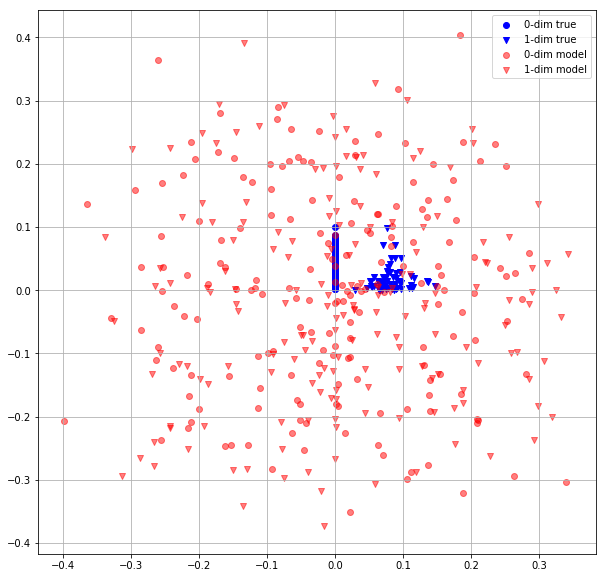

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   1 0.2575083673 0.2486442626


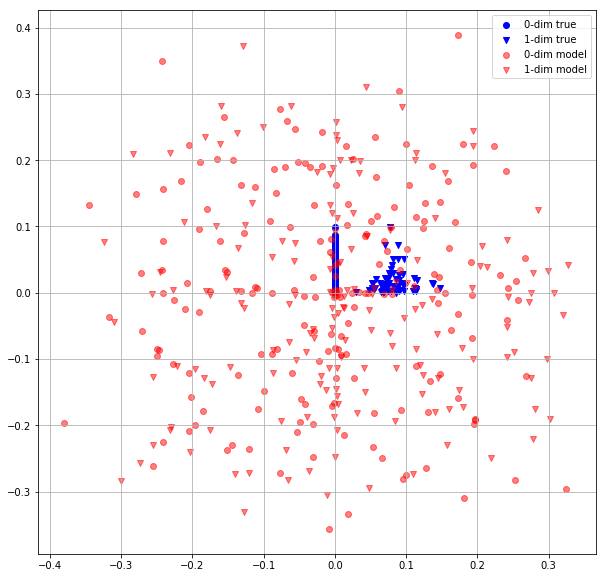

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   2 0.2436680943 0.2353041321


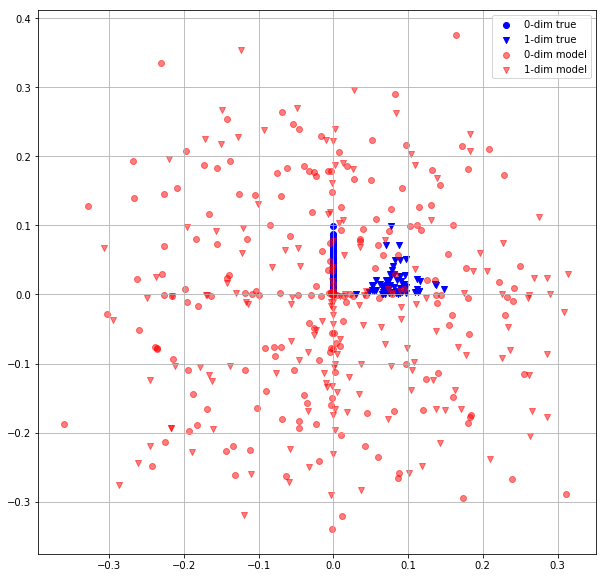

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   3 0.2303370088 0.2219805717


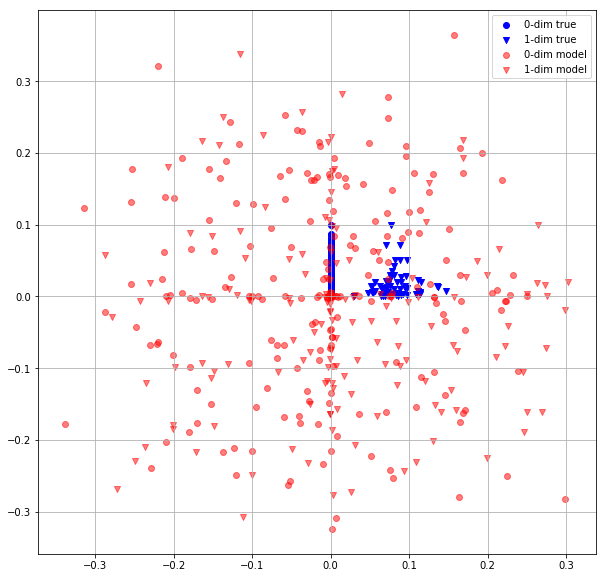

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   4 0.2167904824 0.2086777538


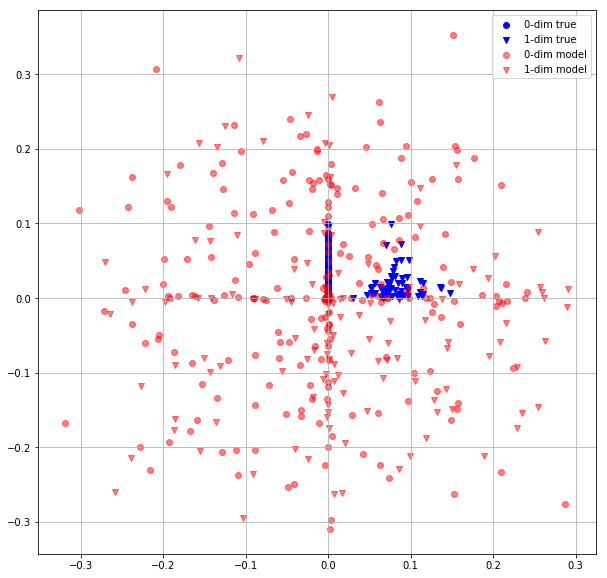

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   5 0.2036671638 0.1957662255


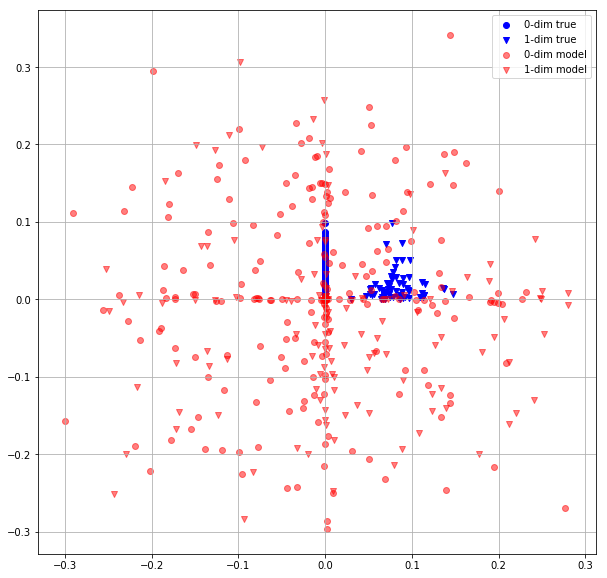

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   6 0.1906841248 0.1827199310


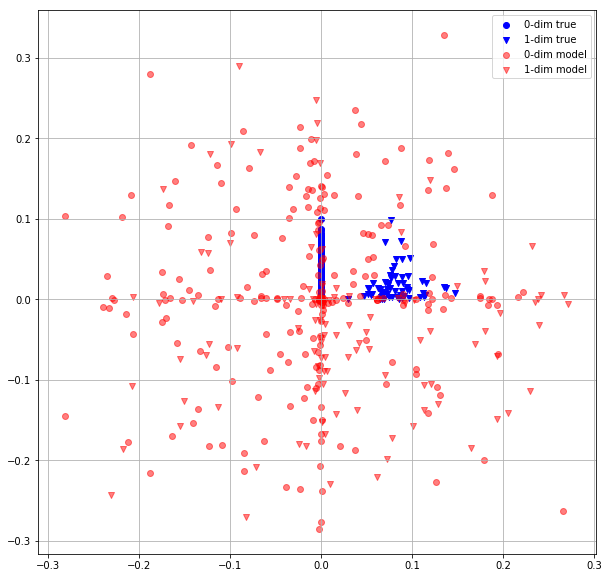

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   7 0.1770294309 0.1680216640


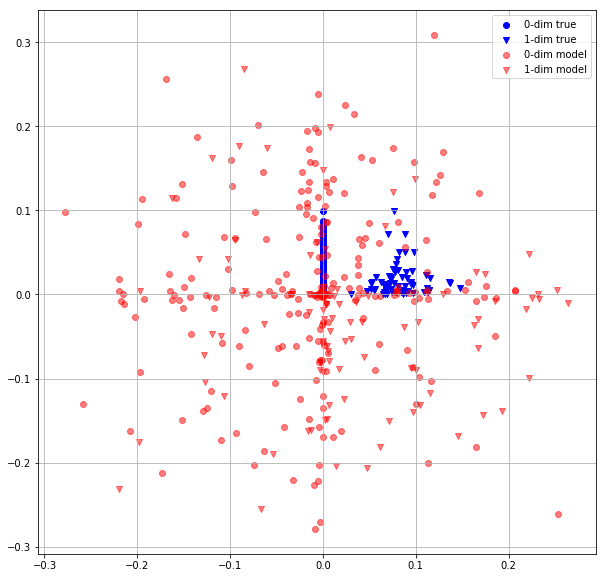

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   8 0.1626045406 0.1539666653


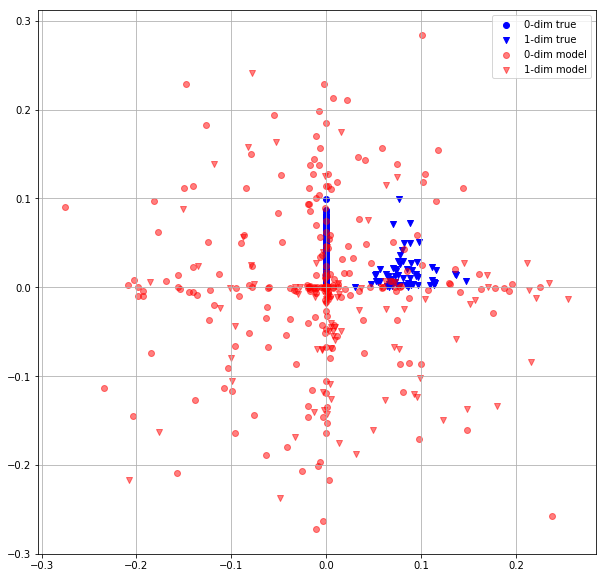

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   9 0.1479672790 0.1389142275


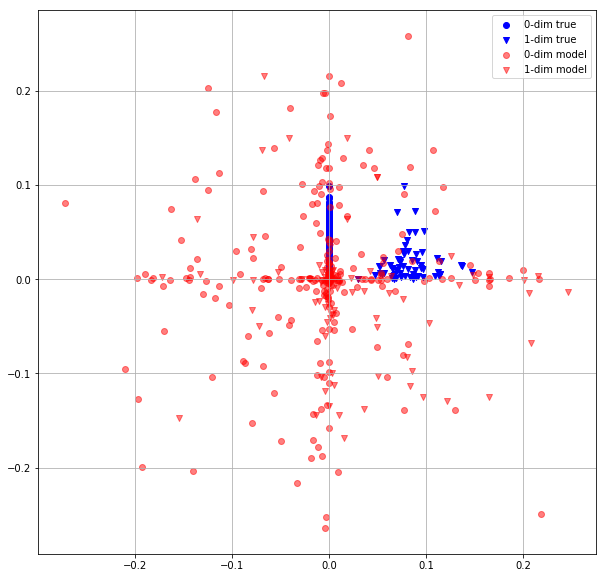

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  10 0.1323827803 0.1233730540


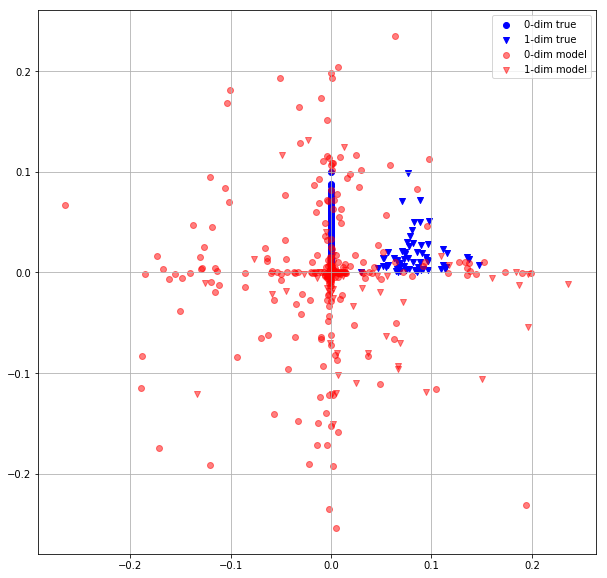

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  11 0.1173601821 0.1097716317


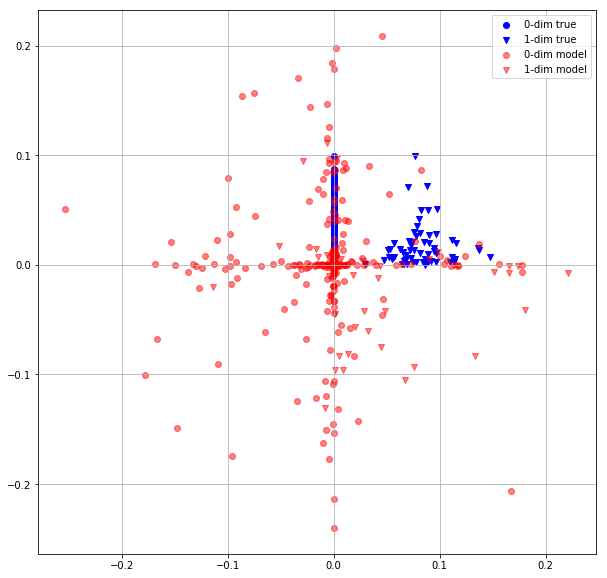

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  12 0.1038974449 0.0967745185


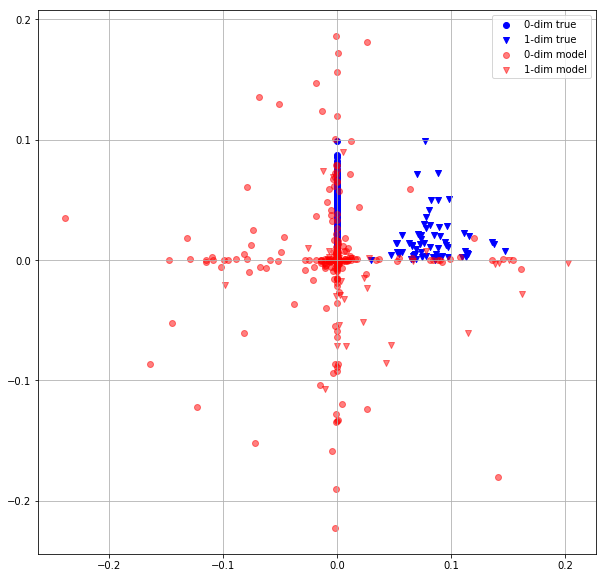

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  13 0.0922089219 0.0870852396


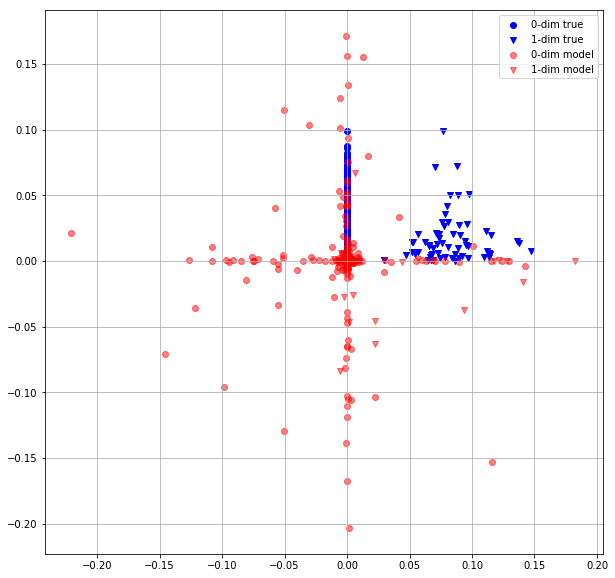

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  14 0.0832892880 0.0782407820


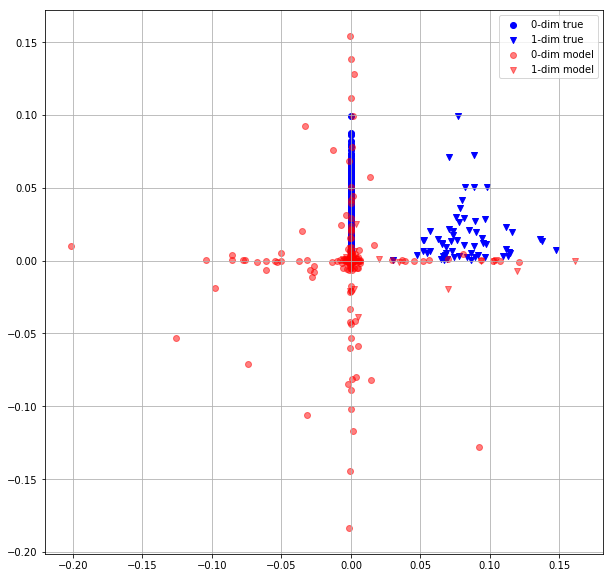

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  15 0.0753091648 0.0722677410


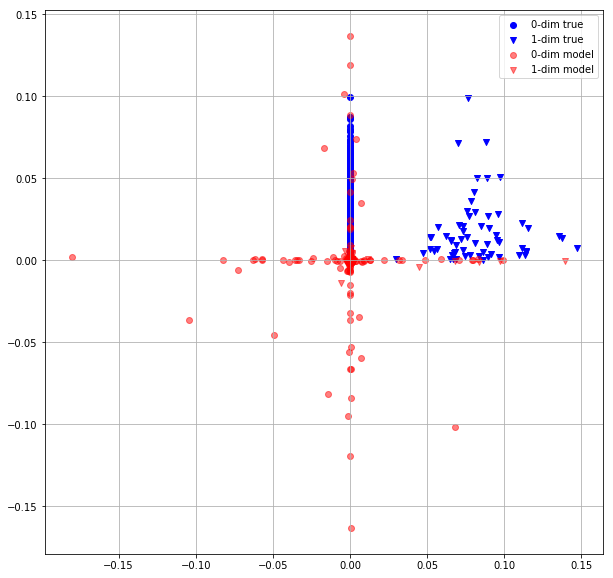

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  16 0.0696520805 0.0665838048


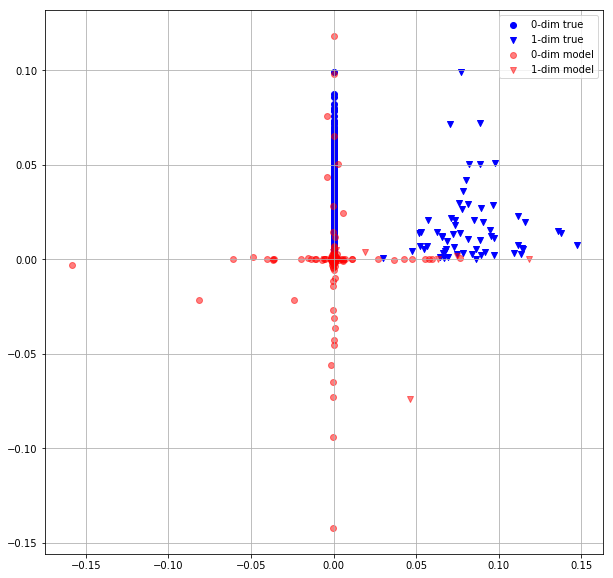

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  17 0.0648766533 0.0627844036


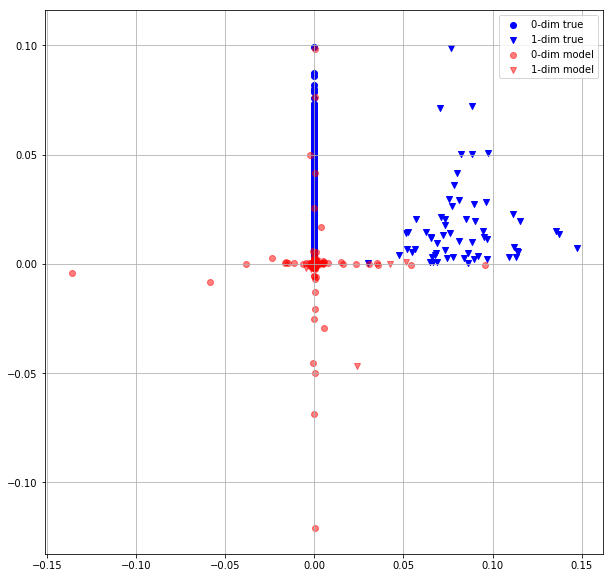

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  18 0.0616793782 0.0605363622


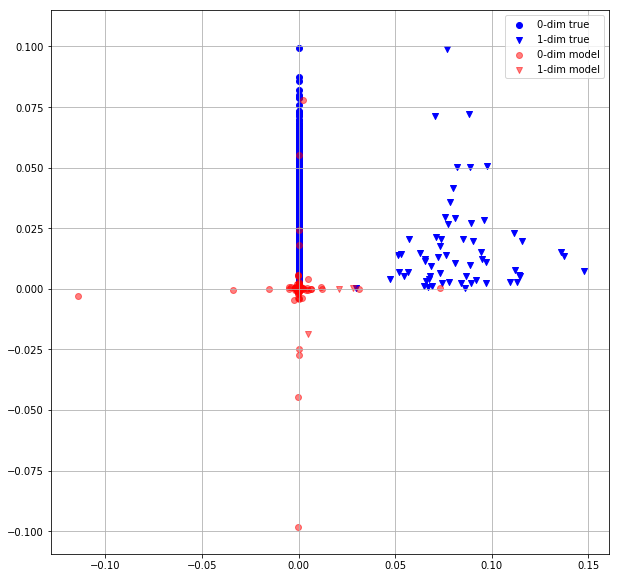

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  19 0.0593883246 0.0590210631


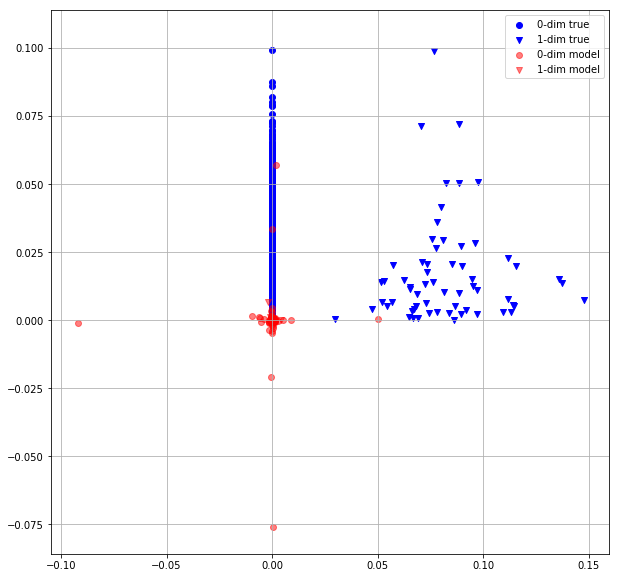

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  20 0.0581454858 0.0577091202


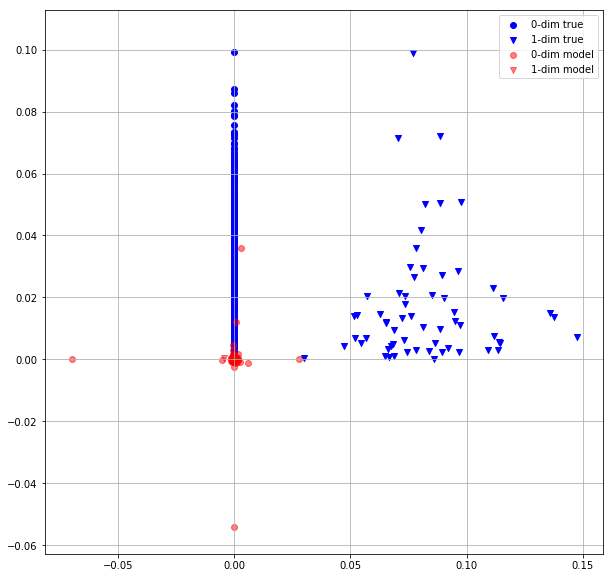

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  21 0.0568182655 0.0567563549


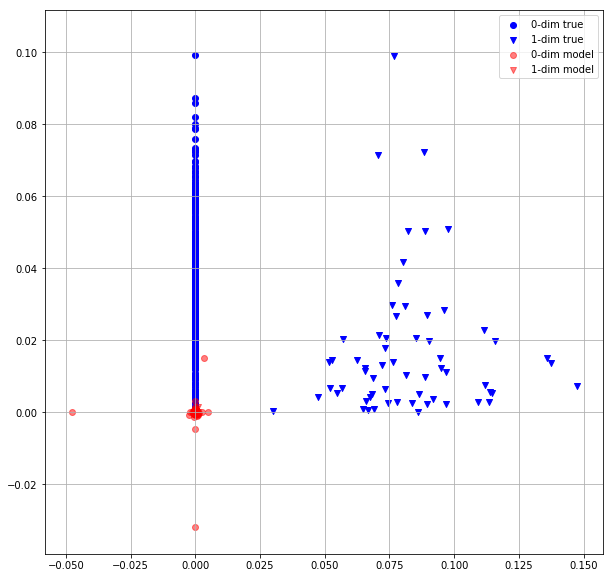

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  22 0.0560956001 0.0559380278


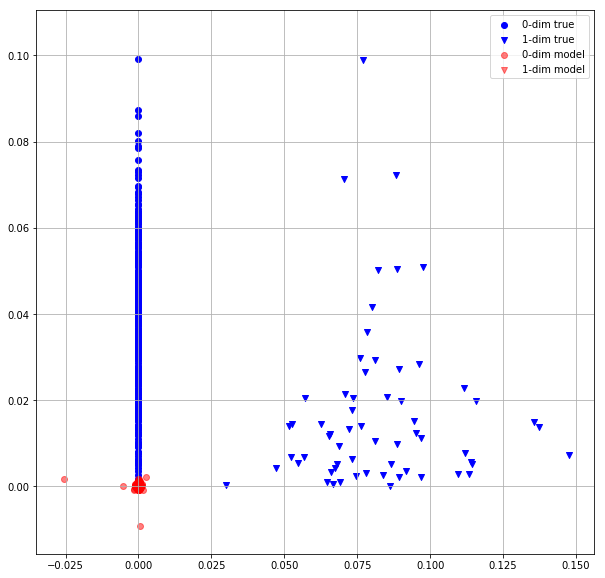

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  23 0.0554760173 0.0545347743


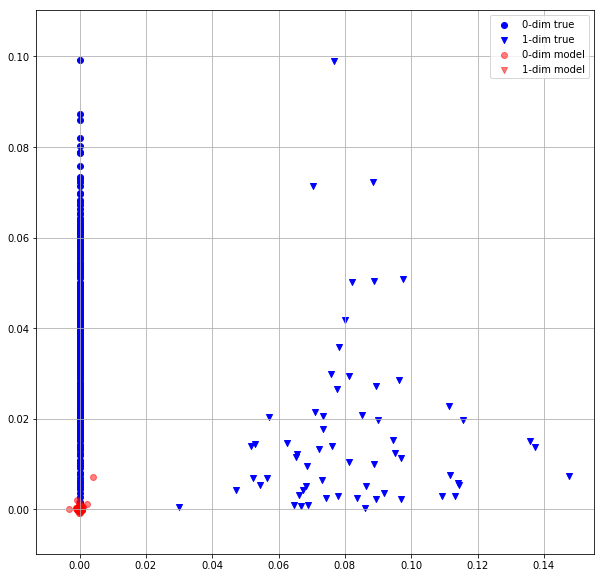

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  24 0.0547706038 0.0543387234


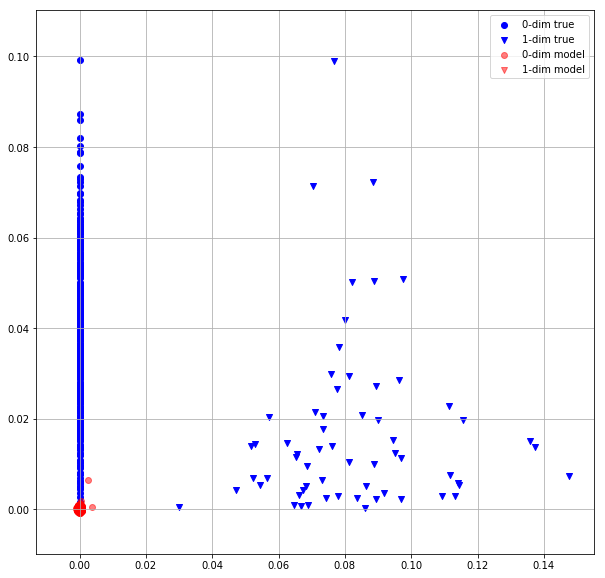

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  25 0.0542261973 0.0539478101


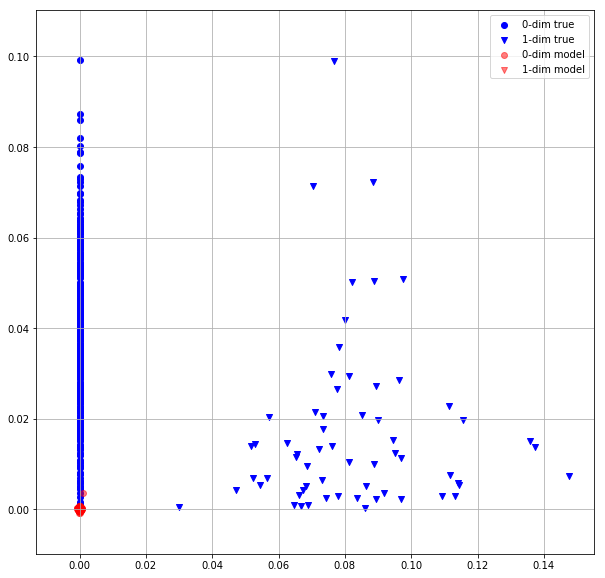

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  26 0.0536897369 0.0535321422


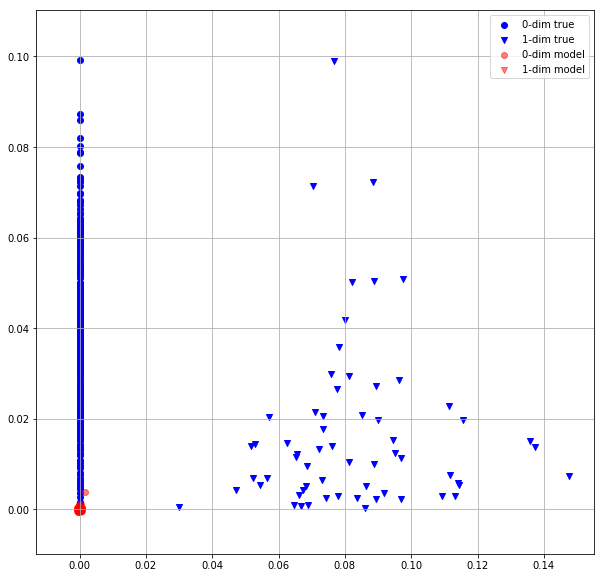

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  27 0.0532737523 0.0532052293


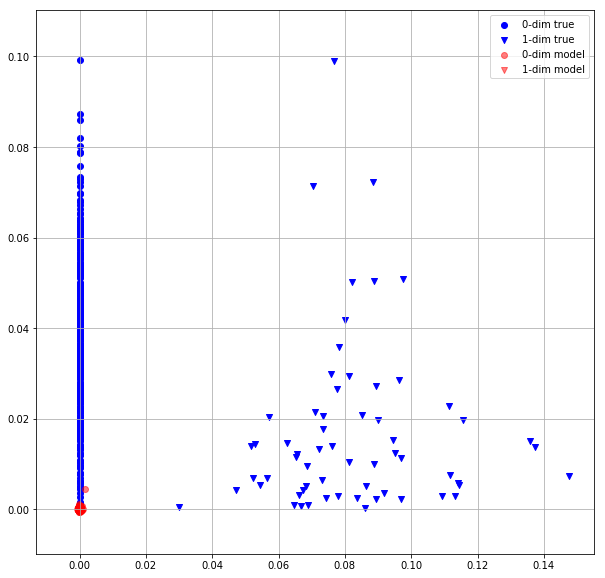

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  28 0.0527465641 0.0524666980


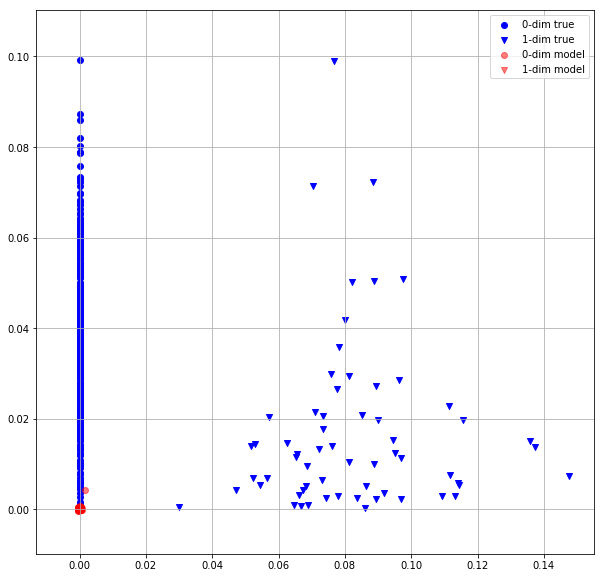

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  29 0.0523072146 0.0521185175


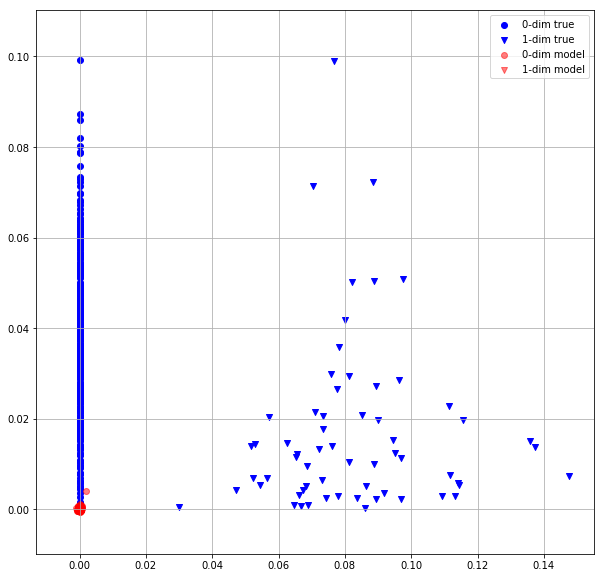

In [12]:
# MLP + weighted loss
for epoch_idx in range(n_epochs):
        
    # train
    model.train()
        
    loss = 0
    for batch in tqdm(dataloader_train):
        src = batch[0].to(device)
        mask = batch[1].to(device)
        tgt = model(src, mask)
        
        weights = batch[0].detach().clone()
        weights[:, :, :2] *= (weights[:, :, 1]**2).unsqueeze(2)
        
        full_mask = mask.unsqueeze(2).repeat(1, 1, 3)
        weights = weights * full_mask + (-1) * (1 - full_mask)
        kek = weights.detach().clone()
        
        loss_batch = criterion_hungarian(kek.to(torch.float).to(device), tgt)
        loss_batch.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss += loss_batch.detach().cpu()
        
    loss_train = loss / len(dataloader_train.dataset)
        
    # test
    model.eval()
    loss = 0
    for batch in tqdm(dataloader_test):
        src = batch[0].to(device)
        mask = batch[1].to(device)
        
        with torch.no_grad():
            tgt = model(src, mask)
            weights = batch[0]
            weights[:, :, :2] *= (weights[:, :, 1]**2).unsqueeze(2)

            full_mask = mask.unsqueeze(2).repeat(1, 1, 3)
            
            weights = weights * full_mask + (-1) * (1 - full_mask)

            loss_batch = criterion_hungarian(weights.to(torch.float).to(device), tgt)
            loss += loss_batch
            
            
    loss_test = loss / len(dataloader_test.dataset)
        
    print("Epoch: {:3} {:.10f} {:.10f}".format(epoch_idx, loss_train, loss_test))
    item = dataset_test[0].reshape(1, -1, 3)
    mask = np.ones((1, item.shape[1]))

    d_mask0 = (item[0, :, 2] == 0)
    d_mask1 = (item[0, :, 2] == 1)

    pred = model(torch.tensor(item, dtype=torch.float).to(device), torch.tensor(mask).long().to(device)).detach().cpu().numpy()
    
    #m = (pred[0, :, 2] > 0.5)
    #mask0 = (m == 0)
    #mask1 = (m == 1)
    m = np.argmax(pred[0, :, 2:], axis = 1)
    mask0 = (m == 0)
    mask1 = (m == 1)

    plt.figure(figsize=(10, 10))

    plt.scatter(item[0, d_mask0, 0], item[0, d_mask0, 1], label = '0-dim true', marker = "o", c = "b")
    plt.scatter(item[0, d_mask1, 0], item[0, d_mask1, 1], label = '1-dim true', marker = "v", c = "b")


    plt.scatter(pred[0, mask0, 0], pred[0, mask0, 1], label = '0-dim model', alpha = 0.5, marker = "o", c = "r")
    plt.scatter(pred[0, mask1, 0], pred[0, mask1, 1], label = '1-dim model', alpha = 0.5, marker = "v", c = "r")
    plt.grid()
    plt.legend()
    plt.show()

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   0 0.2779409587 0.1948791444


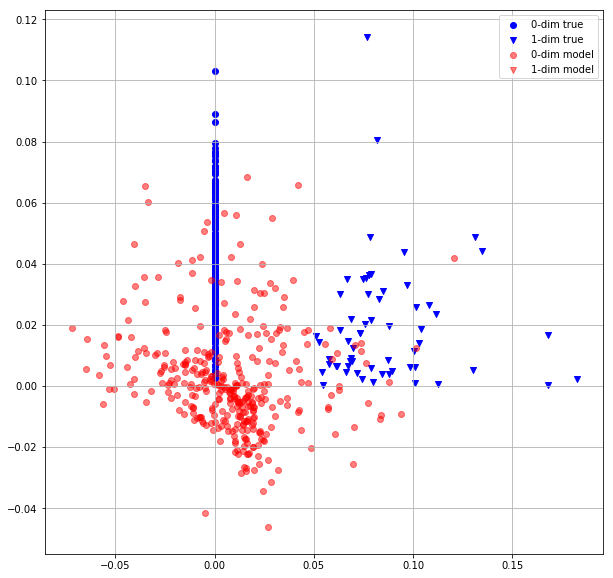

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   1 0.2127477974 0.1857004315


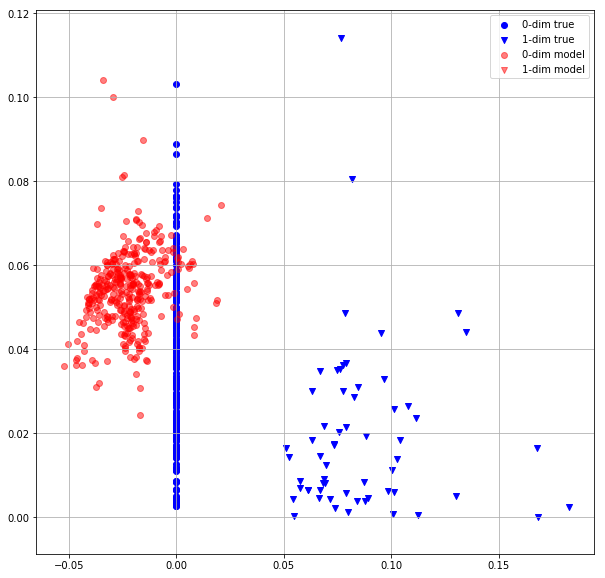

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   2 0.1963727921 0.1709611565


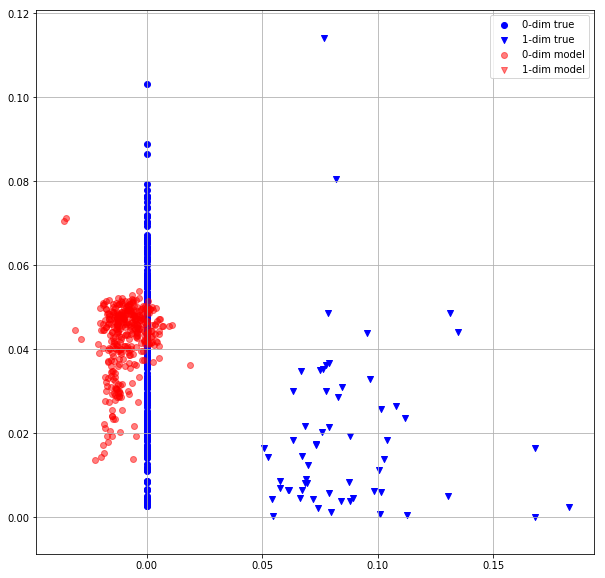

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   3 0.1842514575 0.1533809304


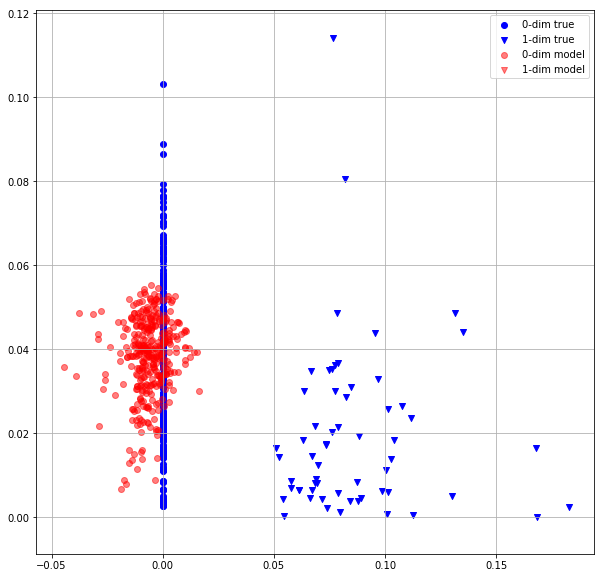

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   4 0.1637755036 0.1250211000


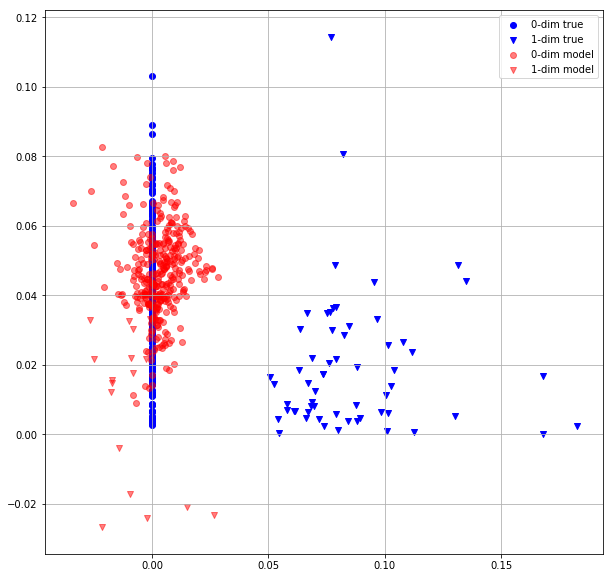

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   5 0.1168298349 0.0628834814


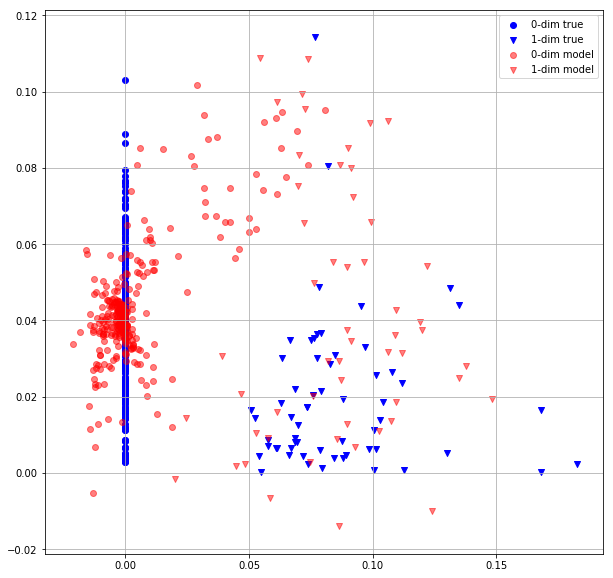

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   6 0.0725633502 0.0429418460


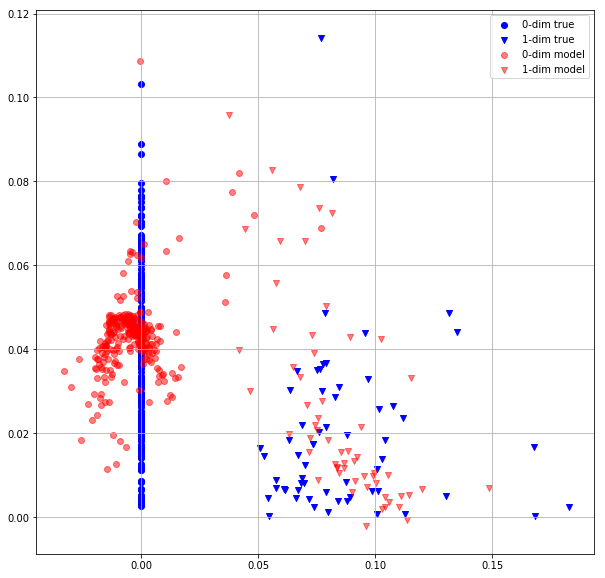

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   7 0.0557178557 0.0376339741


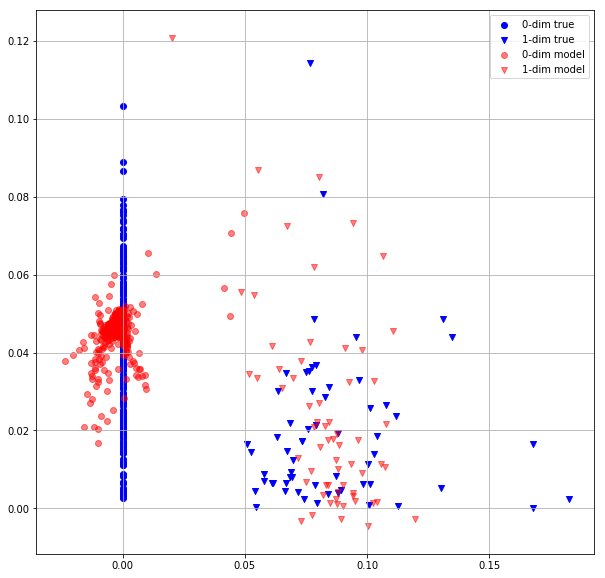

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   8 0.0474234708 0.0351476781


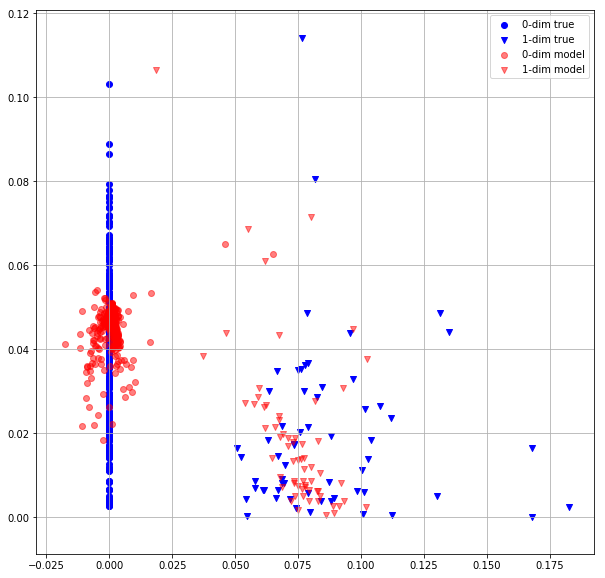

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   9 0.0424578190 0.0340258181


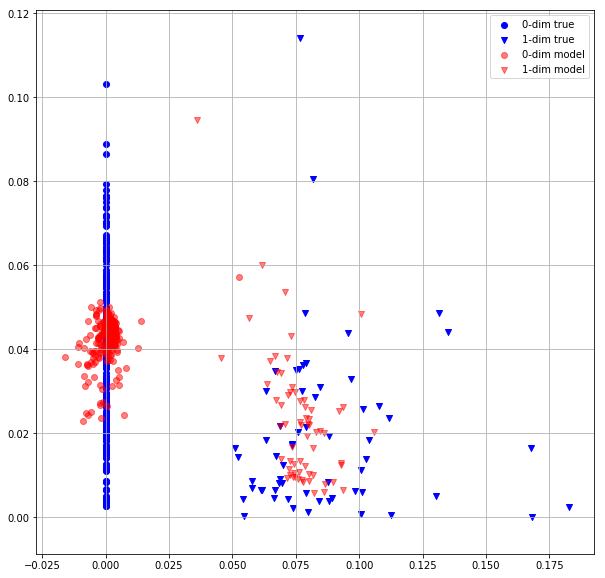

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  10 0.0388981216 0.0335604437


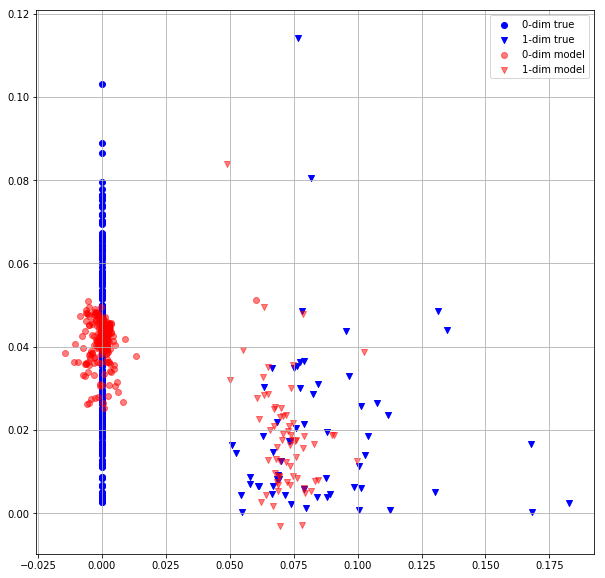

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  11 0.0363852307 0.0329381078


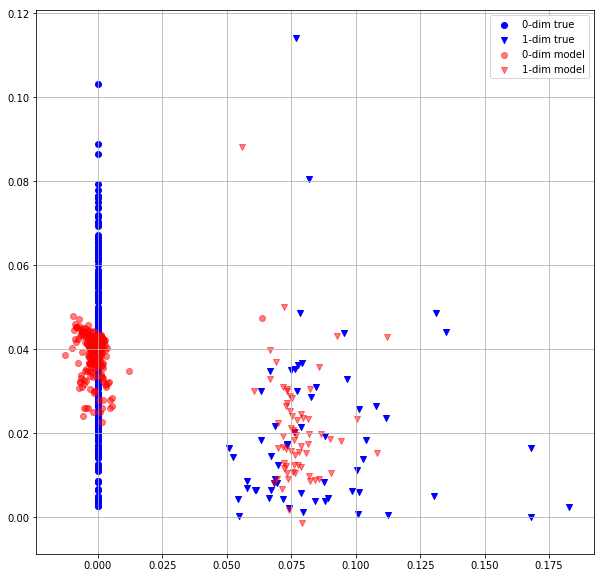

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  12 0.0344286226 0.0333489180


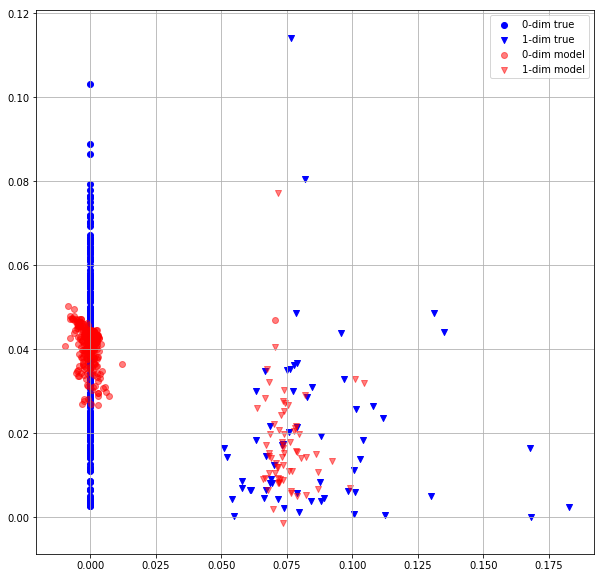

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  13 0.0327064022 0.0332950763


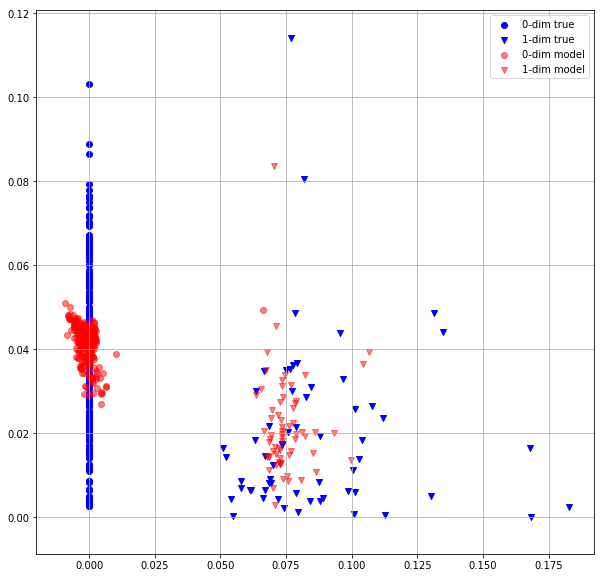

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  14 0.0314475112 0.0326912701


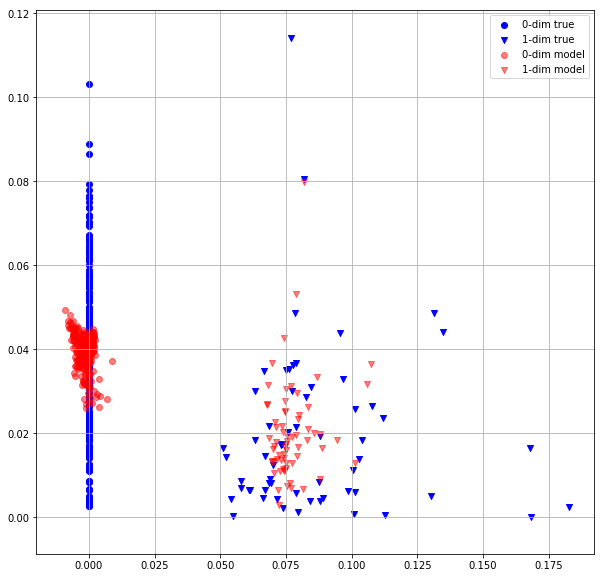

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  15 0.0302503463 0.0332250707


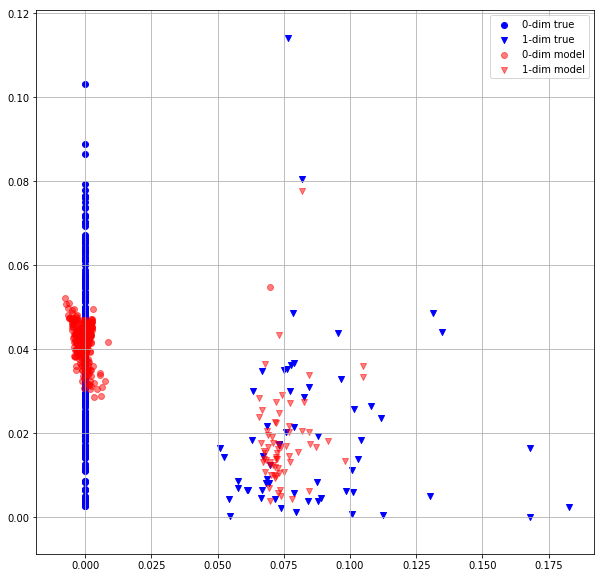

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  16 0.0294499248 0.0326745287


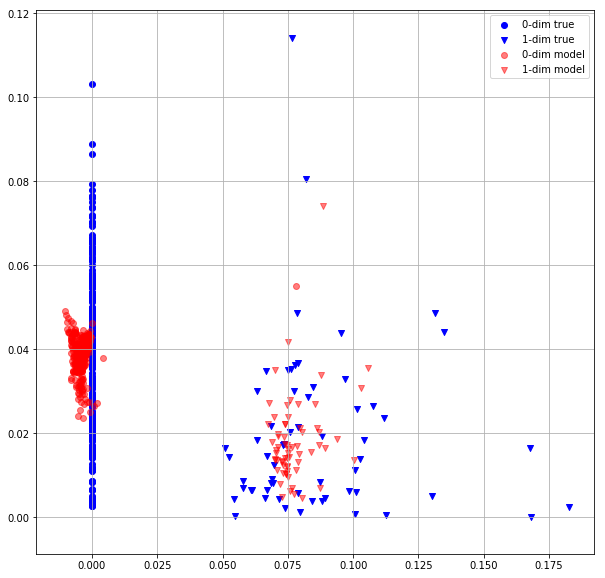

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  17 0.0285810884 0.0326694734


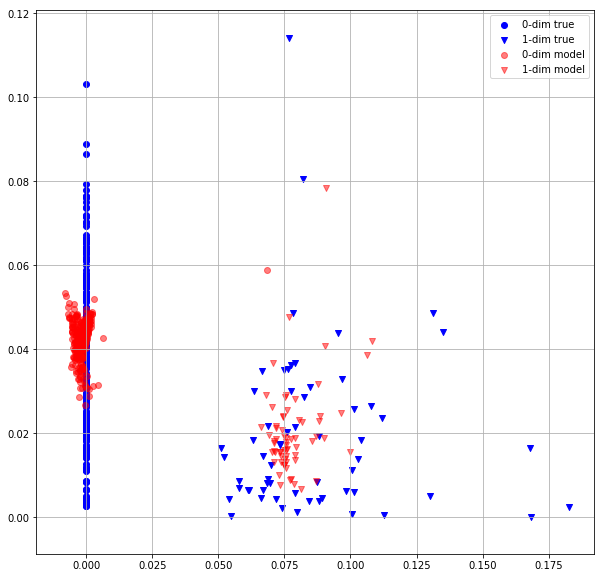

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  18 0.0278495979 0.0321389064


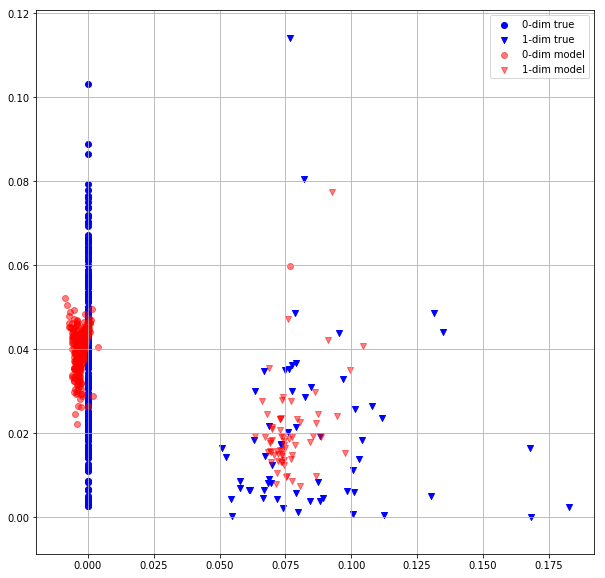

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  19 0.0269696228 0.0313770287


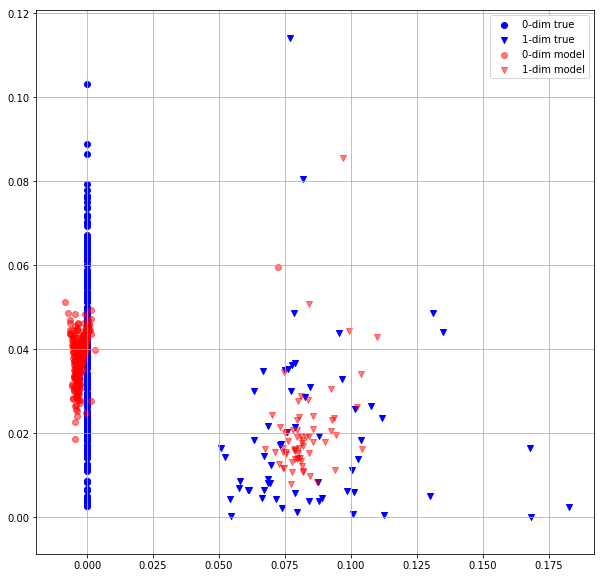

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  20 0.0261767693 0.0307937767


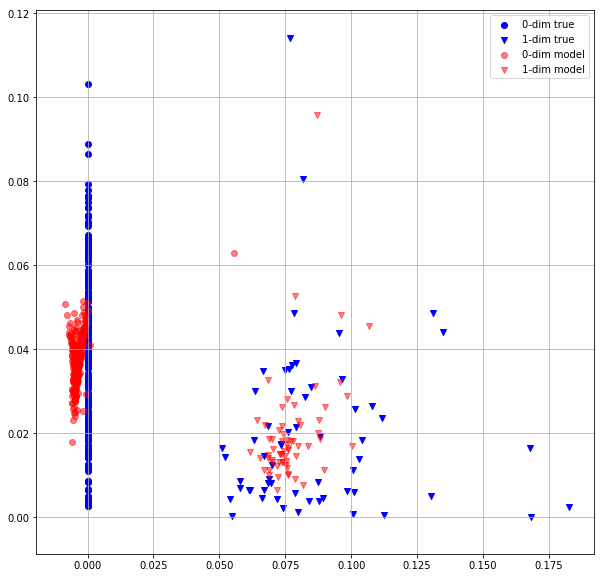

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  21 0.0252825934 0.0295825526


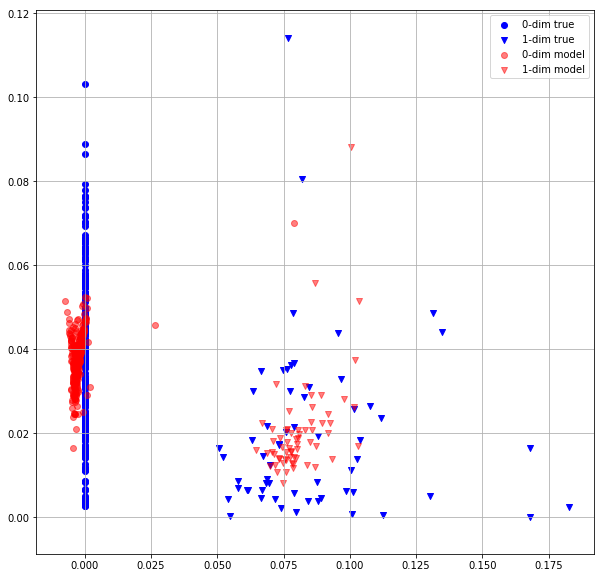

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  22 0.0249085315 0.0284964871


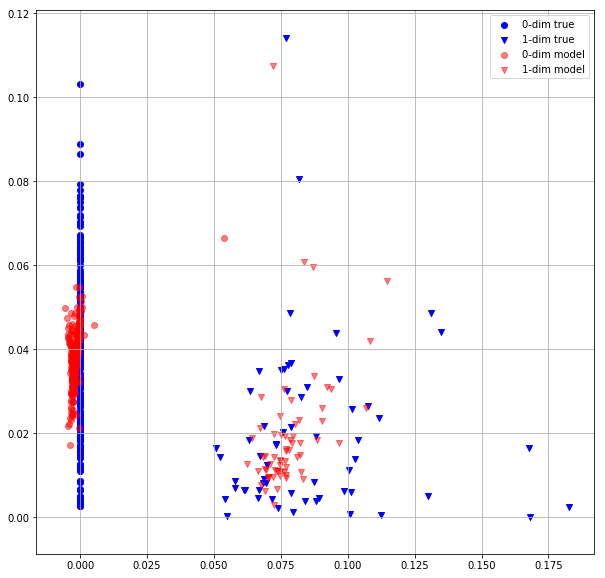

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  23 0.0240311101 0.0287695769


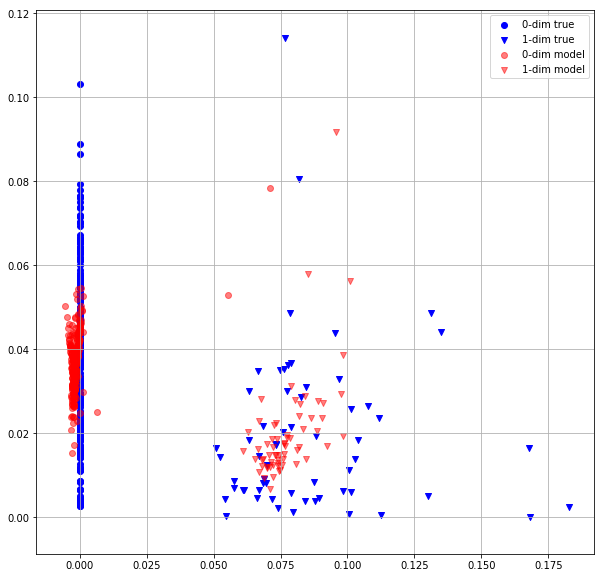

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  24 0.0235830713 0.0273041781


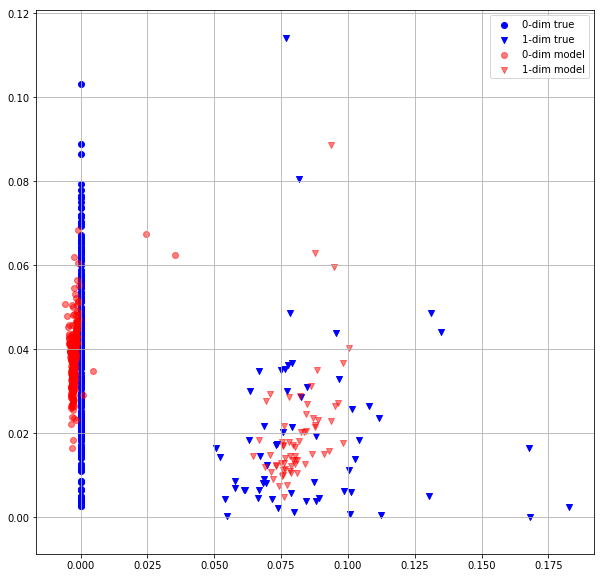

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  25 0.0220379494 0.0248253252


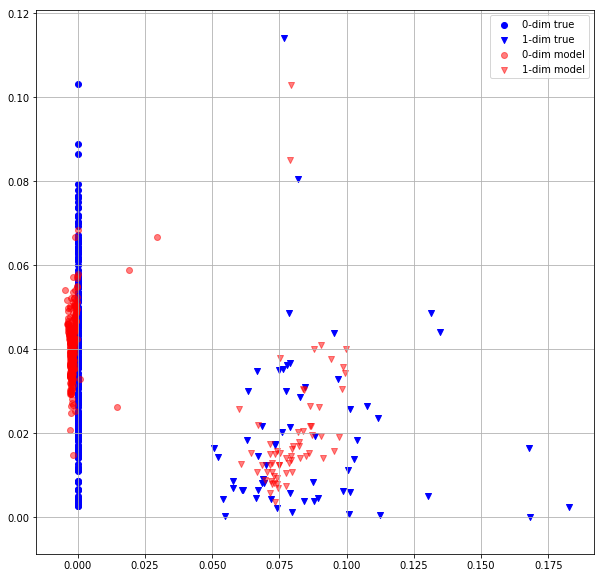

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  26 0.0225381665 0.0286692493


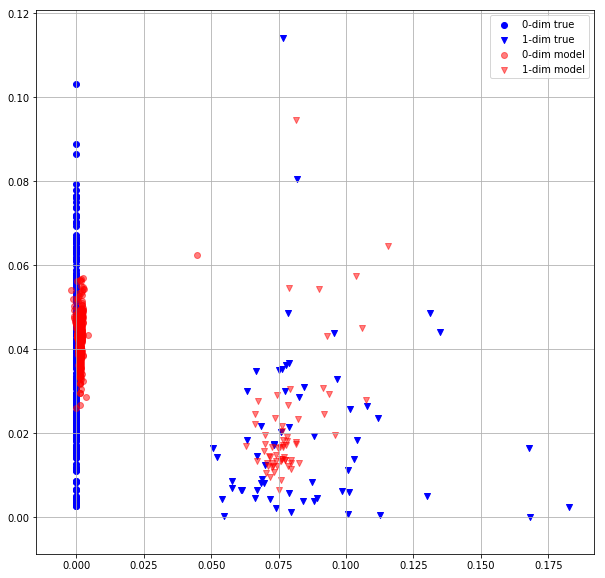

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  27 0.0202020779 0.0264379978


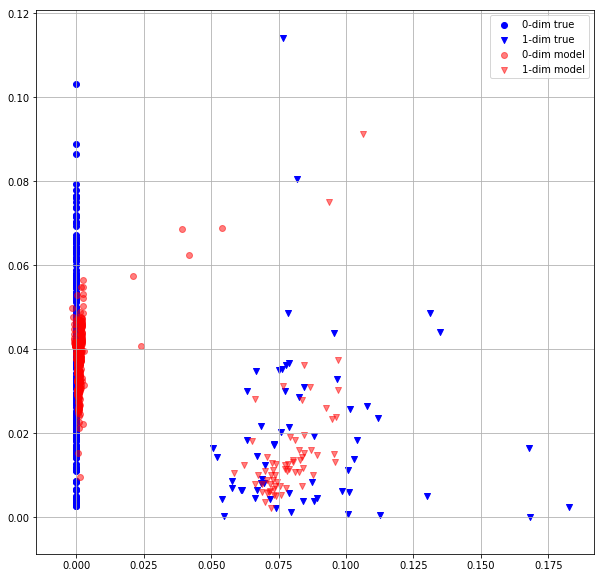

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  28 0.0177104305 0.0225596577


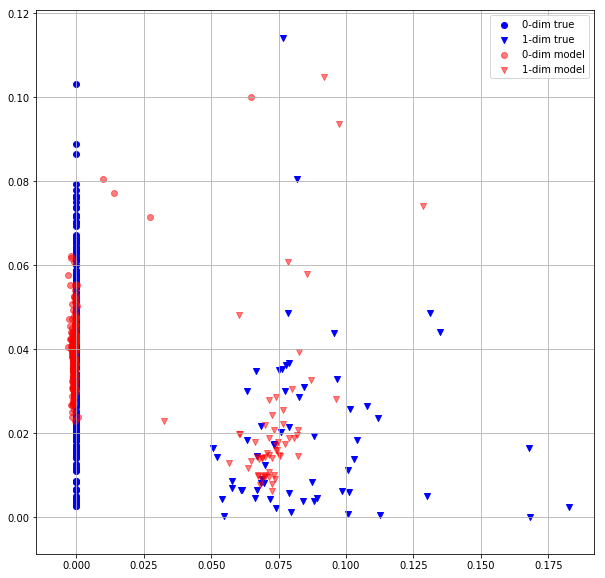

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  29 0.0161506888 0.0184772853


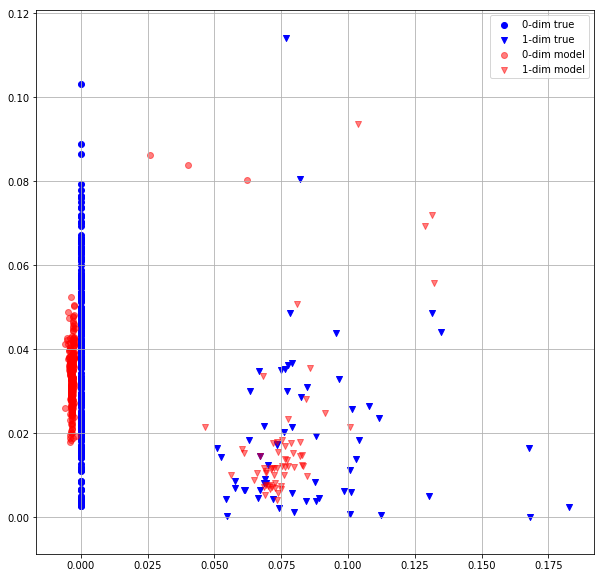

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  30 0.0191776305 0.0249977820


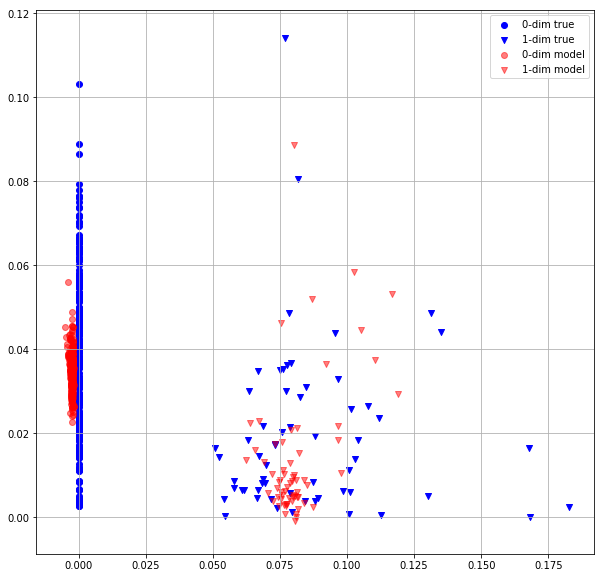

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  31 0.0180749744 0.0203311685


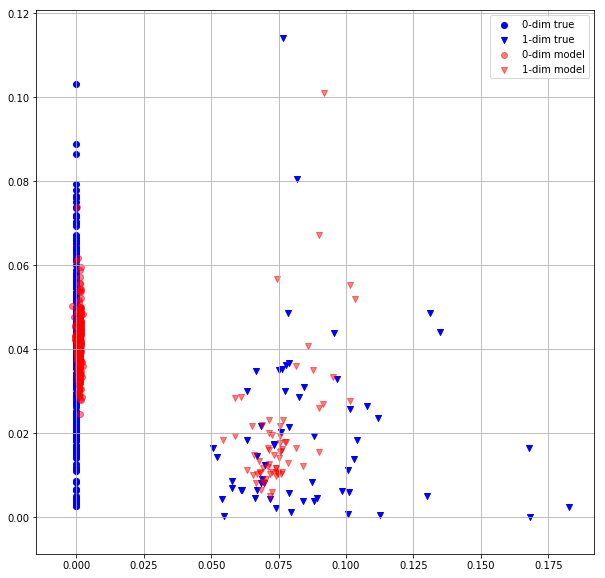

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  32 0.0148916868 0.0239984654


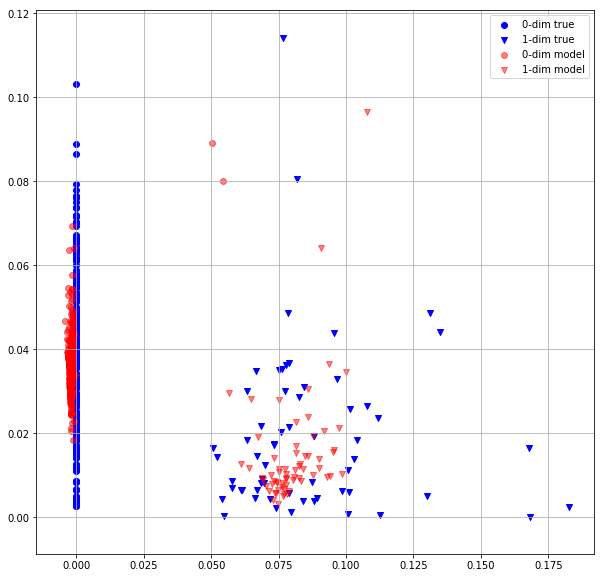

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  33 0.0157842785 0.0203262512


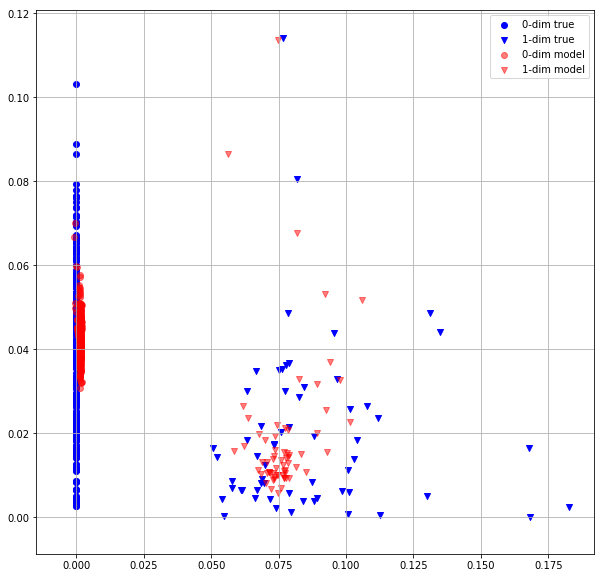

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  34 0.0130932303 0.0152689675


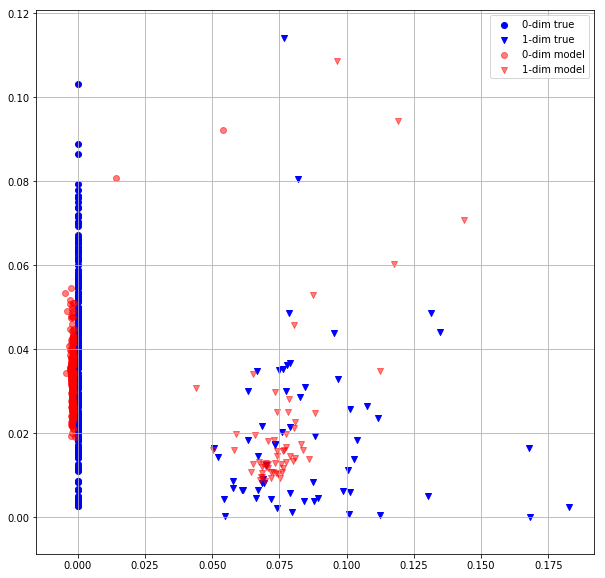

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  35 0.0151188914 0.0199982934


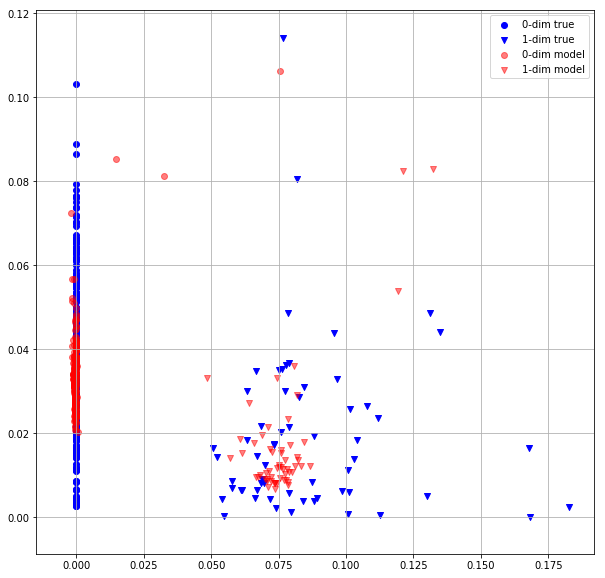

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  36 0.0136466101 0.0176519938


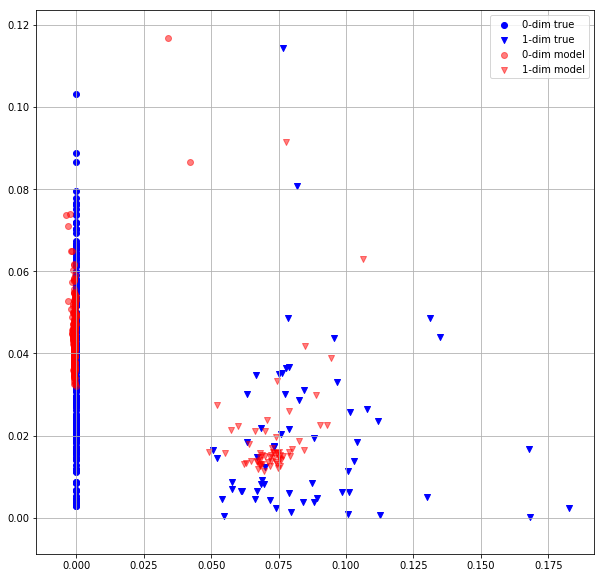

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  37 0.0109742964 0.0140504707


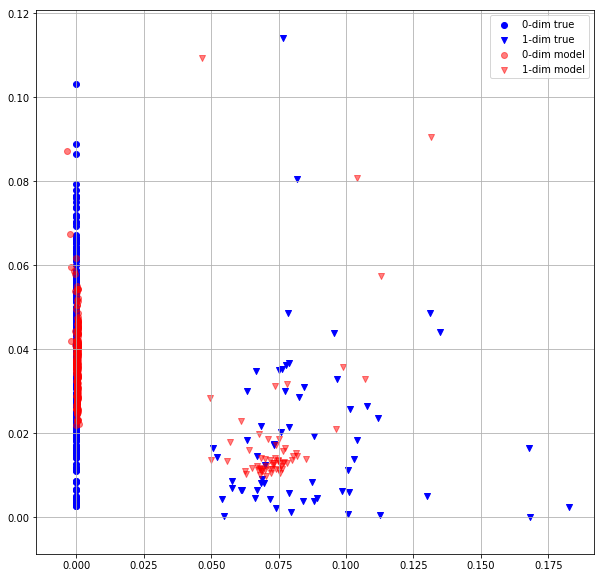

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  38 0.0103827938 0.0141367875


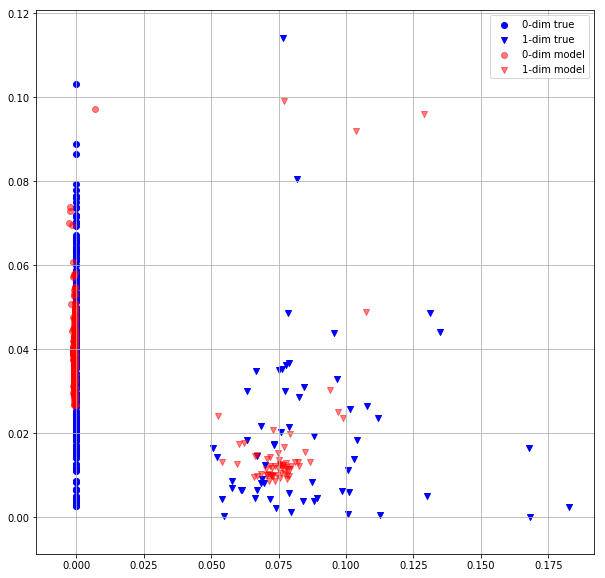

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  39 0.0094487993 0.0137767363


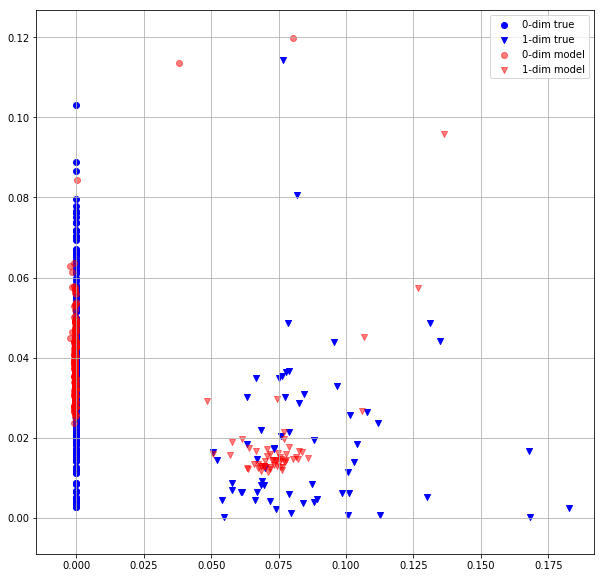

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  40 0.0119394399 0.0166662168


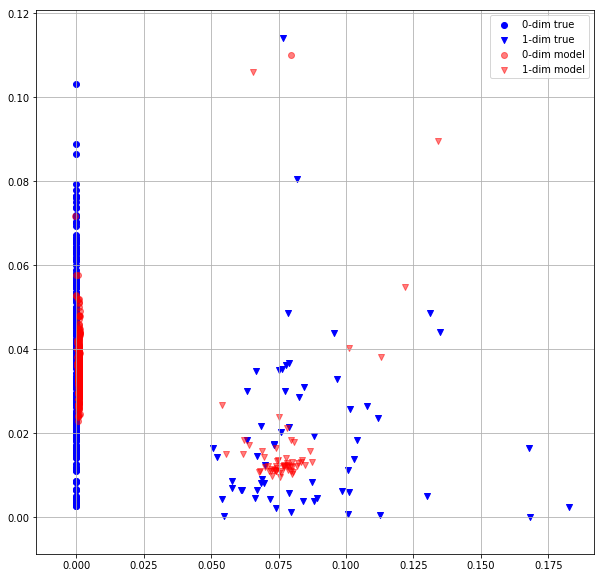

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  41 0.0103750899 0.0185005125


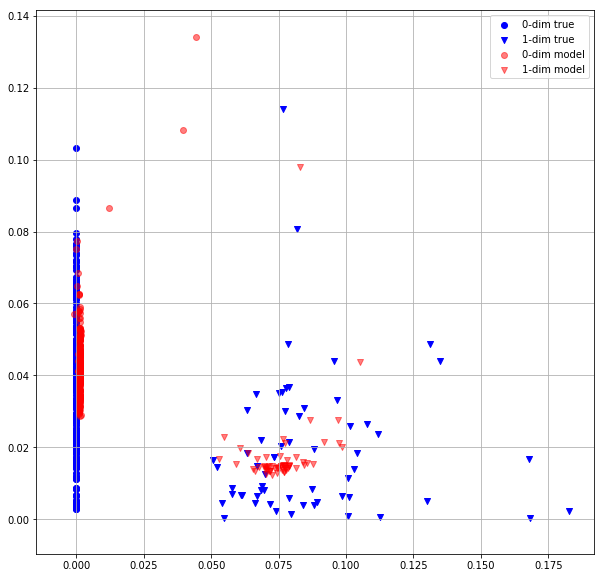

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  42 0.0130799999 0.0165260546


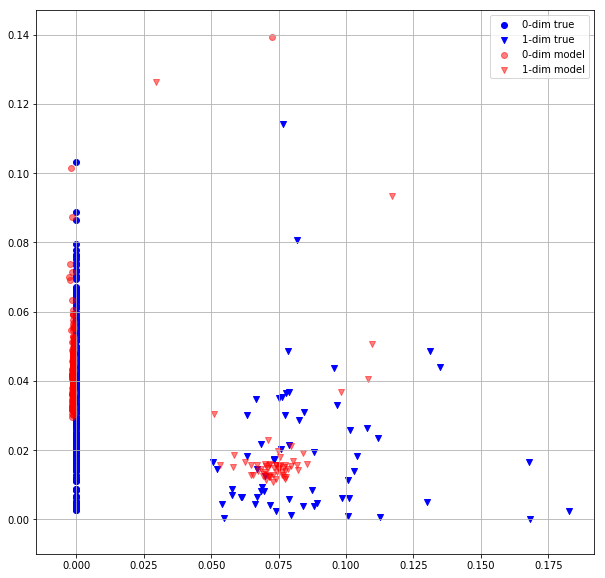

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  43 0.0111832870 0.0173099451


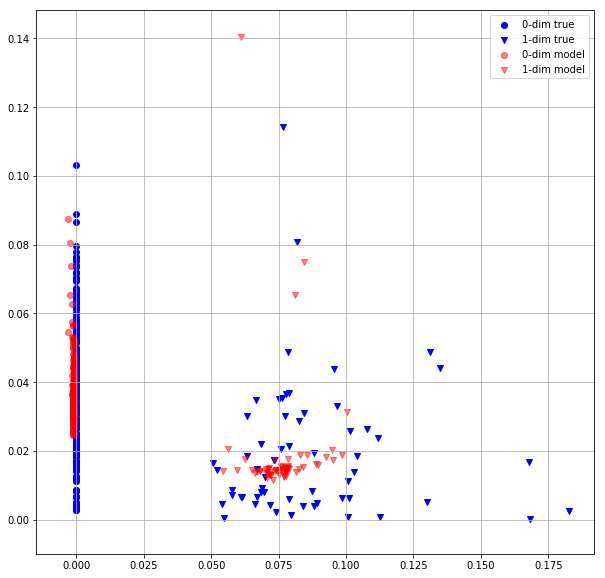

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  44 0.0107558360 0.0240064263


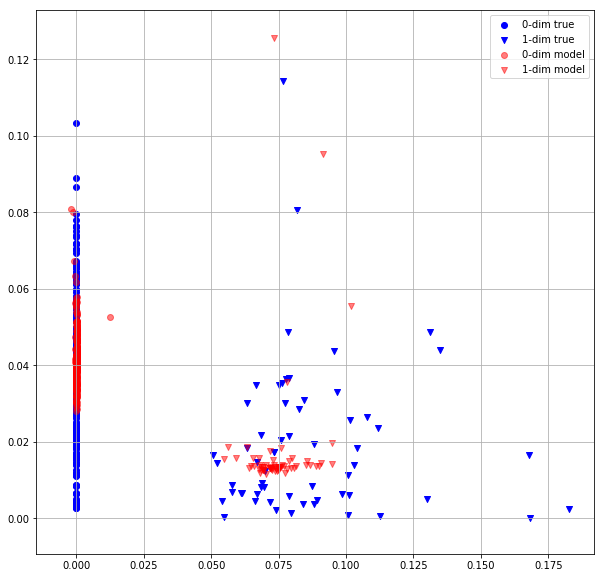

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  45 0.0136074312 0.0201804694


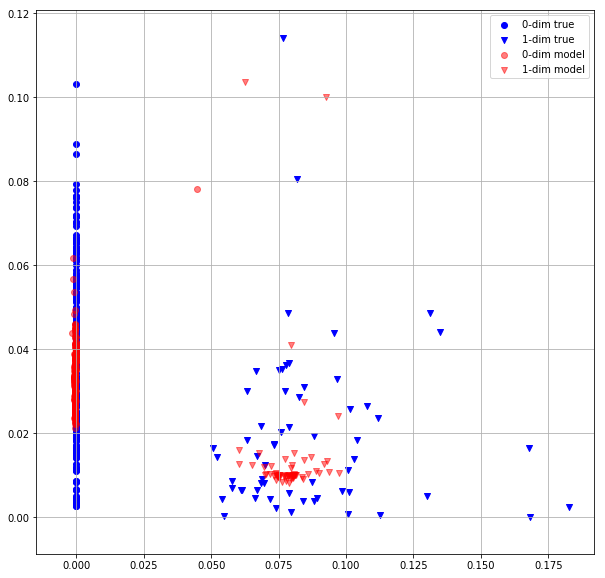

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  46 0.0114216246 0.0166341513


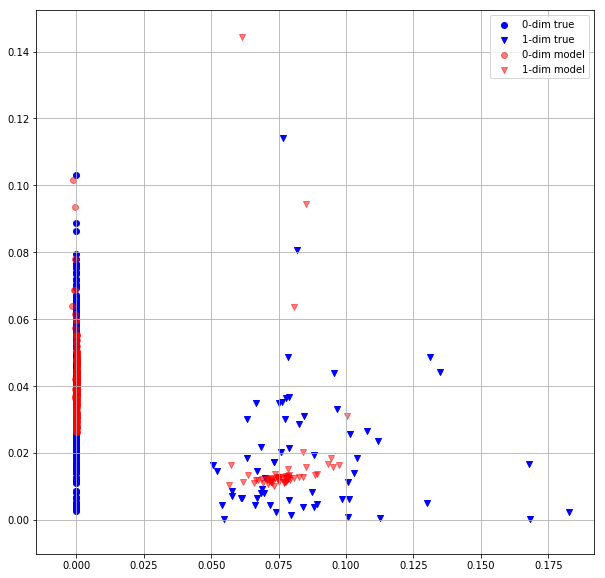

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  47 0.0101383924 0.0186488945


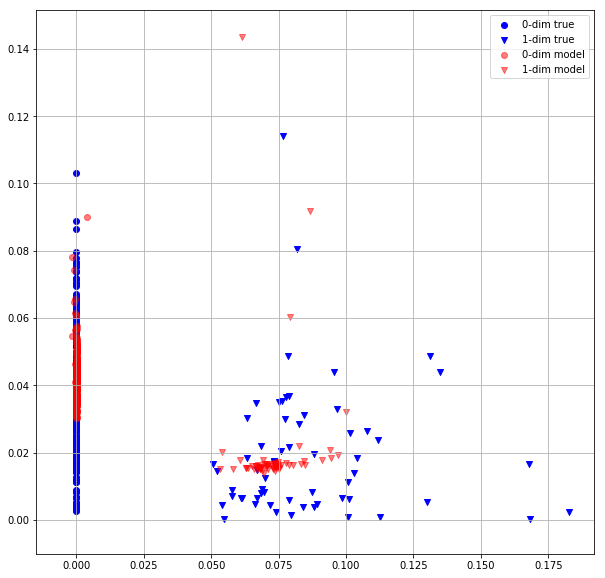

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  48 0.0099914707 0.0180729441


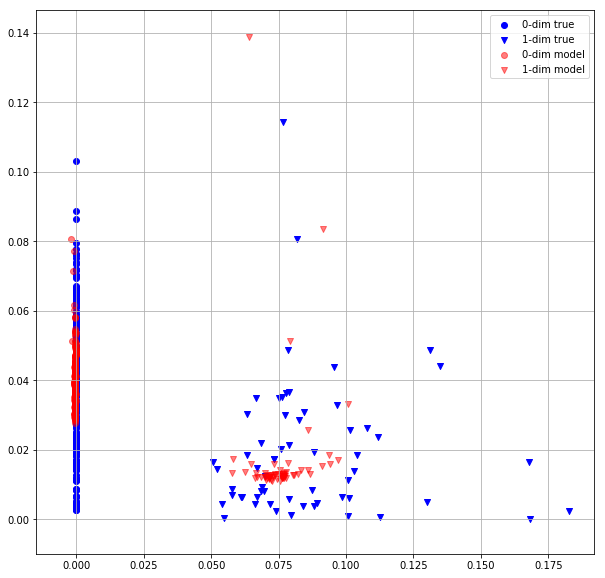

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  49 0.0092089018 0.0153980423


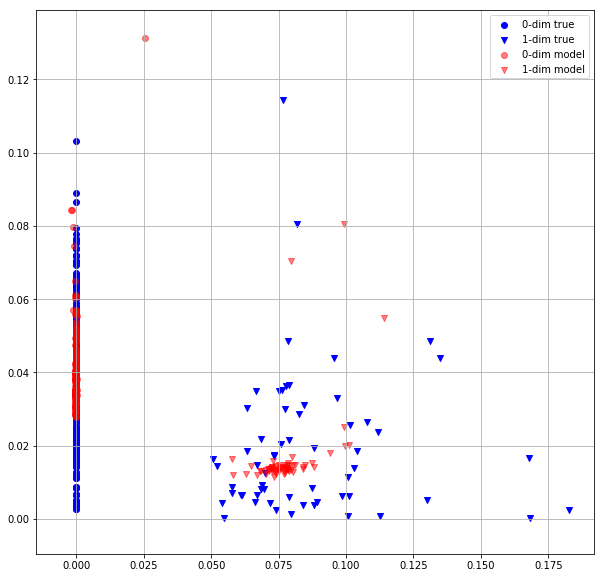

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  50 0.0084739849 0.0162056368


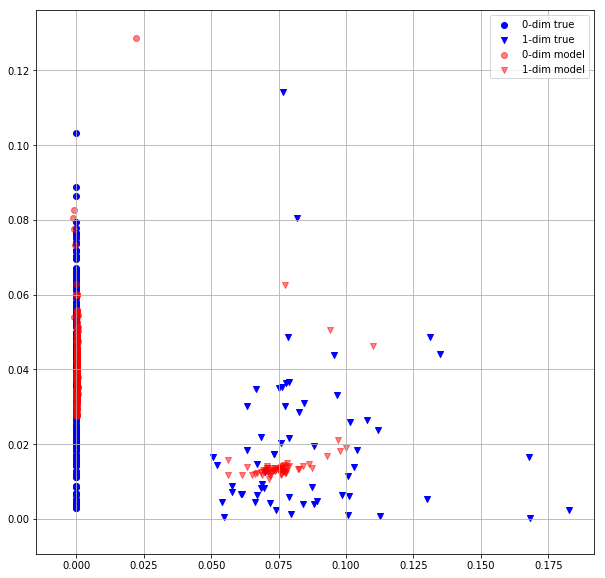

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  51 0.0093351733 0.0140528511


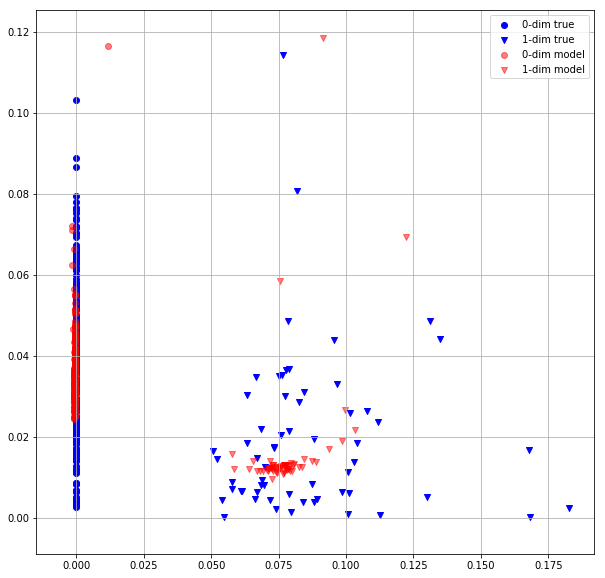

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  52 0.0092848875 0.0209547095


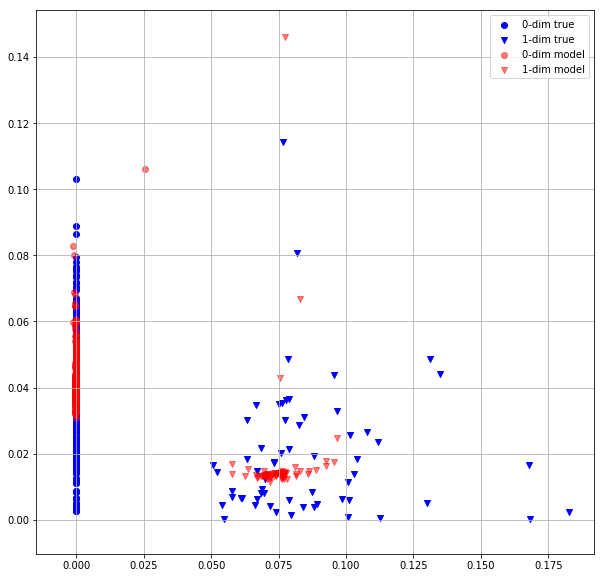

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  53 0.0133429719 0.0192511007


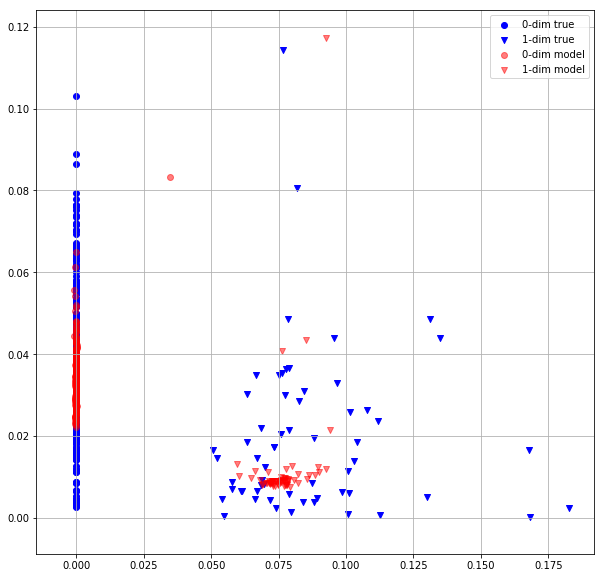

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  54 0.0109250806 0.0145075675


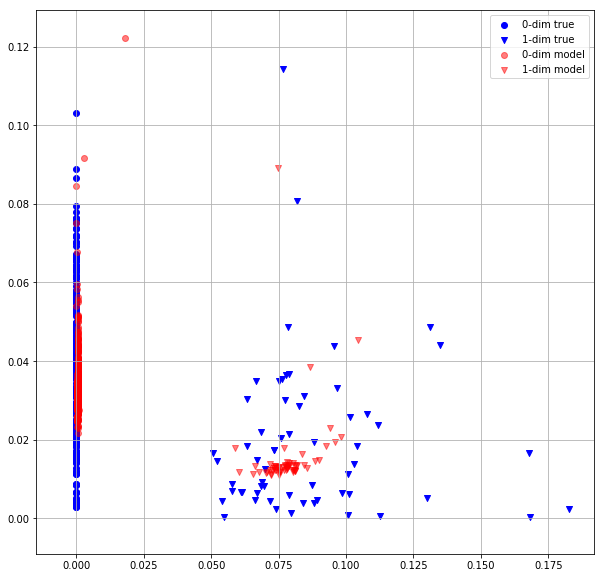

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  55 0.0083306888 0.0139063289


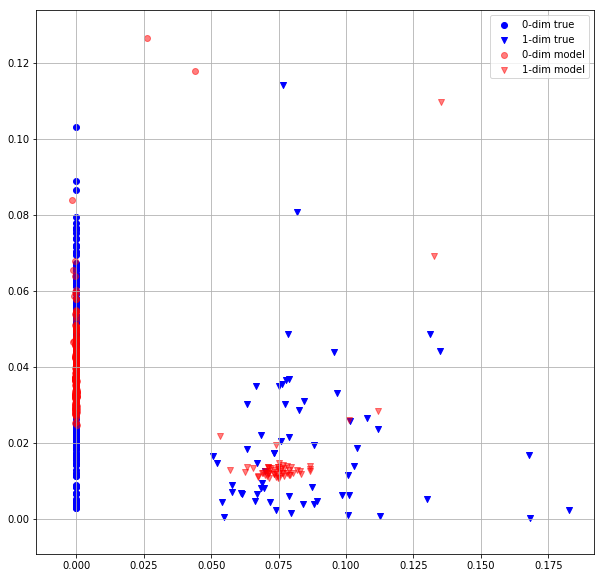

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  56 0.0094098048 0.0181996170


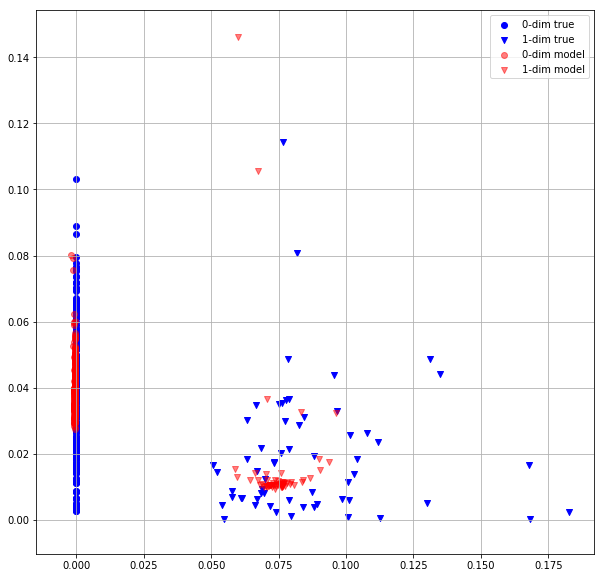

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  57 0.0098256050 0.0145560596


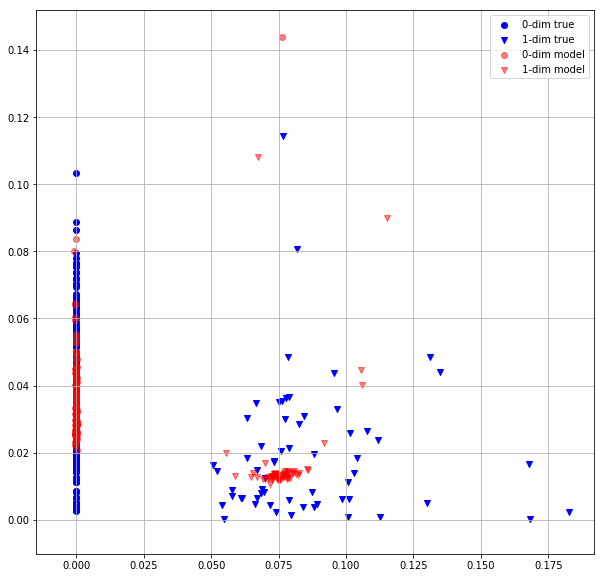

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  58 0.0081774415 0.0137504926


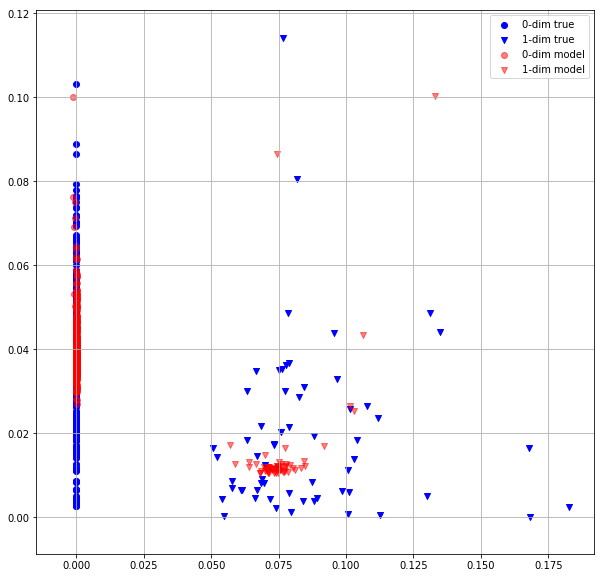

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  59 0.0074808029 0.0127916085


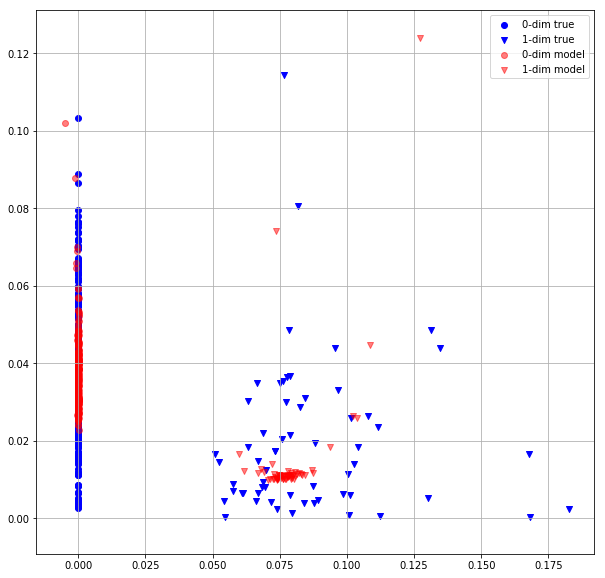

In [10]:
# DeepSets + TSPN + 60 epochs + MLP_last
for epoch_idx in range(n_epochs):
        
    # train
    model.train()
        
    loss = 0
    for batch in tqdm(dataloader_train):
        src = batch[0].to(device)
        mask = batch[1].to(device)
        tgt = model(src, mask)
        loss_batch = criterion_hungarian(src.to(torch.float), tgt)
        loss_batch.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss += loss_batch.detach().cpu()
        
    loss_train = loss / len(dataloader_train.dataset)
        
    # test
    model.eval()
    loss = 0
    for batch in tqdm(dataloader_test):
        src = batch[0].to(device)
        mask = batch[1].to(device)
        
        with torch.no_grad():
            tgt = model(src, mask)
            loss_batch = criterion_hungarian(src.to(torch.float), tgt)
            loss += loss_batch
            
            
    loss_test = loss / len(dataloader_test.dataset)
        
    print("Epoch: {:3} {:.10f} {:.10f}".format(epoch_idx, loss_train, loss_test))
    item = dataset_test[0].reshape(1, -1, 3)
    mask = np.ones((1, item.shape[1]))

    d_mask0 = (item[0, :, 2] == 0)
    d_mask1 = (item[0, :, 2] == 1)

    pred = model(torch.tensor(item, dtype=torch.float).to(device), torch.tensor(mask).long().to(device)).detach().cpu().numpy()
    
    m = (pred[0, :, 2] > 0.5)
    mask0 = (m == 0)
    mask1 = (m == 1)
    #m = np.argmax(pred[0, :, 2:], axis = 1)
    #mask0 = (m == 0)
    #mask1 = (m == 1)

    plt.figure(figsize=(10, 10))

    plt.scatter(item[0, d_mask0, 0], item[0, d_mask0, 1], label = '0-dim true', marker = "o", c = "b")
    plt.scatter(item[0, d_mask1, 0], item[0, d_mask1, 1], label = '1-dim true', marker = "v", c = "b")


    plt.scatter(pred[0, mask0, 0], pred[0, mask0, 1], label = '0-dim model', alpha = 0.5, marker = "o", c = "r")
    plt.scatter(pred[0, mask1, 0], pred[0, mask1, 1], label = '1-dim model', alpha = 0.5, marker = "v", c = "r")
    plt.grid()
    plt.legend()
    plt.show()

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   0 0.0272303037 0.0265117399


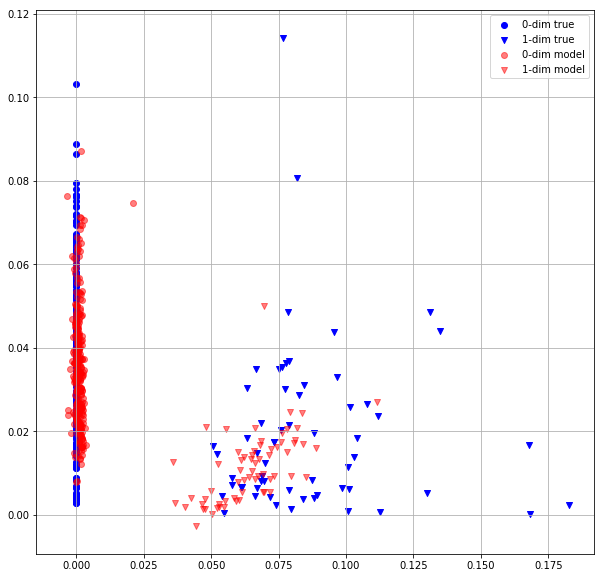

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   1 0.0265147444 0.0262956098


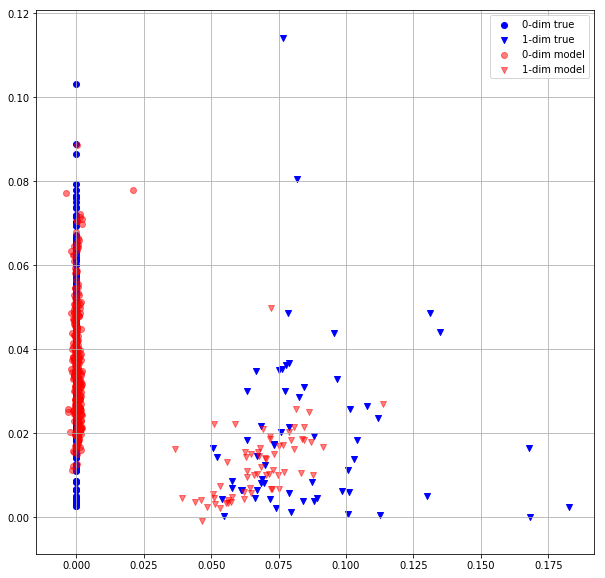

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   2 0.0259270668 0.0262892079


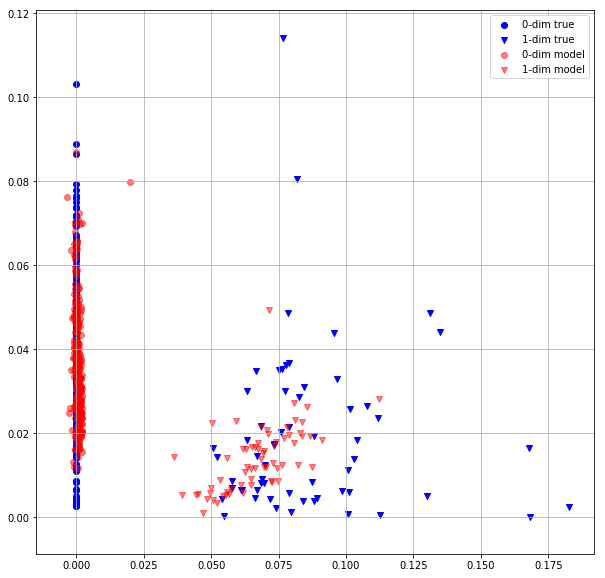

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   3 0.0253900122 0.0267597716


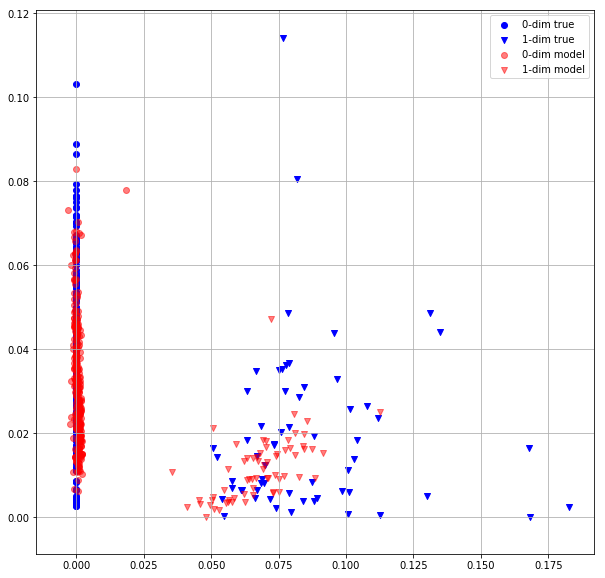

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   4 0.0251651891 0.0270135514


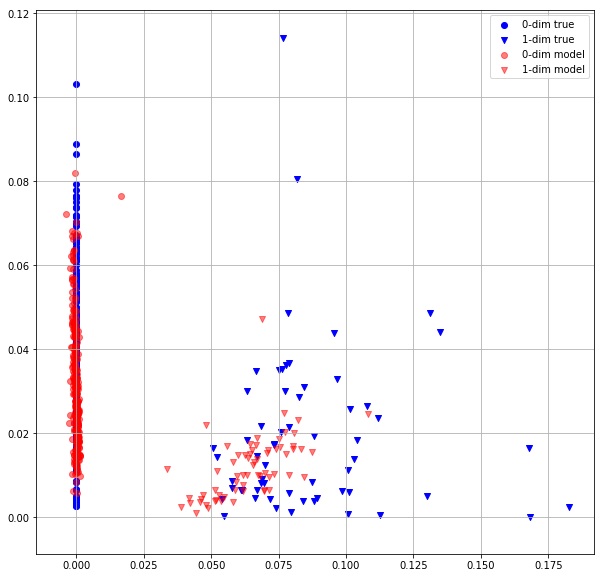

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   5 0.0248643812 0.0256945156


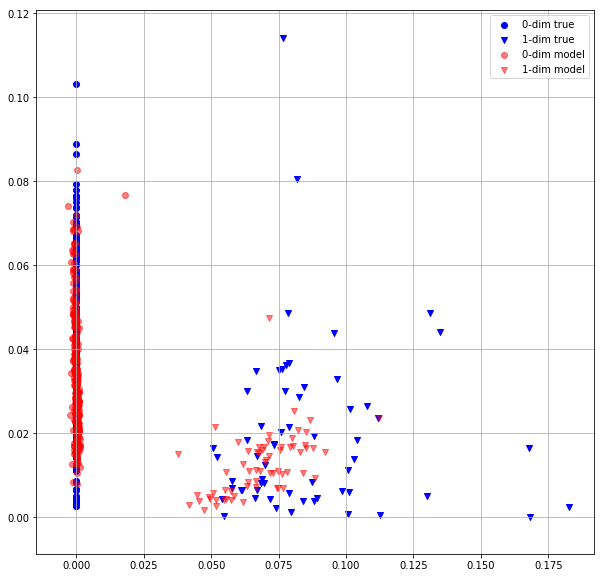

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   6 0.0243902691 0.0256042238


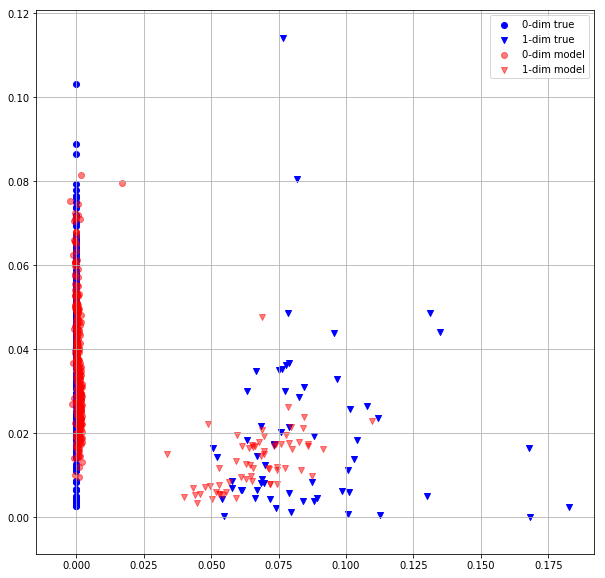

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   7 0.0241051763 0.0253873318


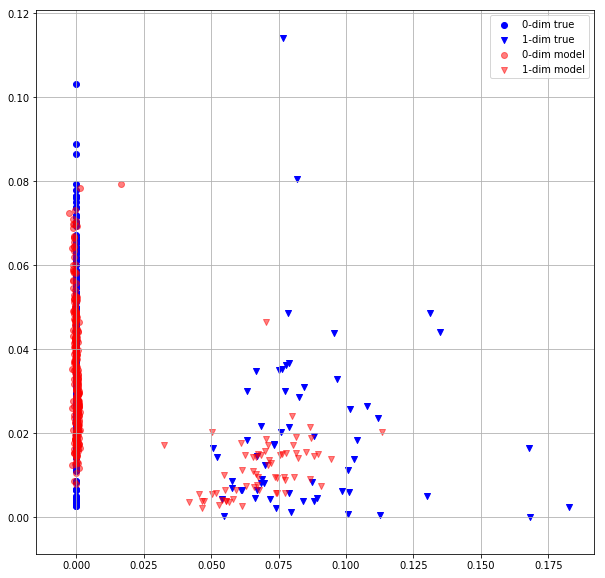

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   8 0.0238534324 0.0260345582


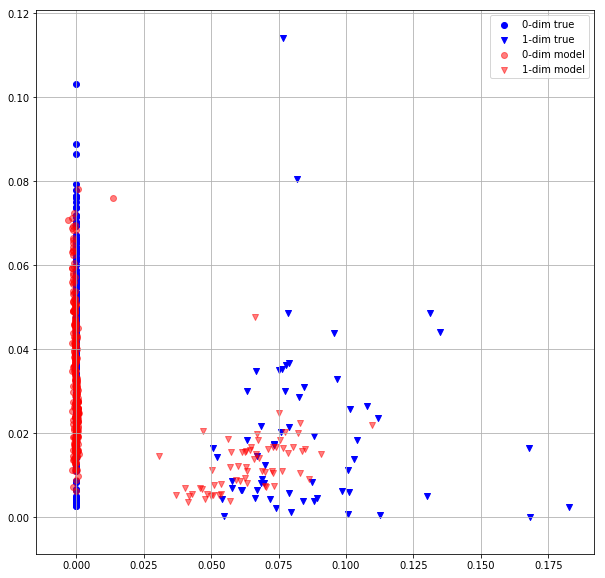

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   9 0.0236333832 0.0252043959


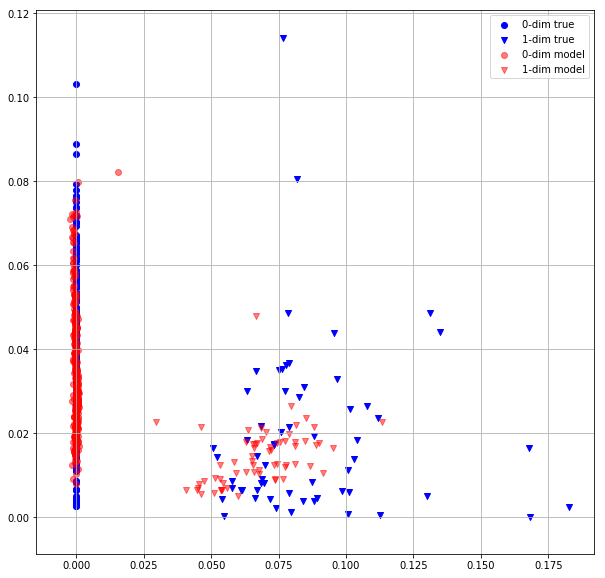

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  10 0.0233995486 0.0252907611


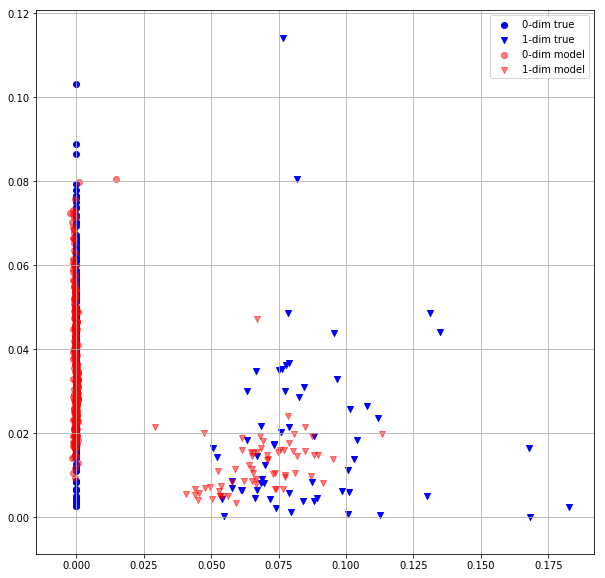

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  11 0.0232805256 0.0252060816


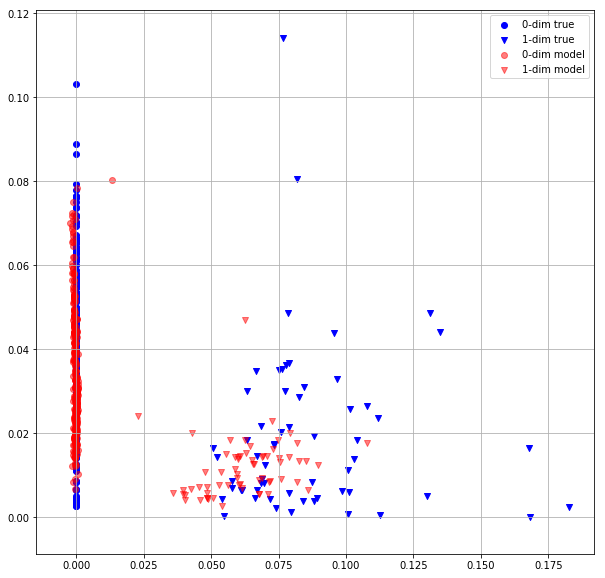

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  12 0.0230799653 0.0250016730


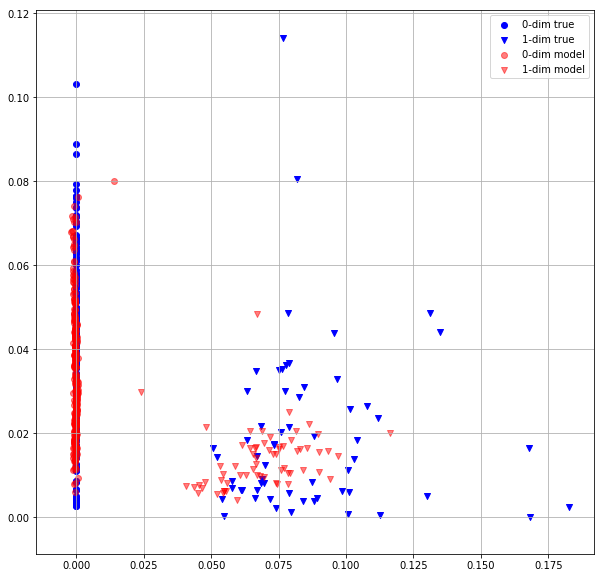

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  13 0.0231398344 0.0251725838


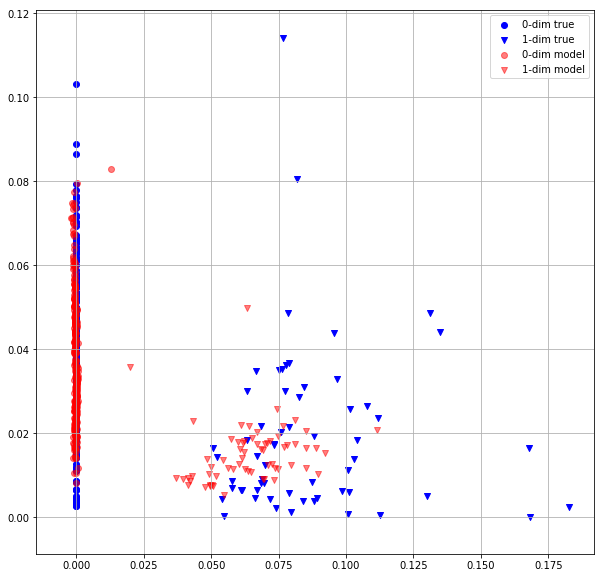

  0%|          | 0/13 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [5]:
# MLP + TSPN + 60 epochs + MLP_last
for epoch_idx in range(n_epochs):
        
    # train
    model.train()
        
    loss = 0
    for batch in tqdm(dataloader_train):
        src = batch[0].to(device)
        mask = batch[1].to(device)
        tgt = model(src, mask)
        loss_batch = criterion_hungarian(src.to(torch.float), tgt)
        loss_batch.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss += loss_batch.detach().cpu()
        
    loss_train = loss / len(dataloader_train.dataset)
        
    # test
    model.eval()
    loss = 0
    for batch in tqdm(dataloader_test):
        src = batch[0].to(device)
        mask = batch[1].to(device)
        
        with torch.no_grad():
            tgt = model(src, mask)
            loss_batch = criterion_hungarian(src.to(torch.float), tgt)
            loss += loss_batch
            
            
    loss_test = loss / len(dataloader_test.dataset)
        
    print("Epoch: {:3} {:.10f} {:.10f}".format(epoch_idx, loss_train, loss_test))
    item = dataset_test[0].reshape(1, -1, 3)
    mask = np.ones((1, item.shape[1]))

    d_mask0 = (item[0, :, 2] == 0)
    d_mask1 = (item[0, :, 2] == 1)

    pred = model(torch.tensor(item, dtype=torch.float).to(device), torch.tensor(mask).long().to(device)).detach().cpu().numpy()
    
    m = (pred[0, :, 2] > 0.5)
    mask0 = (m == 0)
    mask1 = (m == 1)
    #m = np.argmax(pred[0, :, 2:], axis = 1)
    #mask0 = (m == 0)
    #mask1 = (m == 1)

    plt.figure(figsize=(10, 10))

    plt.scatter(item[0, d_mask0, 0], item[0, d_mask0, 1], label = '0-dim true', marker = "o", c = "b")
    plt.scatter(item[0, d_mask1, 0], item[0, d_mask1, 1], label = '1-dim true', marker = "v", c = "b")


    plt.scatter(pred[0, mask0, 0], pred[0, mask0, 1], label = '0-dim model', alpha = 0.5, marker = "o", c = "r")
    plt.scatter(pred[0, mask1, 0], pred[0, mask1, 1], label = '1-dim model', alpha = 0.5, marker = "v", c = "r")
    plt.grid()
    plt.legend()
    plt.show()

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   0 0.0165743865 0.0150058232


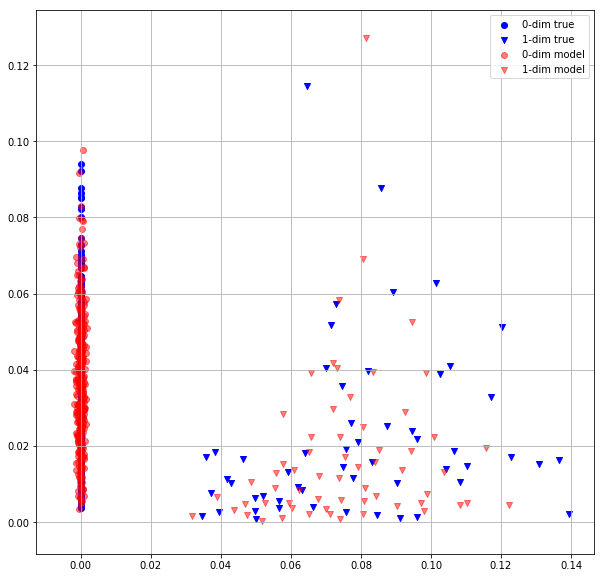

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   1 0.0165552646 0.0149929868


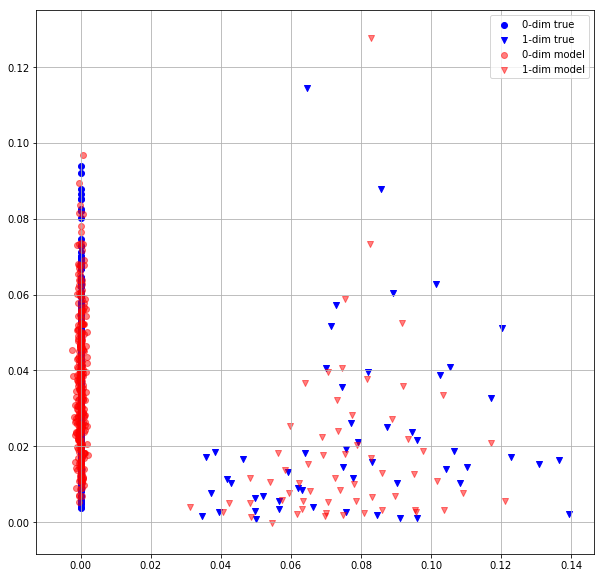

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   2 0.0165201053 0.0149828158


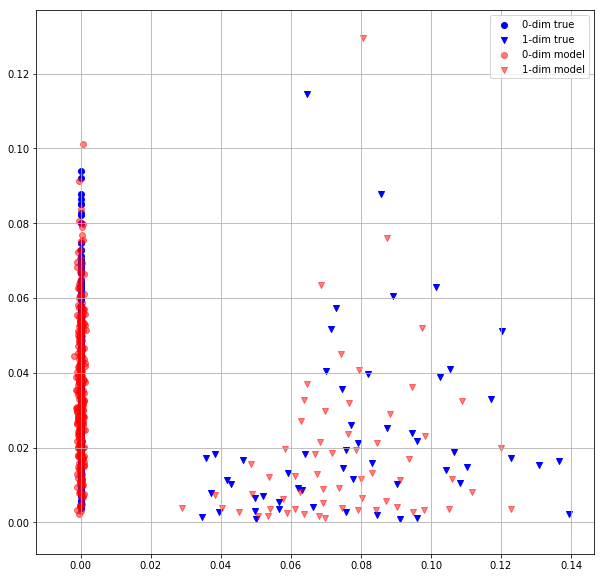

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   3 0.0164836403 0.0149181411


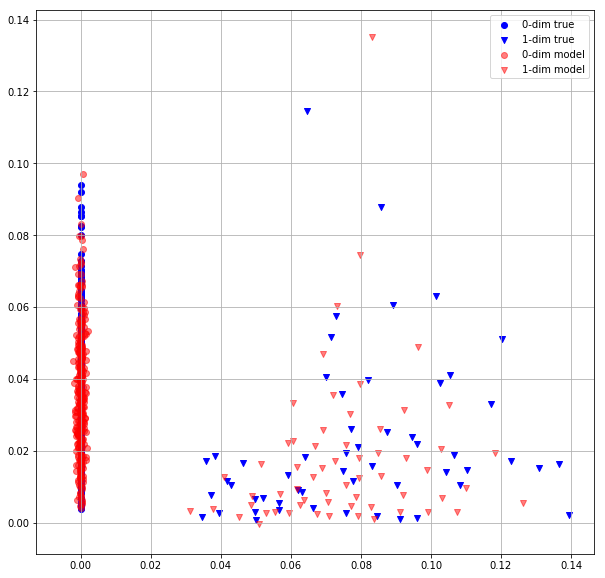

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   4 0.0164457578 0.0149215376


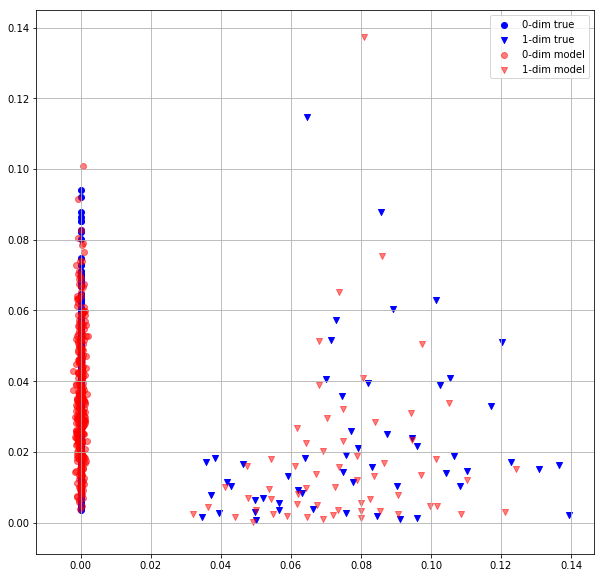

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   5 0.0164712090 0.0149378302


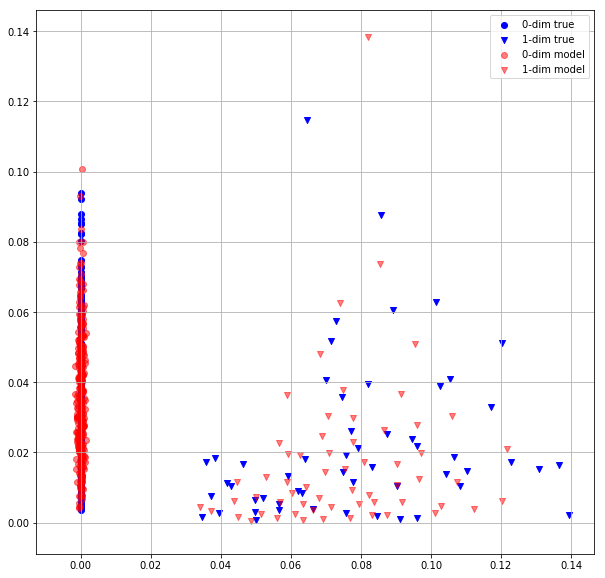

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   6 0.0164558571 0.0149372220


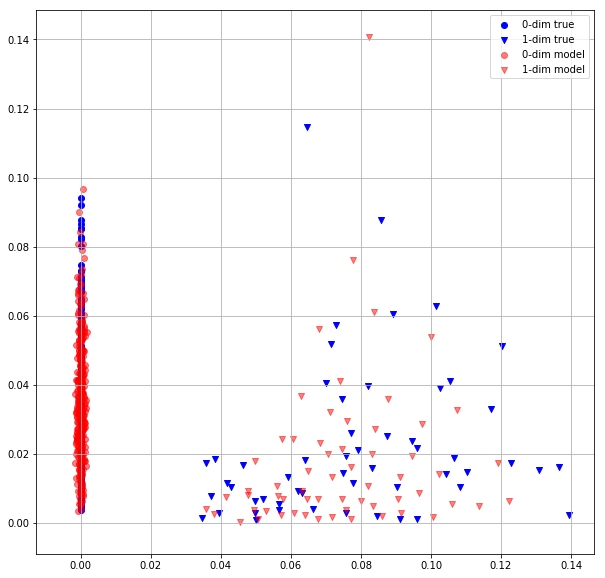

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   7 0.0164558105 0.0149061987


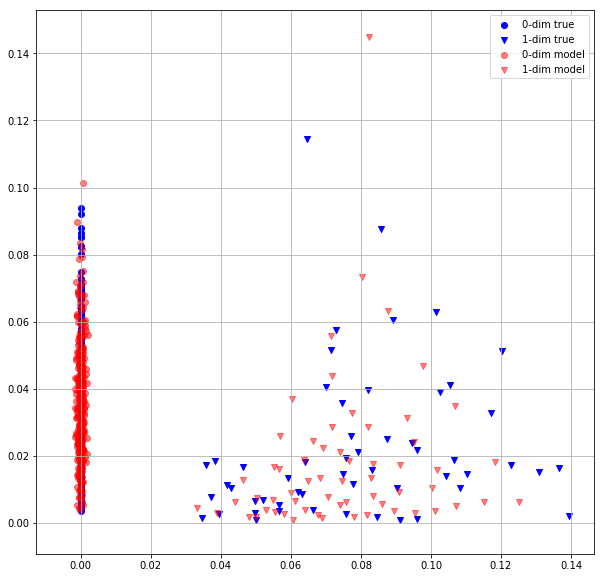

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   8 0.0164700150 0.0148986550


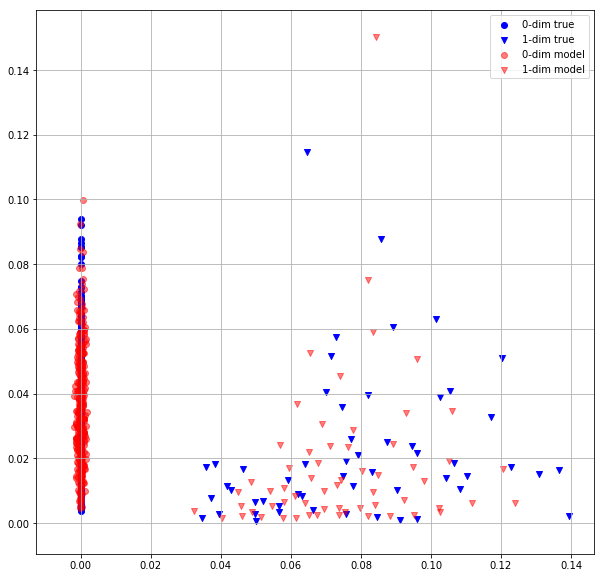

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   9 0.0164464805 0.0149287852


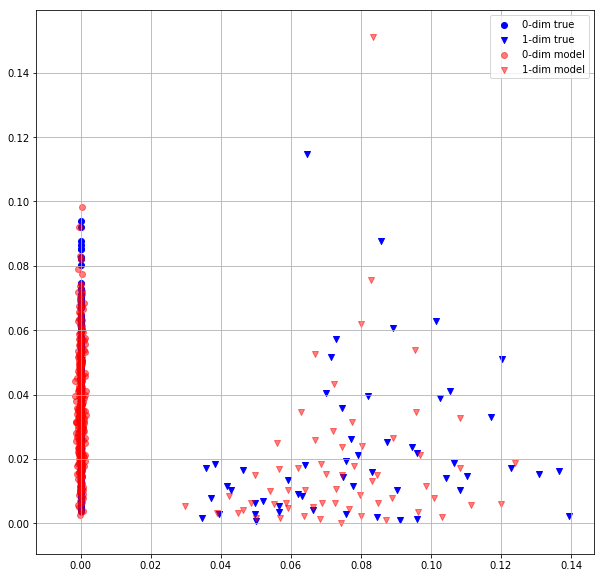

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  10 0.0164842773 0.0149386041


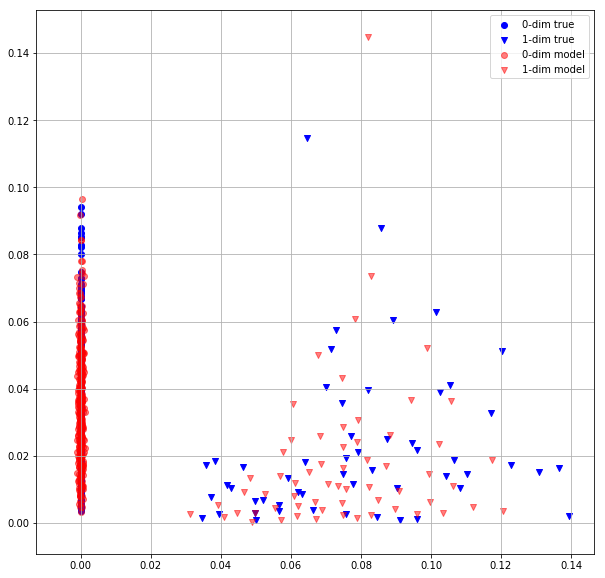

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  11 0.0164704472 0.0148617458


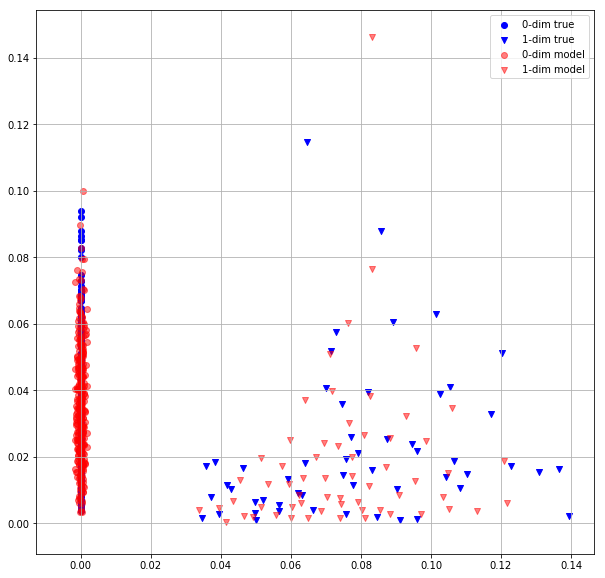

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  12 0.0164199397 0.0148659274


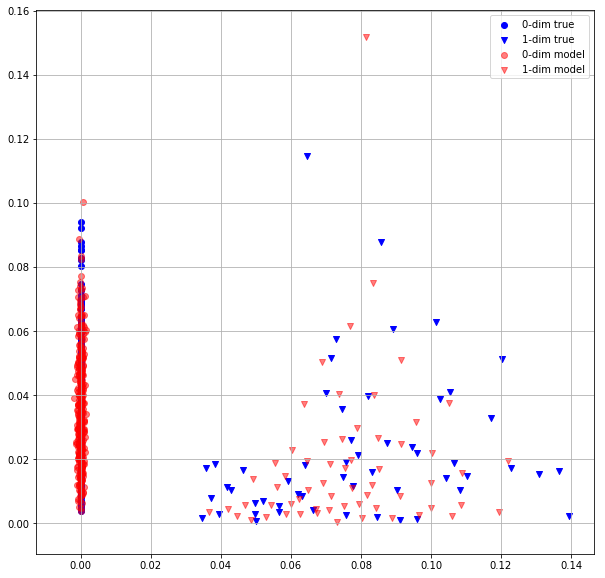

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  13 0.0164571218 0.0148804439


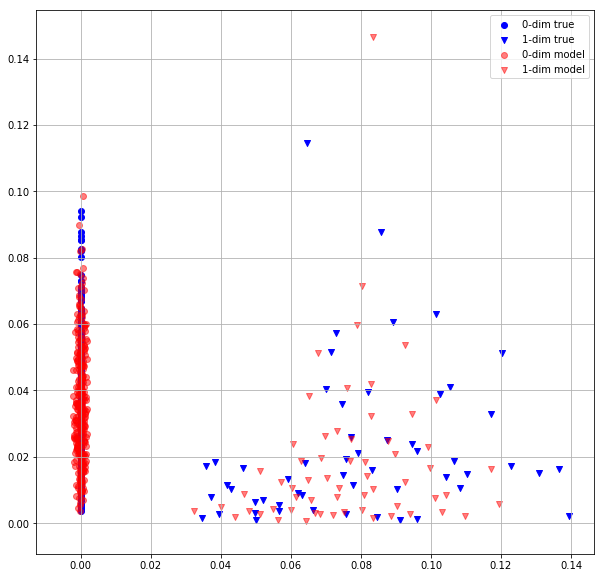

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  14 0.0164532345 0.0148386098


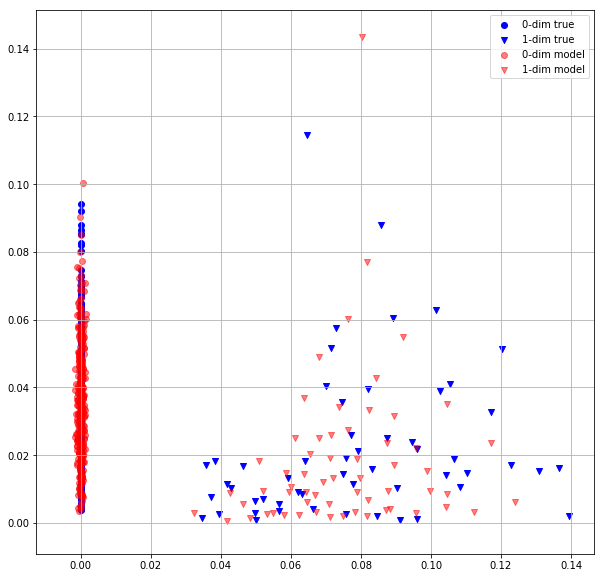

In [12]:
# linear baseline
for epoch_idx in range(n_epochs):
        
    # train
    model.train()
        
    loss = 0
    for batch in tqdm(dataloader_train):
        src = batch[0].to(device)
        mask = batch[1].to(device)
        tgt = model(src, mask)
        loss_batch = criterion_hungarian(src.to(torch.float), tgt)
        loss_batch.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss += loss_batch.detach().cpu()
        
    loss_train = loss / len(dataloader_train.dataset)
        
    # test
    model.eval()
    loss = 0
    for batch in tqdm(dataloader_test):
        src = batch[0].to(device)
        mask = batch[1].to(device)
        
        with torch.no_grad():
            tgt = model(src, mask)
            loss_batch = criterion_hungarian(src.to(torch.float), tgt)
            loss += loss_batch
            
            
    loss_test = loss / len(dataloader_test.dataset)
        
    print("Epoch: {:3} {:.10f} {:.10f}".format(epoch_idx, loss_train, loss_test))
    item = dataset_test[0].reshape(1, -1, 3)
    mask = np.ones((1, item.shape[1]))

    d_mask0 = (item[0, :, 2] == 0)
    d_mask1 = (item[0, :, 2] == 1)

    pred = model(torch.tensor(item, dtype=torch.float).to(device), torch.tensor(mask).long().to(device)).detach().cpu().numpy()
    
    m = (pred[0, :, 2] > 0.5)
    mask0 = (m == 0)
    mask1 = (m == 1)
    #m = np.argmax(pred[0, :, 2:], axis = 1)
    #mask0 = (m == 0)
    #mask1 = (m == 1)

    plt.figure(figsize=(10, 10))

    plt.scatter(item[0, d_mask0, 0], item[0, d_mask0, 1], label = '0-dim true', marker = "o", c = "b")
    plt.scatter(item[0, d_mask1, 0], item[0, d_mask1, 1], label = '1-dim true', marker = "v", c = "b")


    plt.scatter(pred[0, mask0, 0], pred[0, mask0, 1], label = '0-dim model', alpha = 0.5, marker = "o", c = "r")
    plt.scatter(pred[0, mask1, 0], pred[0, mask1, 1], label = '1-dim model', alpha = 0.5, marker = "v", c = "r")
    plt.grid()
    plt.legend()
    plt.show()

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   0 0.0358816162 0.0256848913


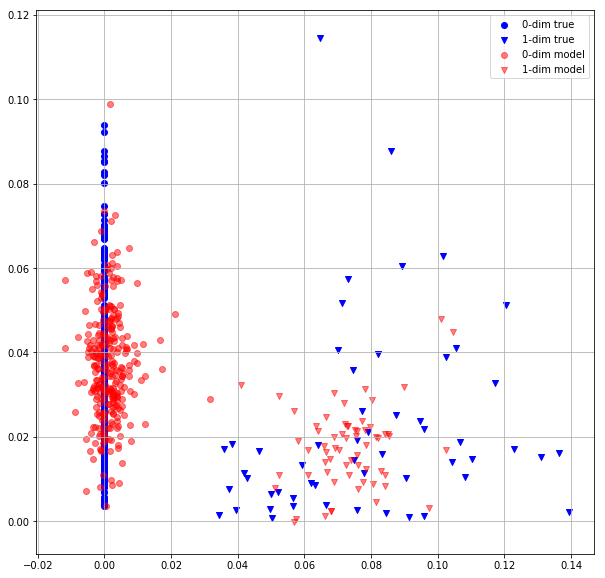

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   1 0.0349563695 0.0243332330


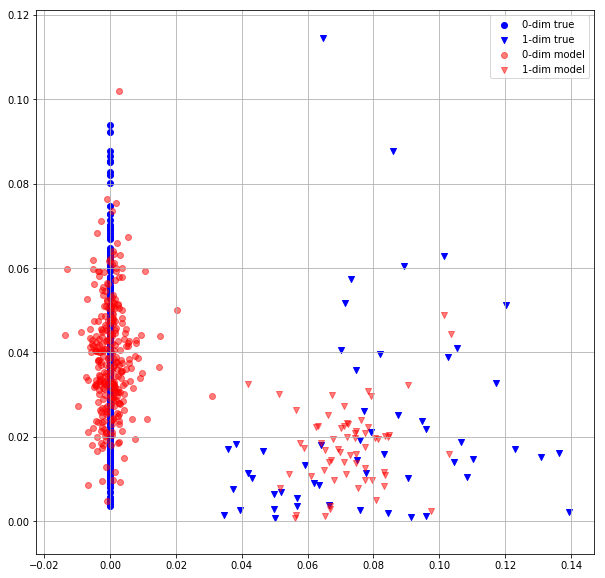

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   2 0.0341725312 0.0240384284


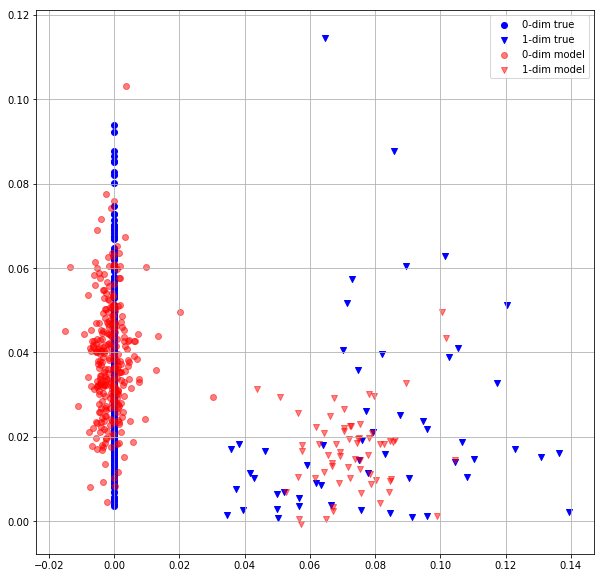

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   3 0.0336291231 0.0249733068


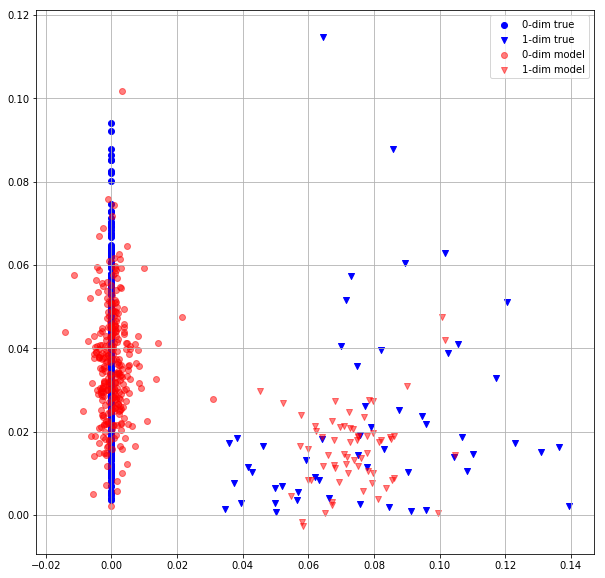

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   4 0.0331159569 0.0244910885


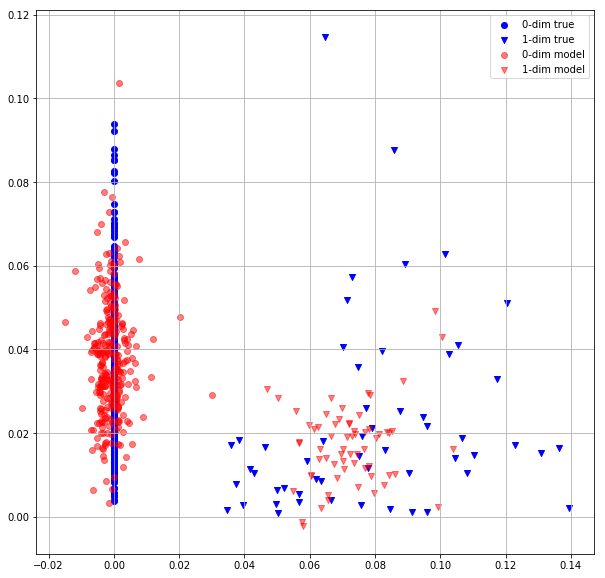

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   5 0.0324978046 0.0235446878


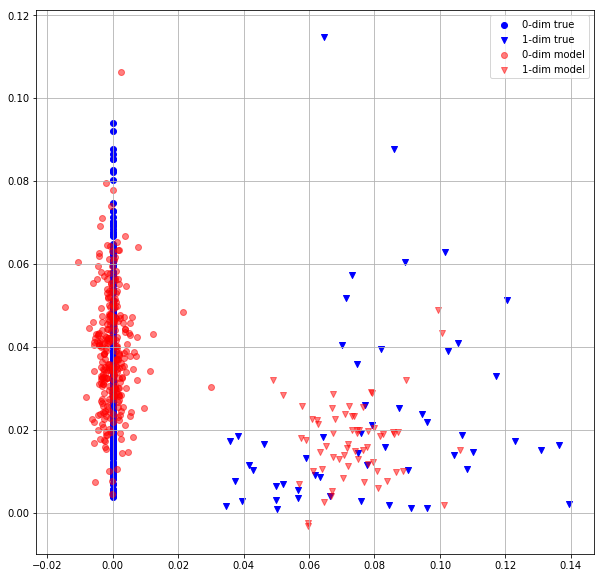

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   6 0.0321288332 0.0237392560


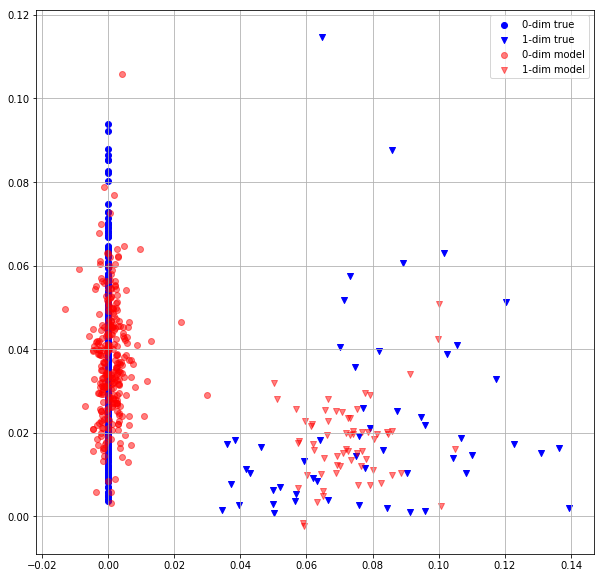

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   7 0.0314111821 0.0230700430


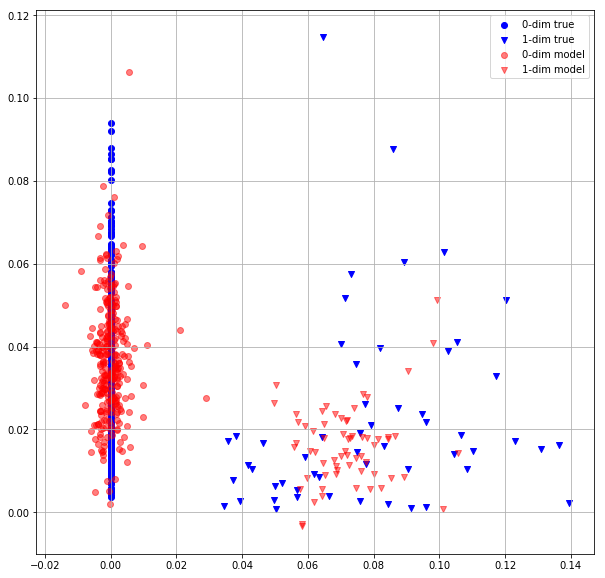

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   8 0.0310021117 0.0233690087


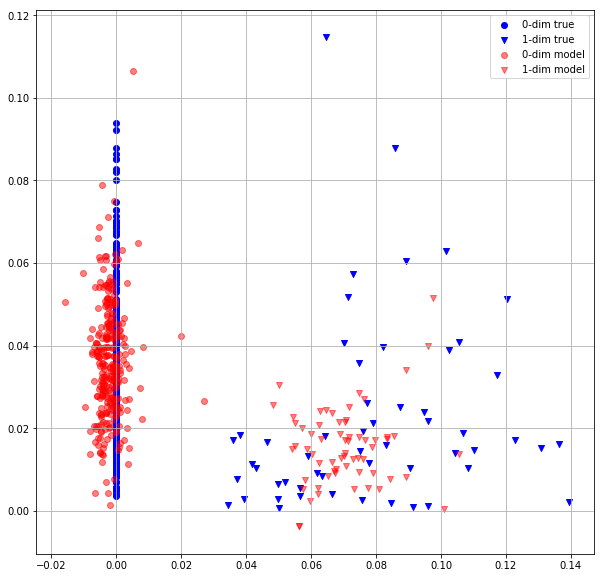

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   9 0.0307441764 0.0235854909


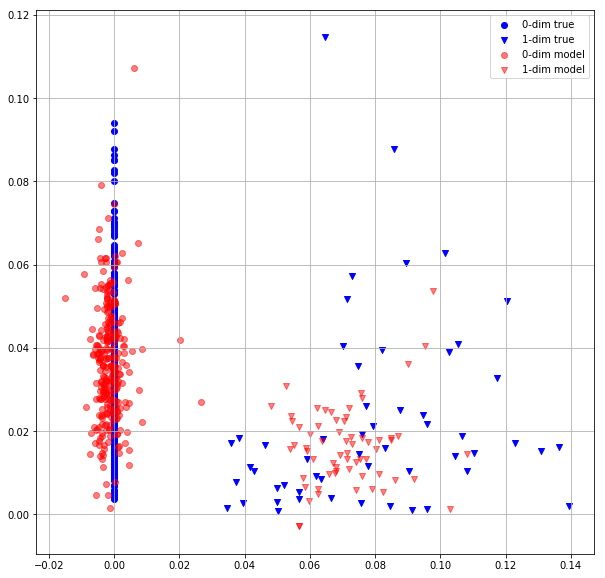

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  10 0.0305584334 0.0226302836


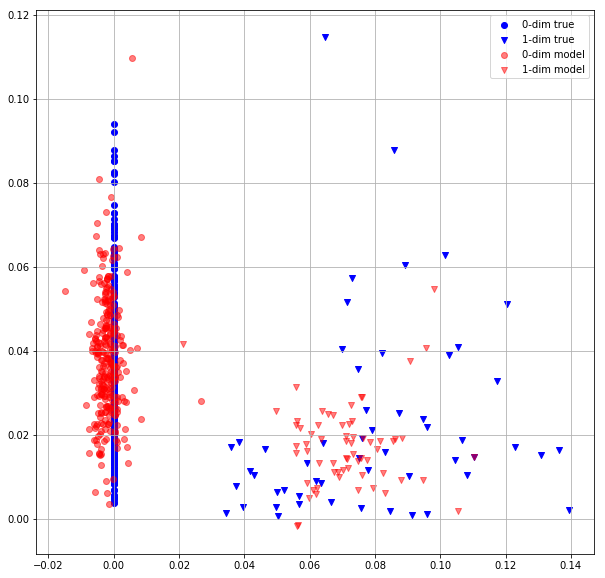

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  11 0.0305708367 0.0240534488


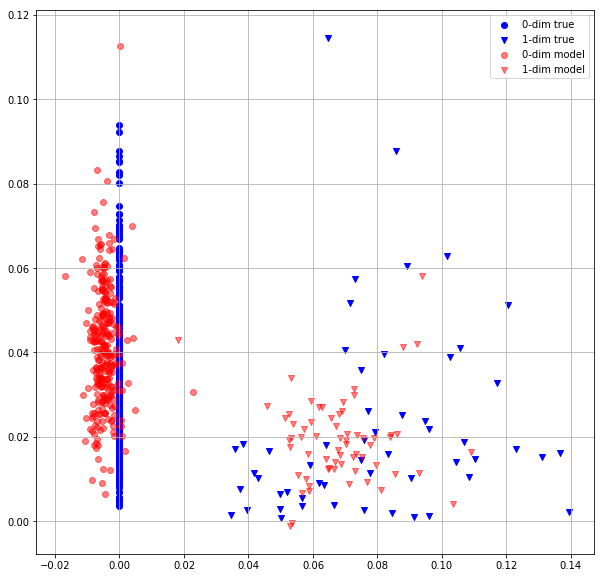

  0%|          | 0/13 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [5]:
# TSPN_new + Conv1d
for epoch_idx in range(n_epochs):
        
    # train
    model.train()
        
    loss = 0
    for batch in tqdm(dataloader_train):
        src = batch[0].to(device)
        mask = batch[1].to(device)
        tgt = model(src, mask)
        loss_batch = criterion_hungarian(src.to(torch.float), tgt)
        loss_batch.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss += loss_batch.detach().cpu()
        
    loss_train = loss / len(dataloader_train.dataset)
        
    # test
    model.eval()
    loss = 0
    for batch in tqdm(dataloader_test):
        src = batch[0].to(device)
        mask = batch[1].to(device)
        
        with torch.no_grad():
            tgt = model(src, mask)
            loss_batch = criterion_hungarian(src.to(torch.float), tgt)
            loss += loss_batch
            
            
    loss_test = loss / len(dataloader_test.dataset)
        
    print("Epoch: {:3} {:.10f} {:.10f}".format(epoch_idx, loss_train, loss_test))
    item = dataset_test[0].reshape(1, -1, 3)
    mask = np.ones((1, item.shape[1]))

    d_mask0 = (item[0, :, 2] == 0)
    d_mask1 = (item[0, :, 2] == 1)

    pred = model(torch.tensor(item, dtype=torch.float).to(device), torch.tensor(mask).long().to(device)).detach().cpu().numpy()
    
    m = (pred[0, :, 2] > 0.5)
    mask0 = (m == 0)
    mask1 = (m == 1)
    #m = np.argmax(pred[0, :, 2:], axis = 1)
    #mask0 = (m == 0)
    #mask1 = (m == 1)

    plt.figure(figsize=(10, 10))

    plt.scatter(item[0, d_mask0, 0], item[0, d_mask0, 1], label = '0-dim true', marker = "o", c = "b")
    plt.scatter(item[0, d_mask1, 0], item[0, d_mask1, 1], label = '1-dim true', marker = "v", c = "b")


    plt.scatter(pred[0, mask0, 0], pred[0, mask0, 1], label = '0-dim model', alpha = 0.5, marker = "o", c = "r")
    plt.scatter(pred[0, mask1, 0], pred[0, mask1, 1], label = '1-dim model', alpha = 0.5, marker = "v", c = "r")
    plt.grid()
    plt.legend()
    plt.show()

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   0 0.6664509773 0.5939534903


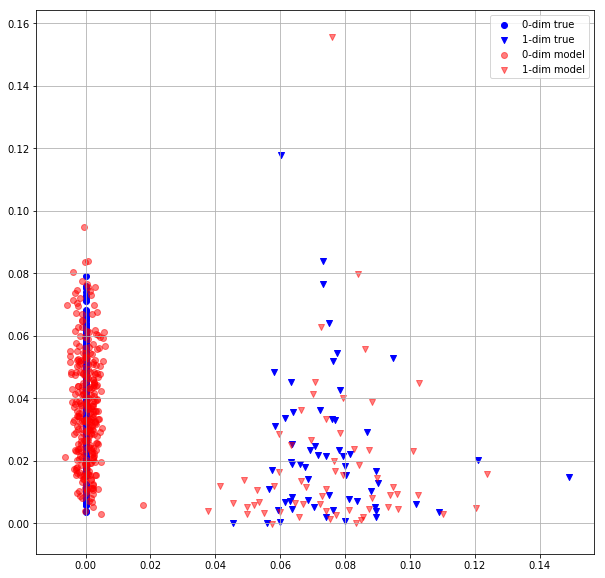

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   1 0.6467582583 0.5512588024


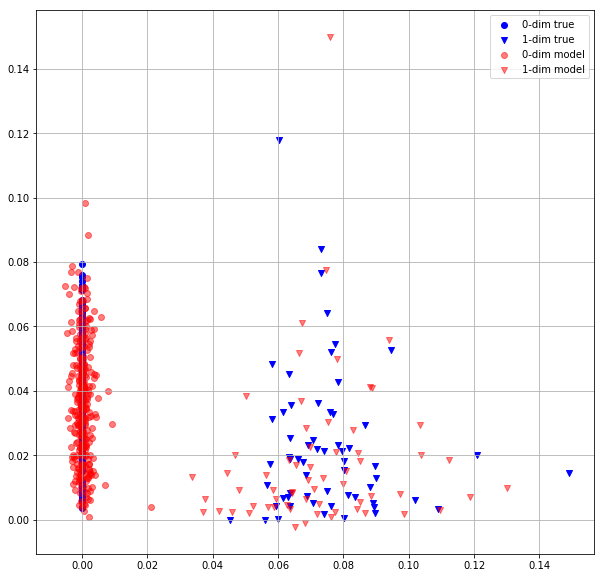

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   2 0.6026138067 0.4897106290


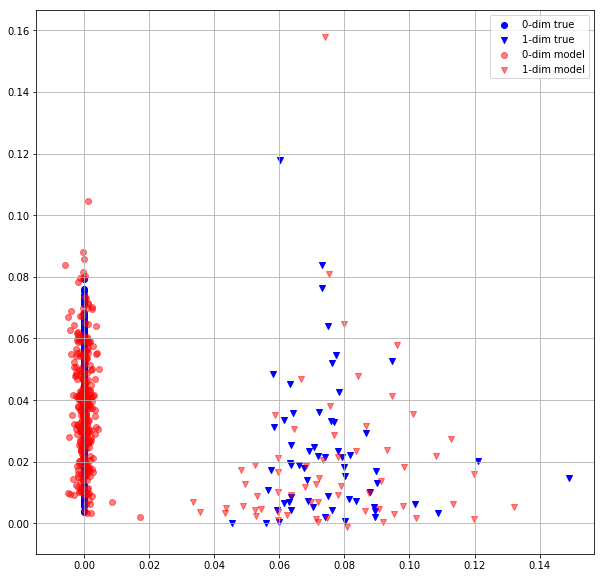

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   3 0.5769614577 0.4770133197


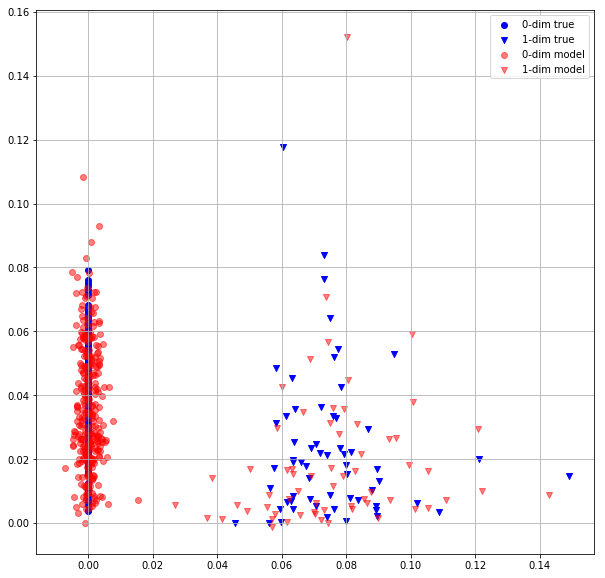

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   4 0.5476754904 0.4564357102


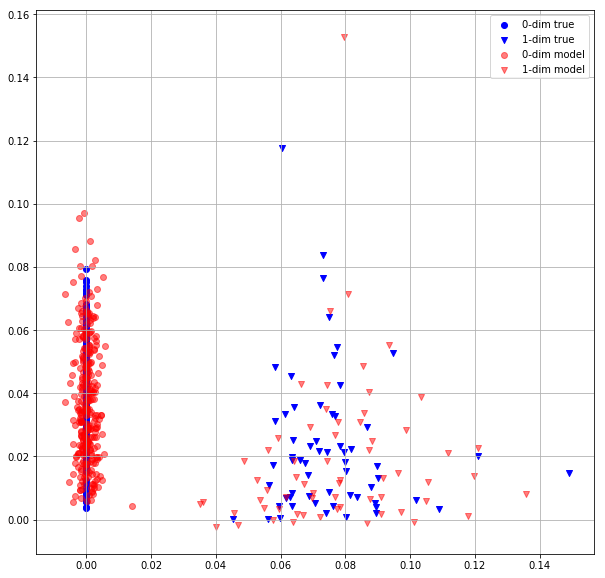

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   5 0.5279886723 0.4376513362


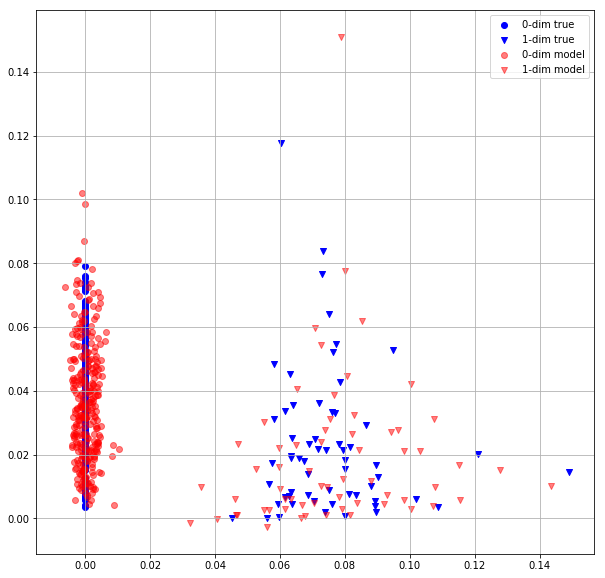

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   6 0.5475848913 0.4755875468


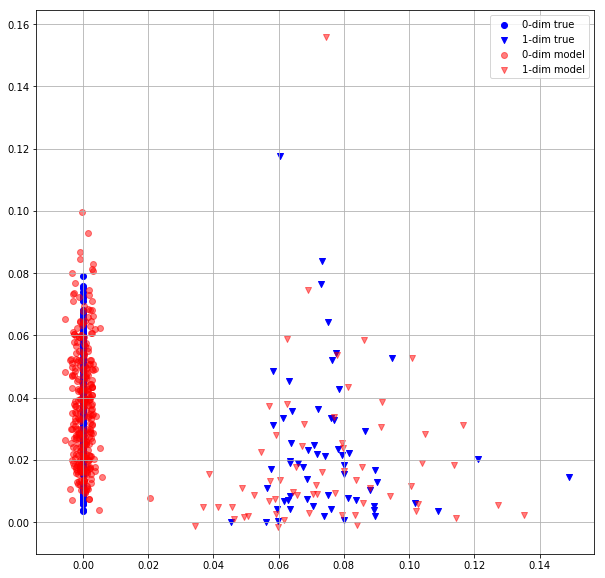

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   7 0.5614190698 0.4927764535


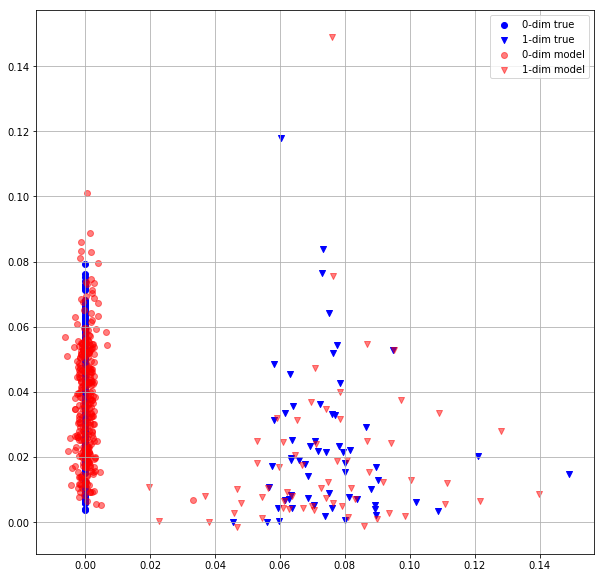

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   8 0.5472761393 0.4604049623


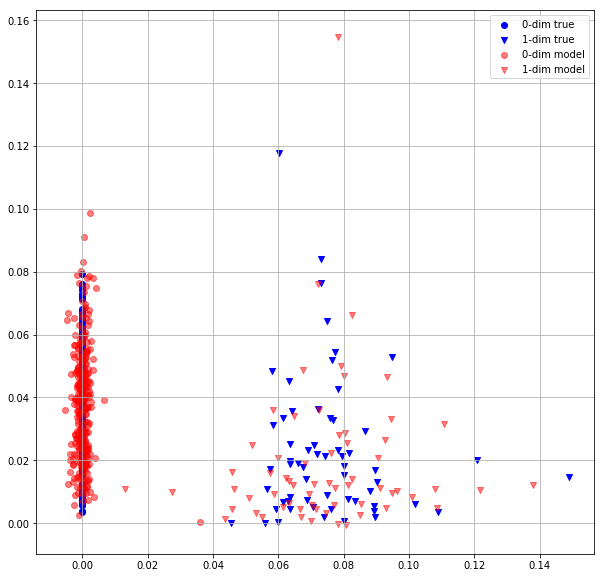

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   9 0.5350675583 0.4676076174


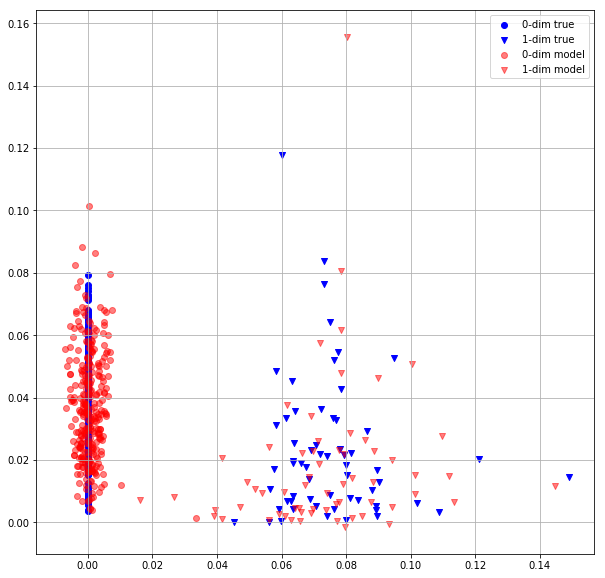

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  10 0.5398655534 0.4683077931


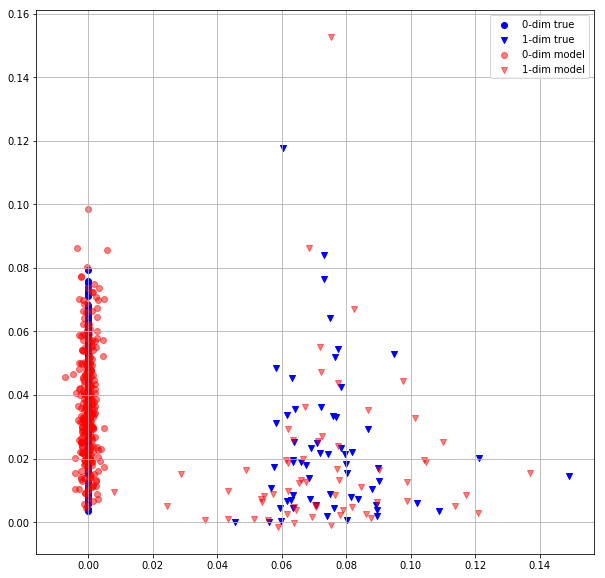

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  11 0.5530951023 0.4967935085


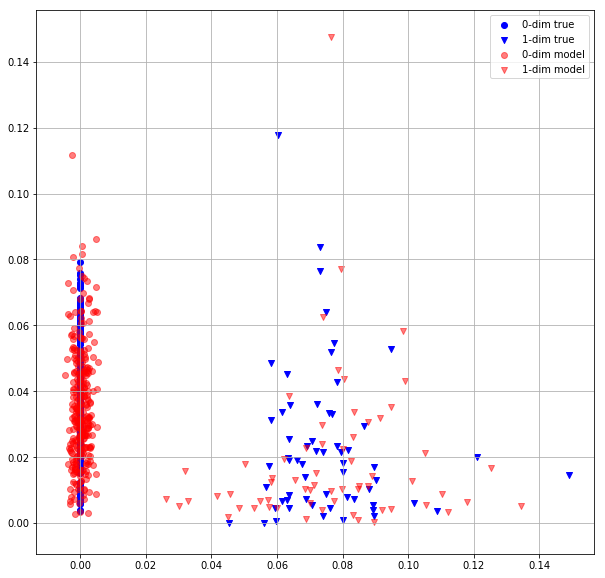

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  12 0.5749887228 0.4670205414


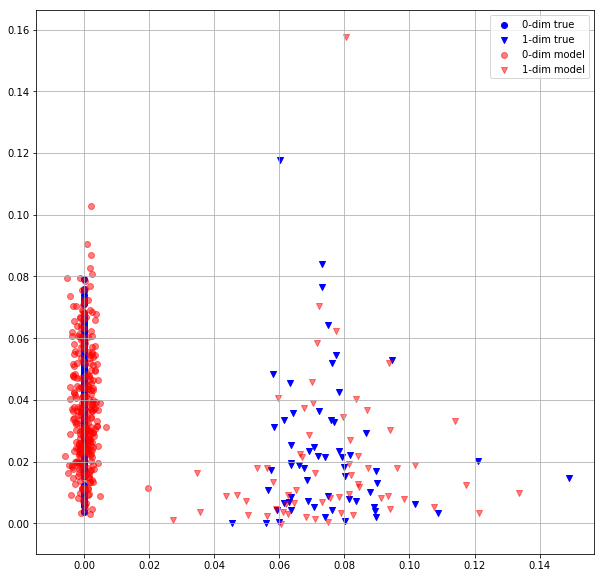

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  13 0.5250489712 0.4123868048


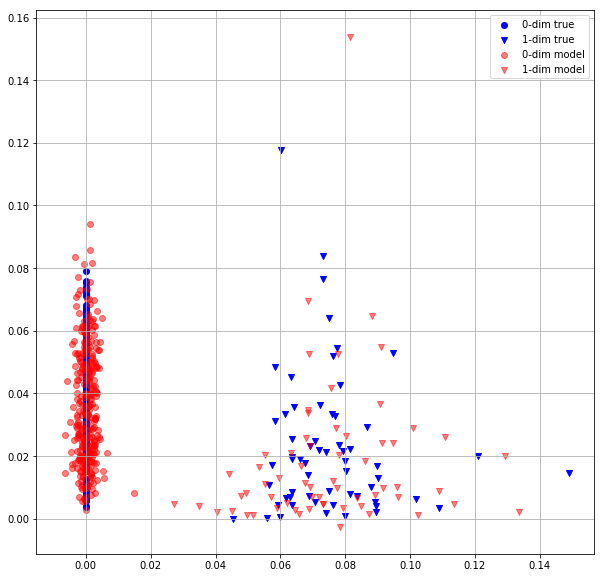

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  14 0.5073882937 0.3886916339


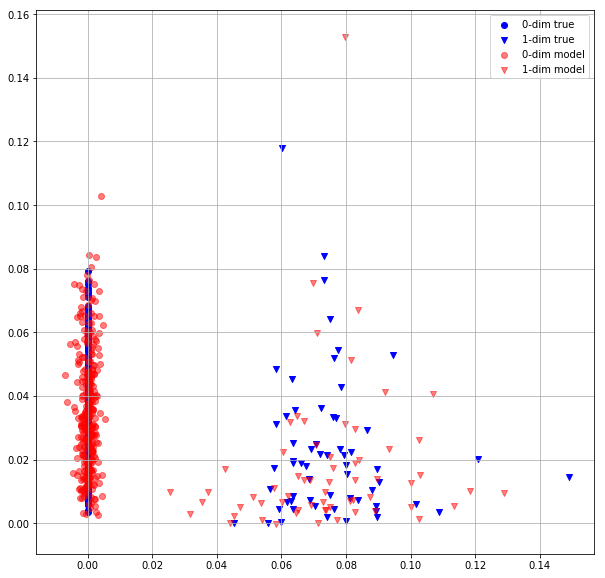

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  15 0.4919864535 0.4034193456


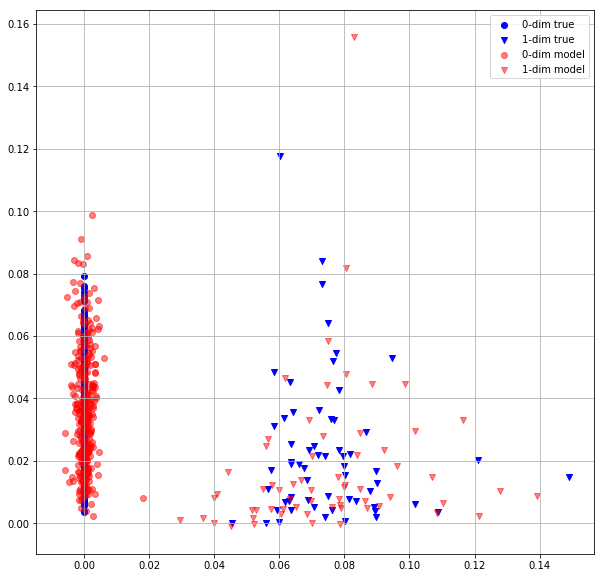

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  16 0.4826646149 0.4194571972


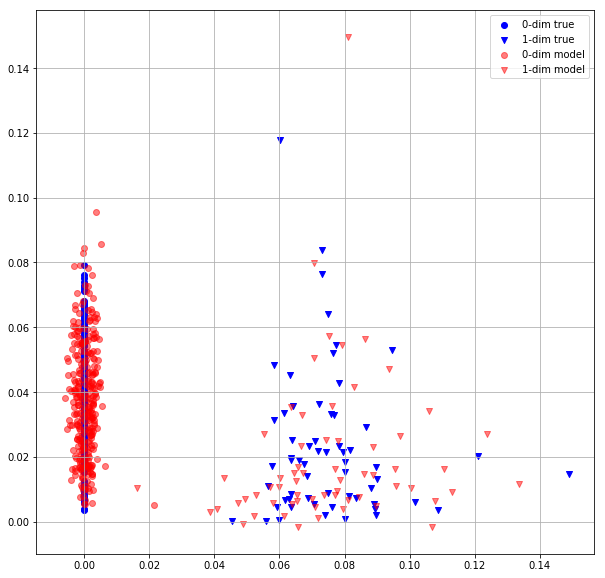

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  17 0.5350172520 0.4426896572


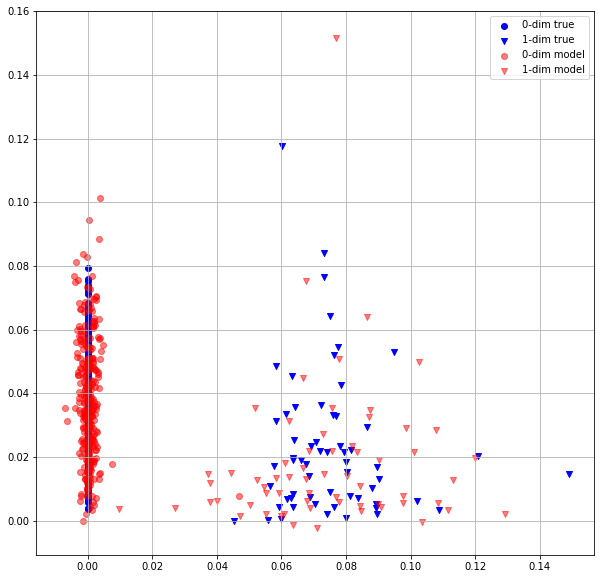

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  18 0.5135776401 0.4105750620


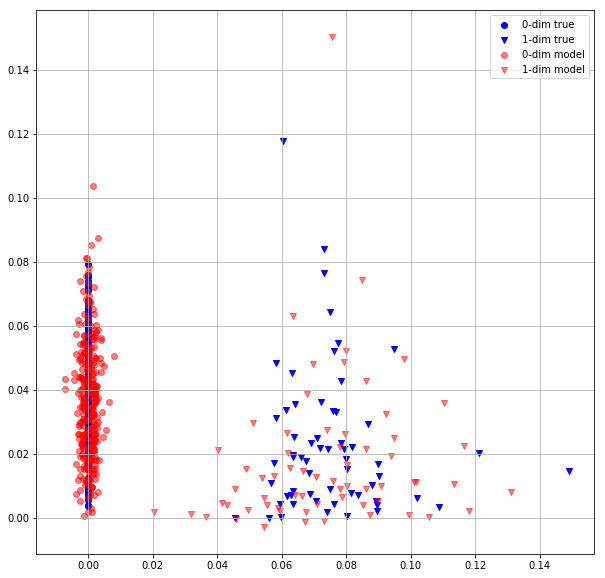

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  19 0.4759995937 0.3955135345


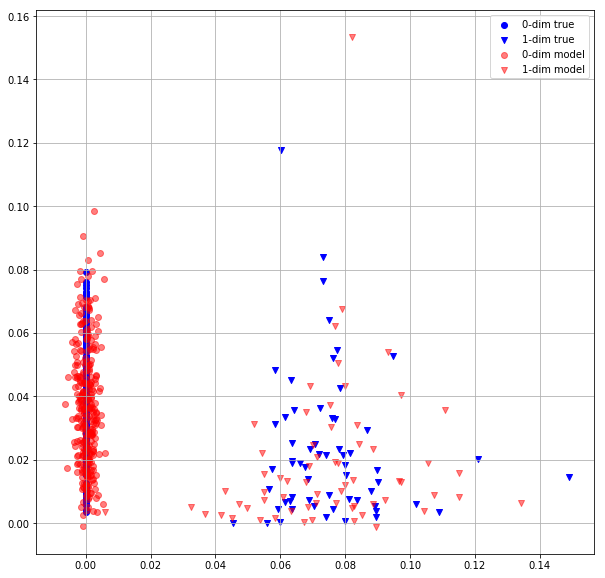

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  20 0.4914304316 0.3999338448


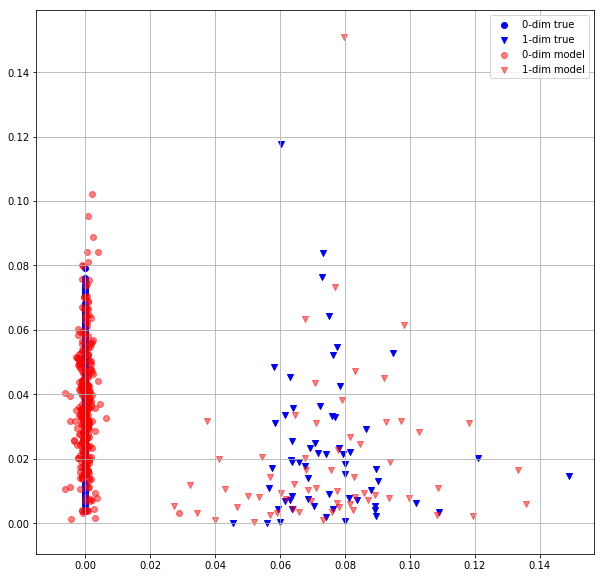

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  21 0.4927001894 0.4000869393


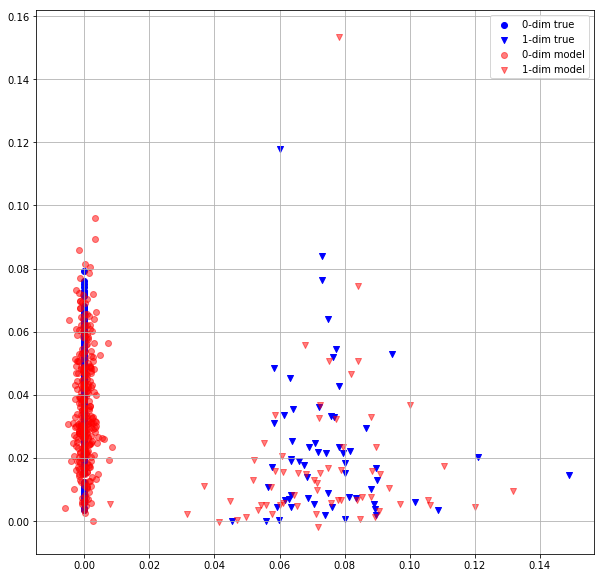

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  22 0.5173833370 0.4327930212


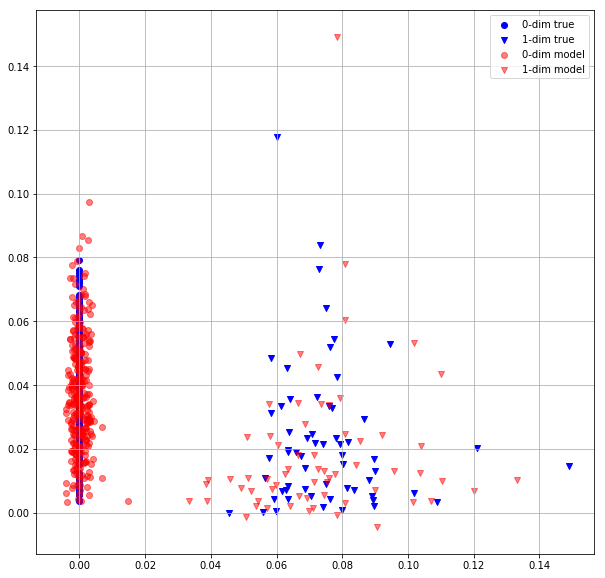

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  23 0.5058147907 0.4145531058


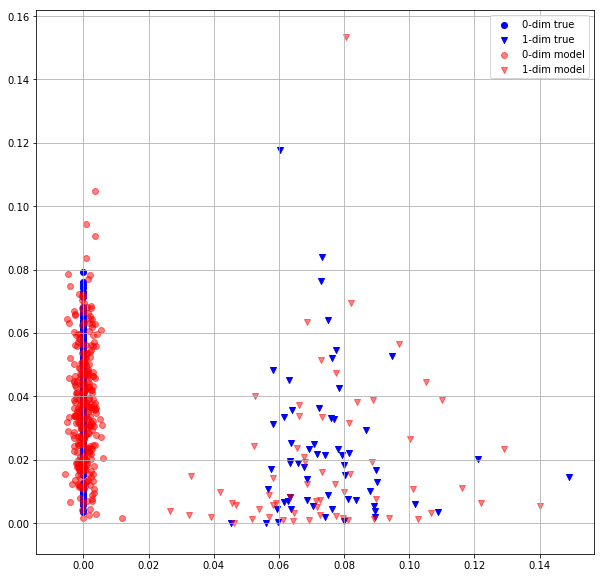

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  24 0.4965009391 0.4309901297


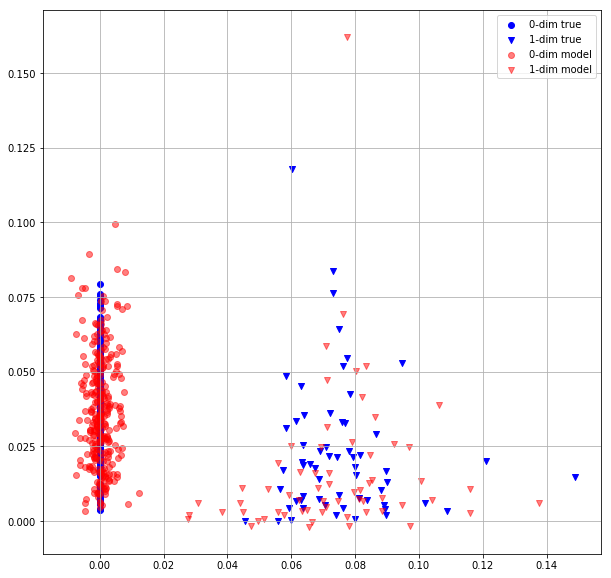

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  25 0.5276472569 0.4693246186


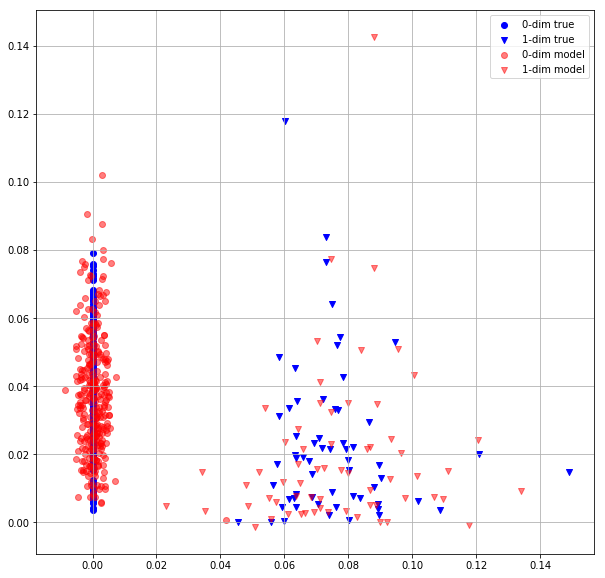

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  26 0.5367816687 0.4865224361


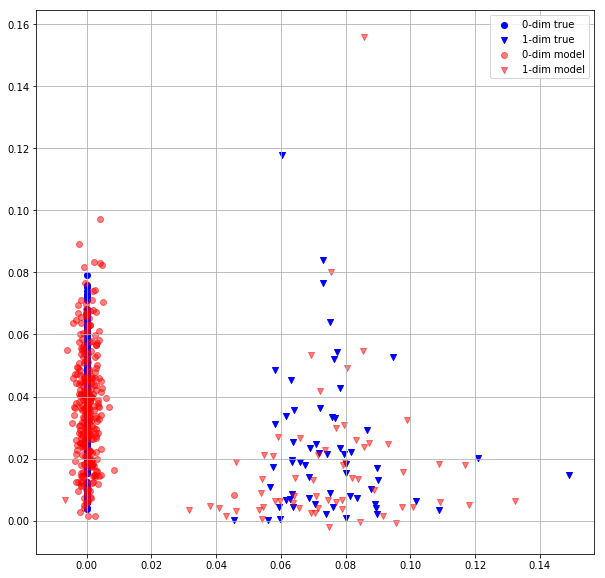

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  27 0.5097474456 0.4031035900


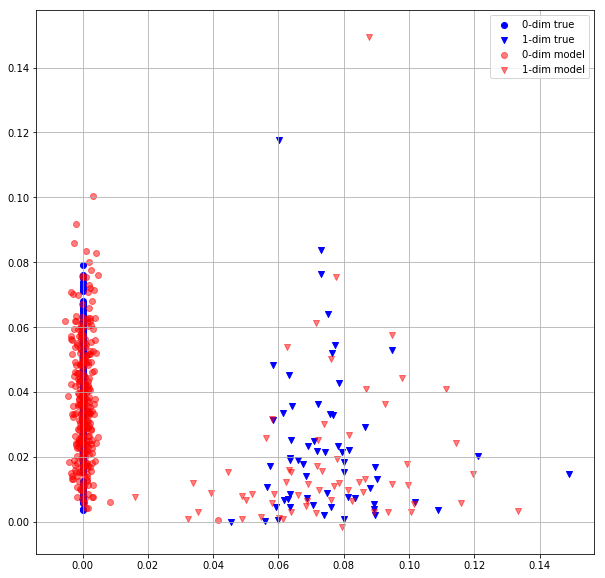

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  28 0.4937735498 0.4006532729


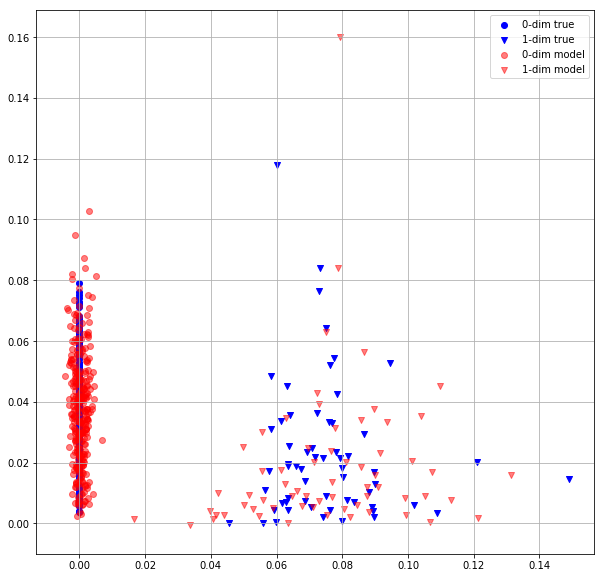

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  29 0.4763743579 0.3856259286


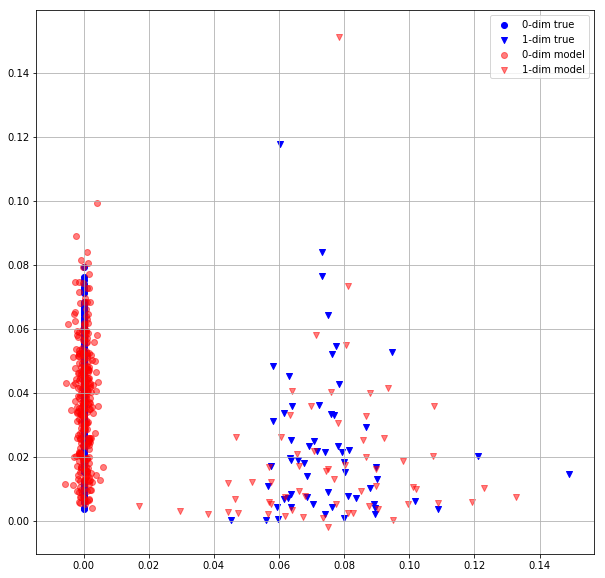

In [5]:
#MLP enc + MLP dec + 60 epochs + custom loss
for epoch_idx in range(n_epochs):
        
    # train
    model.train()
        
    loss = 0
    for batch in tqdm(dataloader_train):
        src = batch[0].to(device)
        mask = batch[1].to(device)
        tgt = model(src, mask)
        loss_batch = criterion_hungarian(src.to(torch.float), tgt)
        loss_batch.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss += loss_batch.detach().cpu()
        
    loss_train = loss / len(dataloader_train.dataset)
        
    # test
    model.eval()
    loss = 0
    for batch in tqdm(dataloader_test):
        src = batch[0].to(device)
        mask = batch[1].to(device)
        
        with torch.no_grad():
            tgt = model(src, mask)
            loss_batch = criterion_hungarian(src.to(torch.float), tgt)
            loss += loss_batch
            
            
    loss_test = loss / len(dataloader_test.dataset)
        
    print("Epoch: {:3} {:.10f} {:.10f}".format(epoch_idx, loss_train, loss_test))
    item = dataset_test[0].reshape(1, -1, 3)
    mask = np.ones((1, item.shape[1]))

    d_mask0 = (item[0, :, 2] == 0)
    d_mask1 = (item[0, :, 2] == 1)

    pred = model(torch.tensor(item, dtype=torch.float).to(device), torch.tensor(mask).long().to(device)).detach().cpu().numpy()
    
    #m = (pred[0, :, 2] > 0.5)
    #mask0 = (m == 0)
    #mask1 = (m == 1)
    m = np.argmax(pred[0, :, 2:], axis = 1)
    mask0 = (m == 0)
    mask1 = (m == 1)

    plt.figure(figsize=(10, 10))

    plt.scatter(item[0, d_mask0, 0], item[0, d_mask0, 1], label = '0-dim true', marker = "o", c = "b")
    plt.scatter(item[0, d_mask1, 0], item[0, d_mask1, 1], label = '1-dim true', marker = "v", c = "b")


    plt.scatter(pred[0, mask0, 0], pred[0, mask0, 1], label = '0-dim model', alpha = 0.5, marker = "o", c = "r")
    plt.scatter(pred[0, mask1, 0], pred[0, mask1, 1], label = '1-dim model', alpha = 0.5, marker = "v", c = "r")
    plt.grid()
    plt.legend()
    plt.show()

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   0 0.0666962862 0.0387450382


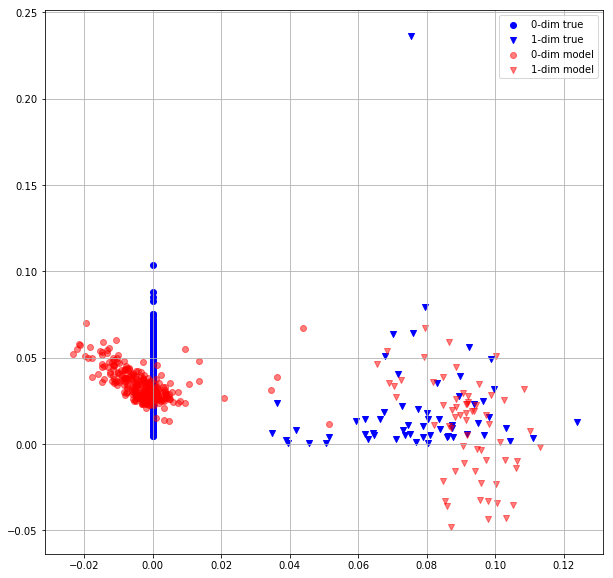

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   1 0.0638857782 0.0372791924


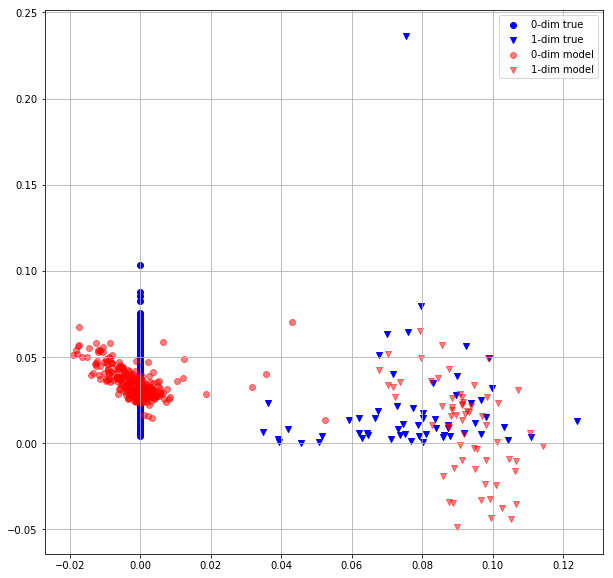

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   2 0.0609084405 0.0359138027


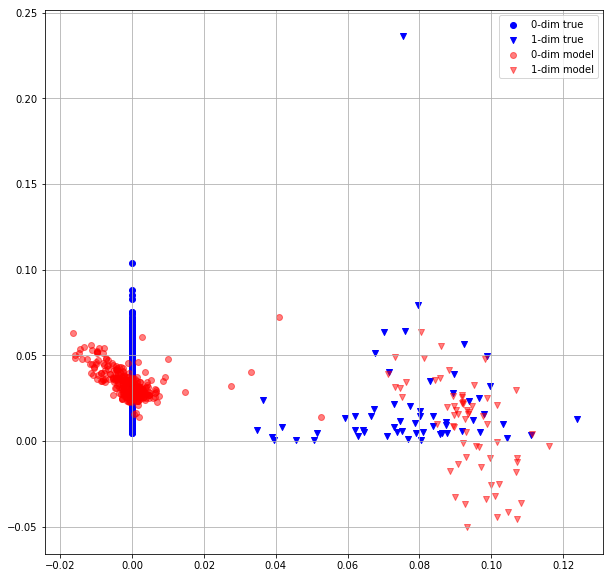

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   3 0.0586430989 0.0348337218


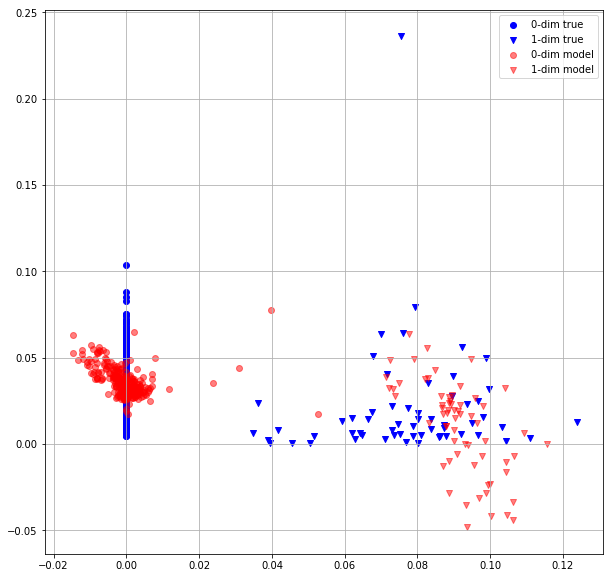

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   4 0.0562543198 0.0340393707


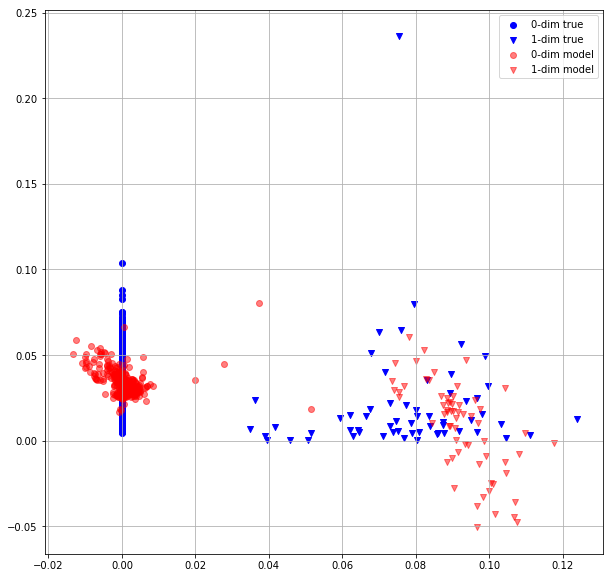

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   5 0.0544868670 0.0338474922


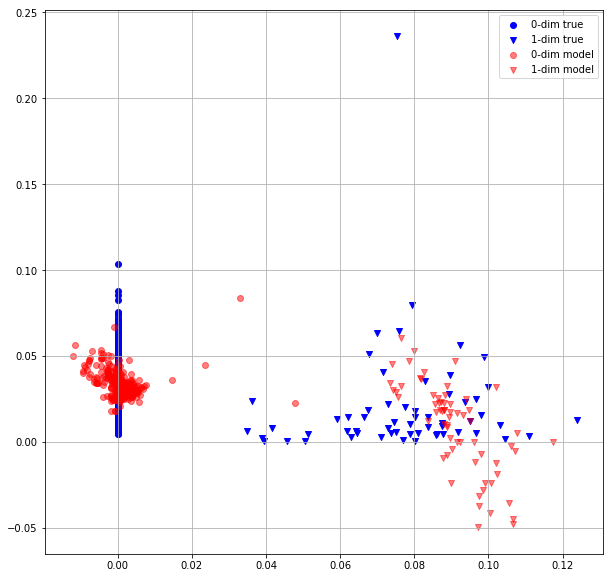

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   6 0.0530098565 0.0332533307


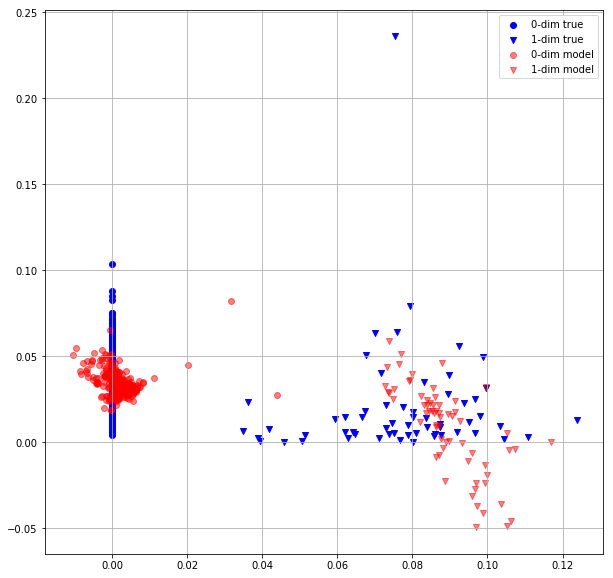

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   7 0.0510819294 0.0327962302


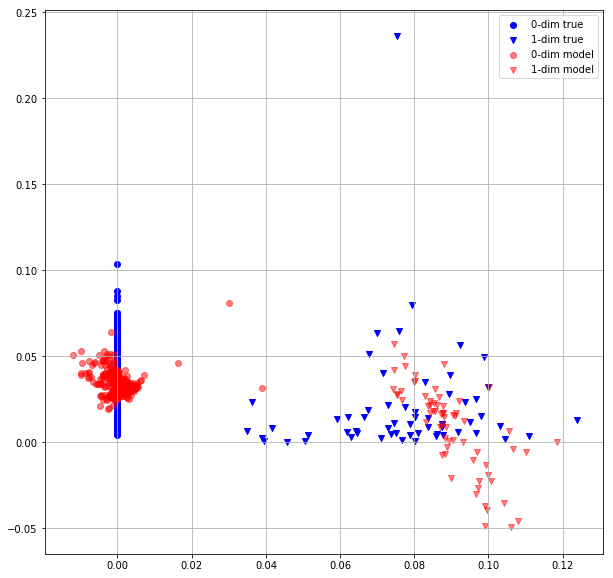

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   8 0.0495296381 0.0323458090


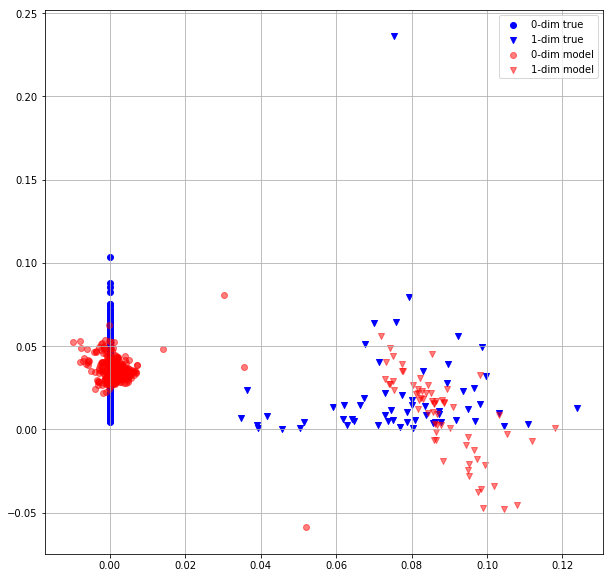

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   9 0.0478954799 0.0315287896


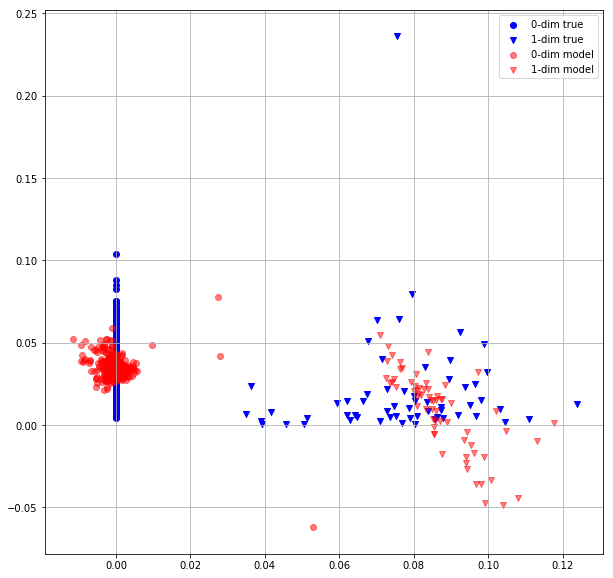

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  10 0.0461862199 0.0309280306


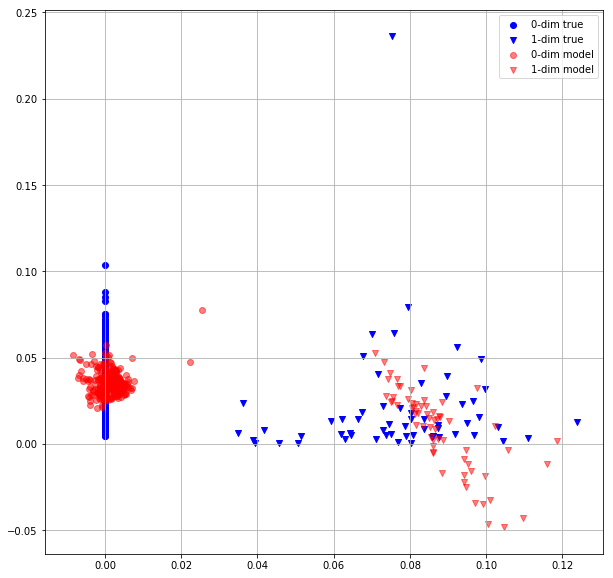

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  11 0.0449872166 0.0308966208


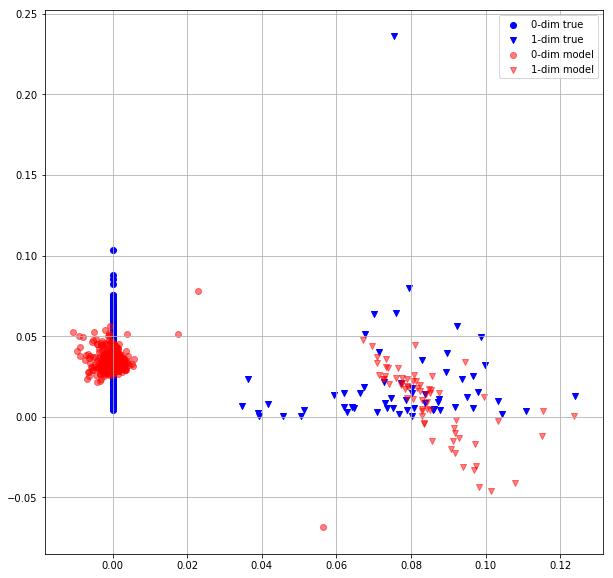

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [8]:
# Linear + TSPN_old
for epoch_idx in range(n_epochs):
        
    # train
    model.train()
        
    loss = 0
    for batch in tqdm(dataloader_train):
        src = batch[0].to(device)
        mask = batch[1].to(device)
        tgt = model(src, mask)
        loss_batch = criterion_hungarian(src.to(torch.float), tgt)
        loss_batch.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss += loss_batch.detach().cpu()
        
    loss_train = loss / len(dataloader_train.dataset)
        
    # test
    model.eval()
    loss = 0
    for batch in tqdm(dataloader_test):
        src = batch[0].to(device)
        mask = batch[1].to(device)
        
        with torch.no_grad():
            tgt = model(src, mask)
            loss_batch = criterion_hungarian(src.to(torch.float), tgt)
            loss += loss_batch
            
            
    loss_test = loss / len(dataloader_test.dataset)
        
    print("Epoch: {:3} {:.10f} {:.10f}".format(epoch_idx, loss_train, loss_test))
    item = dataset_test[0].reshape(1, -1, 3)
    mask = np.ones((1, item.shape[1]))

    d_mask0 = (item[0, :, 2] == 0)
    d_mask1 = (item[0, :, 2] == 1)

    pred = model(torch.tensor(item, dtype=torch.float).to(device), torch.tensor(mask).long().to(device)).detach().cpu().numpy()
    
    m = (pred[0, :, 2] > 0.5)
    mask0 = (m == 0)
    mask1 = (m == 1)
    #m = np.argmax(pred[0, :, 2:], axis = 1)
    #mask0 = (m == 0)
    #mask1 = (m == 1)

    plt.figure(figsize=(10, 10))

    plt.scatter(item[0, d_mask0, 0], item[0, d_mask0, 1], label = '0-dim true', marker = "o", c = "b")
    plt.scatter(item[0, d_mask1, 0], item[0, d_mask1, 1], label = '1-dim true', marker = "v", c = "b")


    plt.scatter(pred[0, mask0, 0], pred[0, mask0, 1], label = '0-dim model', alpha = 0.5, marker = "o", c = "r")
    plt.scatter(pred[0, mask1, 0], pred[0, mask1, 1], label = '1-dim model', alpha = 0.5, marker = "v", c = "r")
    plt.grid()
    plt.legend()
    plt.show()

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   0 0.0512576848 0.0495103933


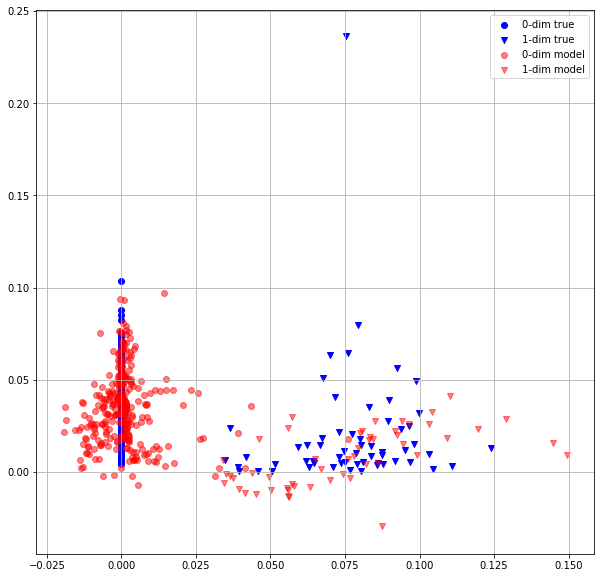

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   1 0.0480120368 0.0460354947


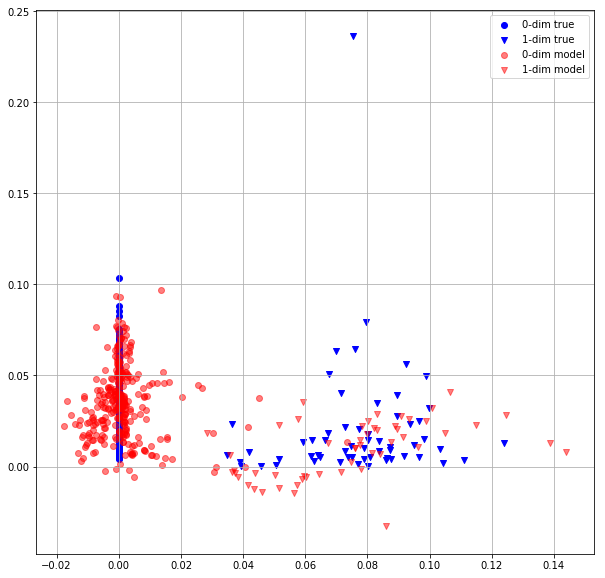

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   2 0.0446759090 0.0437252633


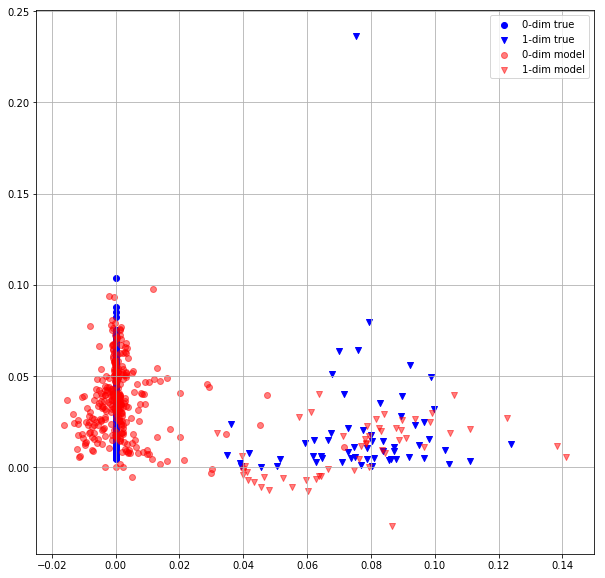

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   3 0.0420639217 0.0408054143


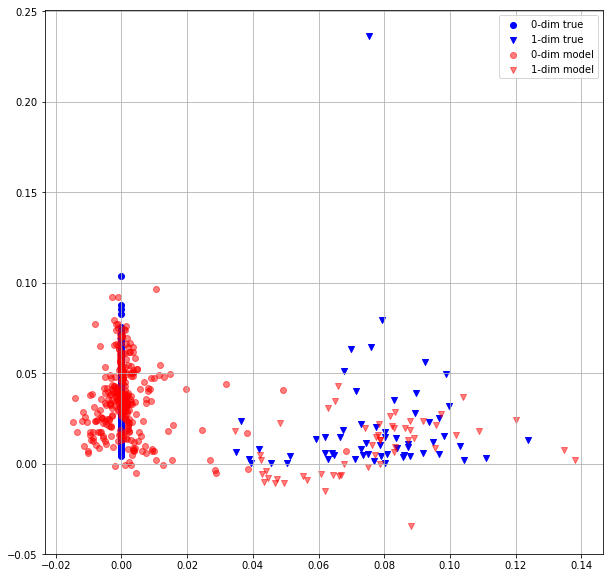

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   4 0.0396623313 0.0383979641


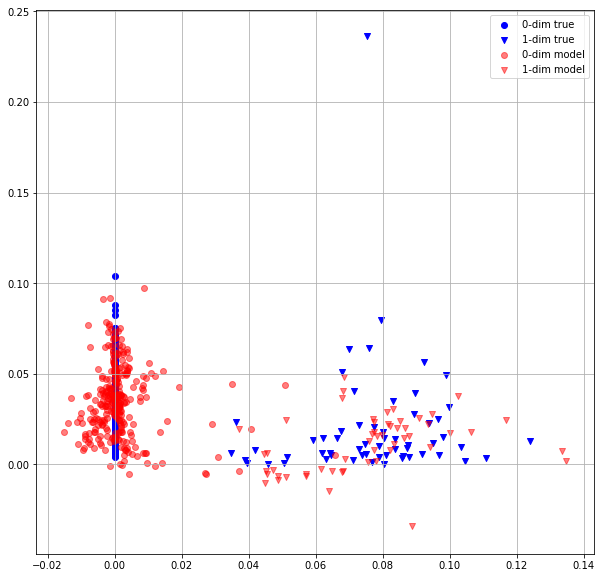

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   5 0.0374155007 0.0371080115


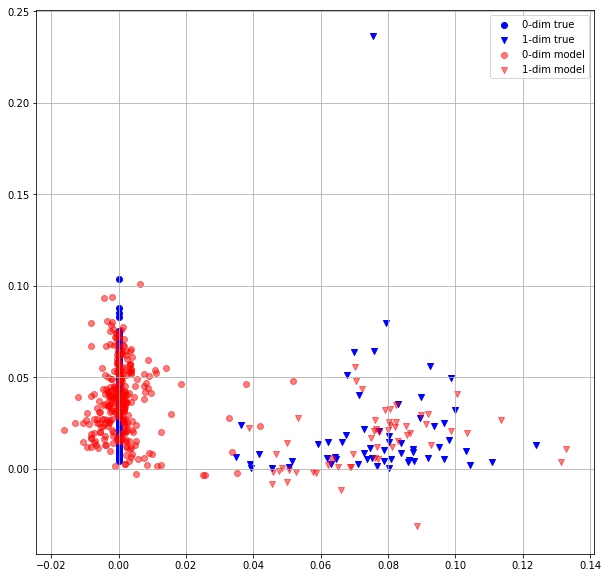

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   6 0.0355277881 0.0348566137


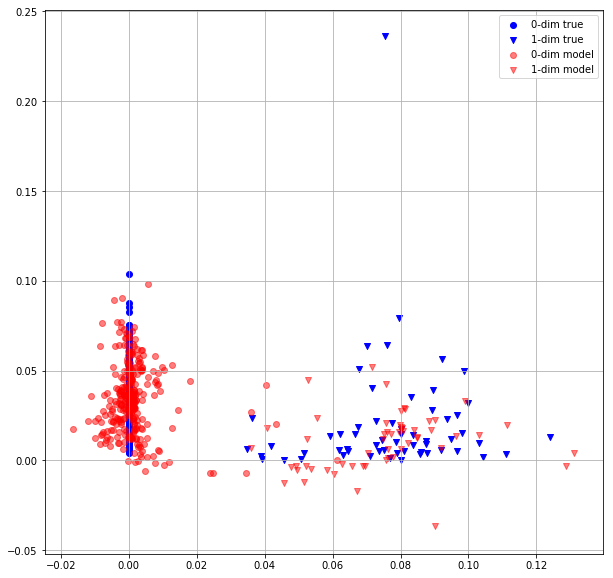

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   7 0.0332786143 0.0328484438


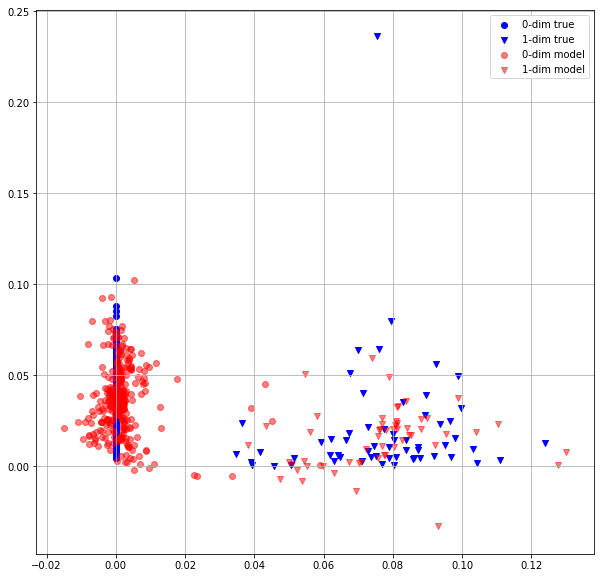

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   8 0.0309277773 0.0305168461


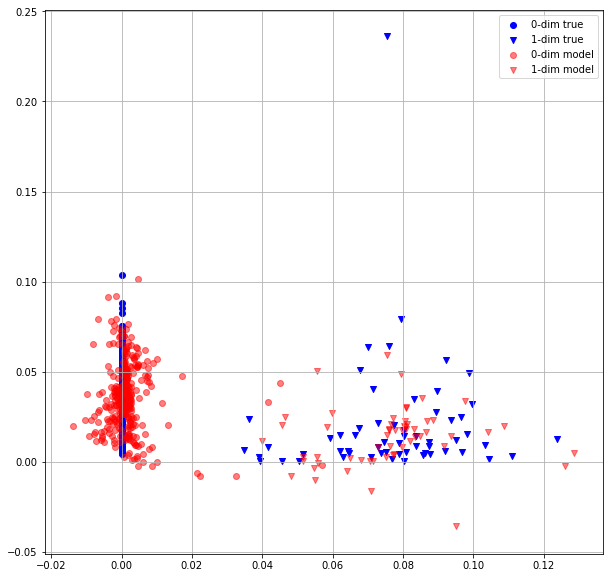

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:   9 0.0288267415 0.0274199527


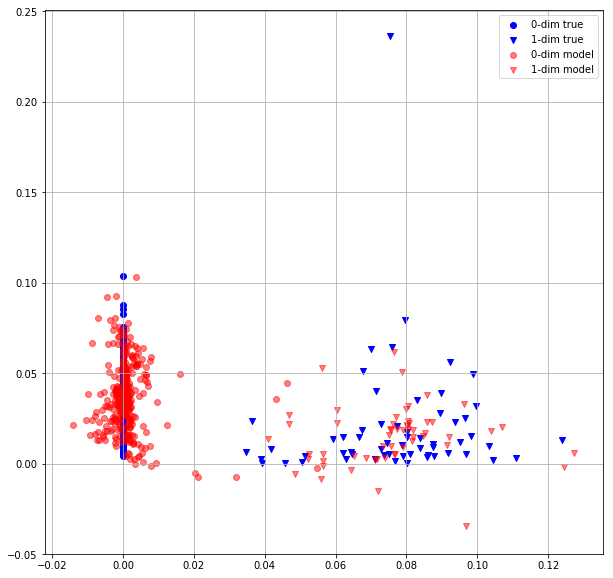

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  10 0.0271733981 0.0259352438


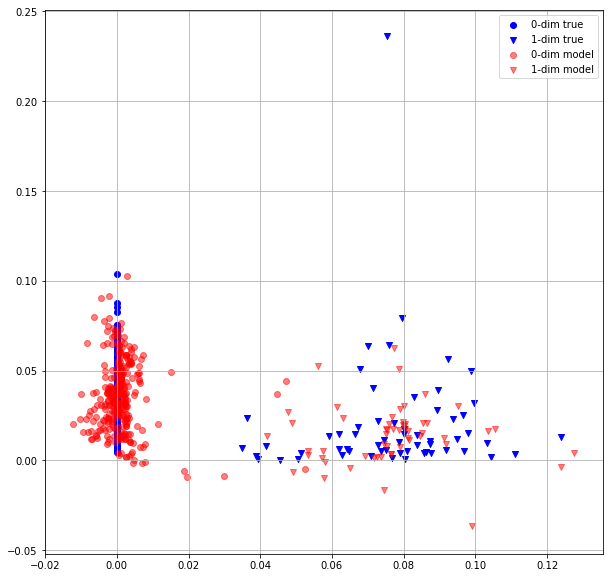

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  11 0.0256004781 0.0246218331


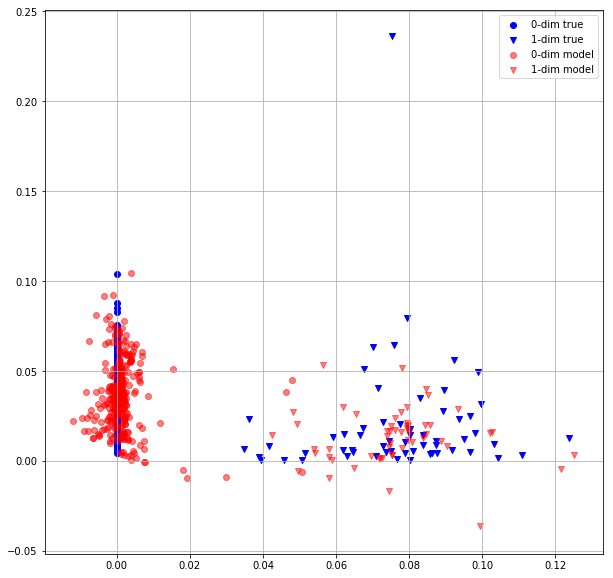

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  12 0.0238697343 0.0227811746


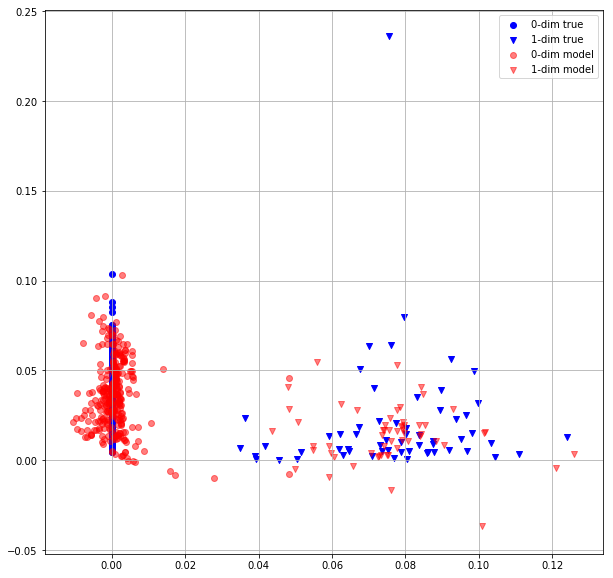

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  13 0.0219390914 0.0211554058


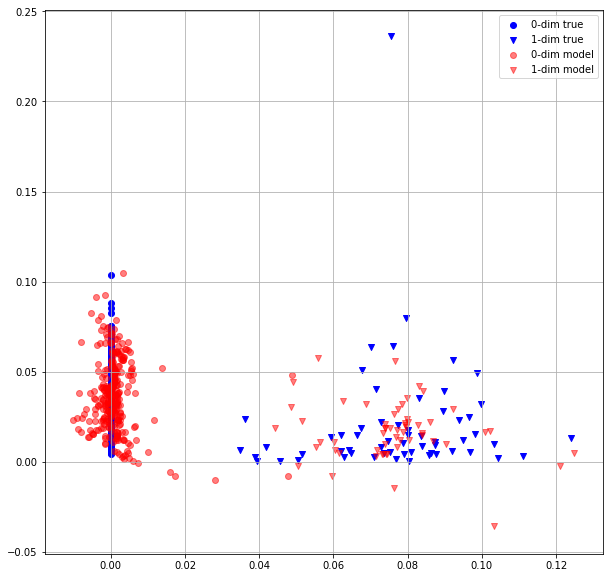

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  14 0.0206910428 0.0197991021


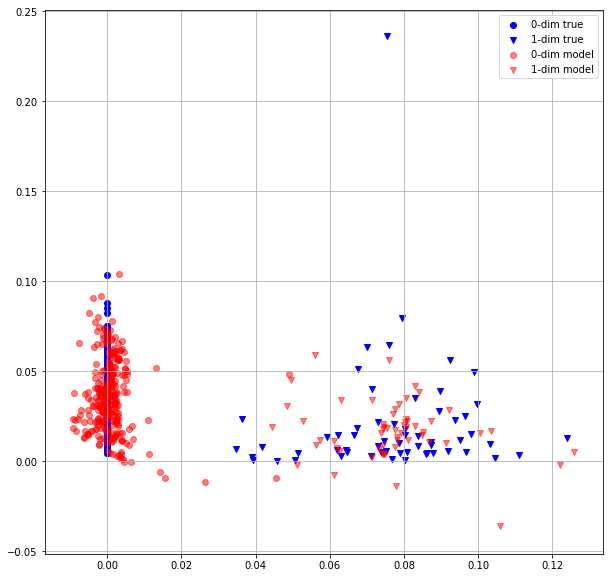

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  15 0.0193528235 0.0189931244


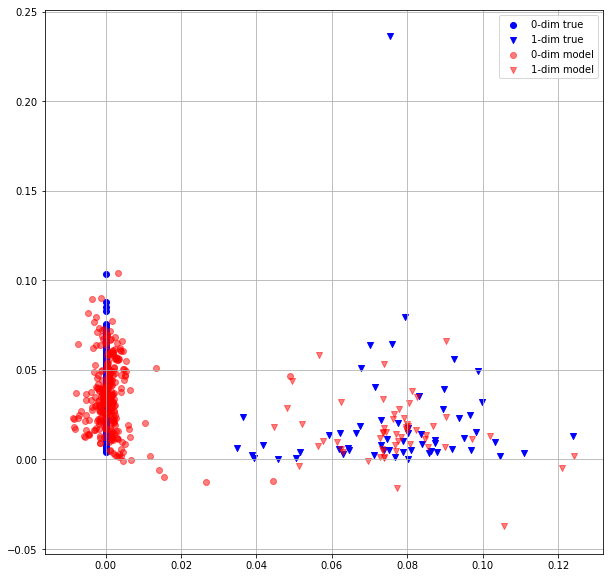

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  16 0.0184759013 0.0175077058


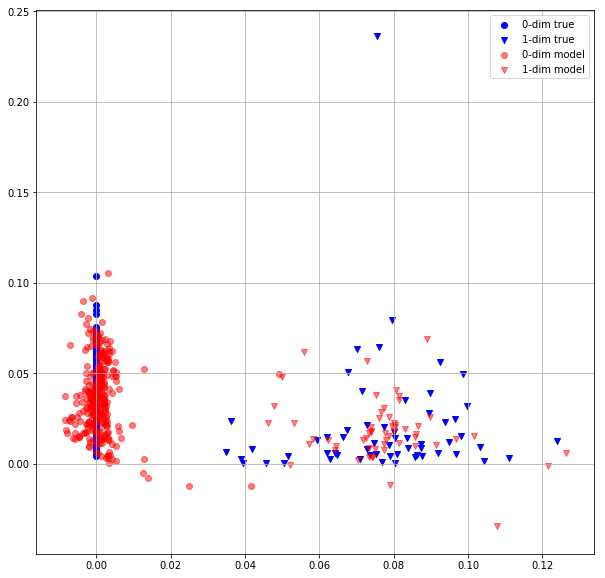

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  17 0.0169104692 0.0160562471


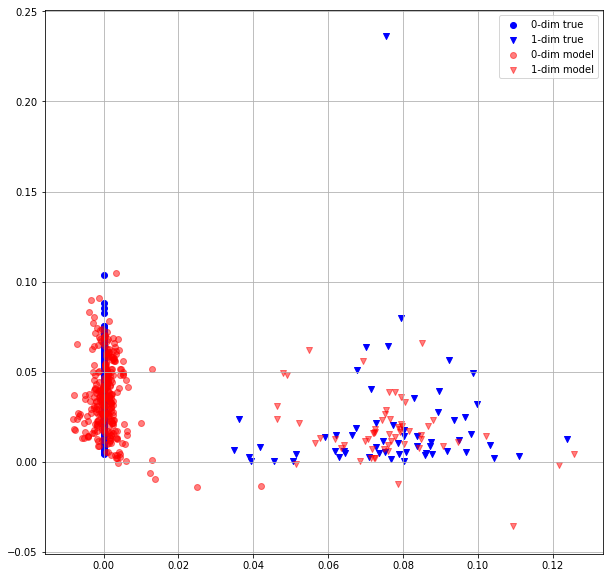

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  18 0.0159345511 0.0151256733


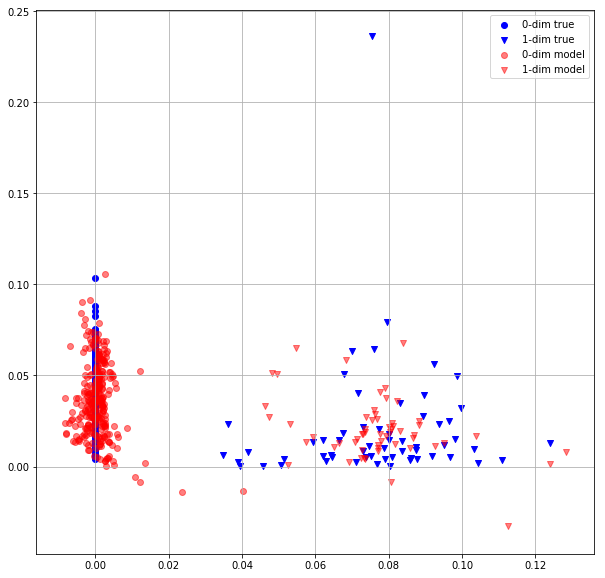

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  19 0.0147860171 0.0141844628


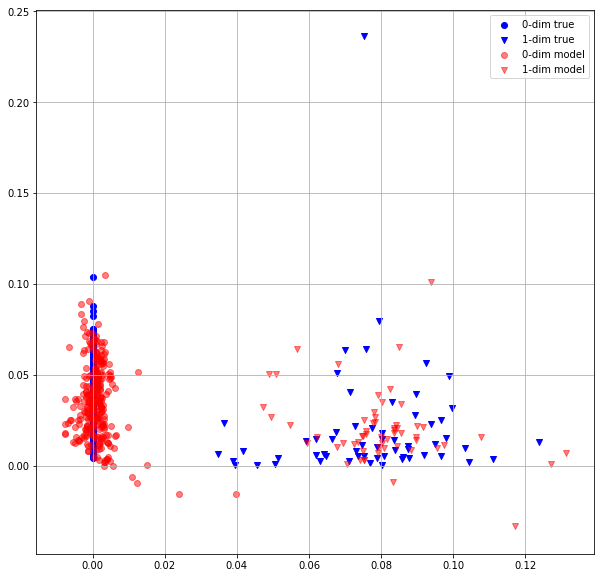

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  20 0.0141382487 0.0138260126


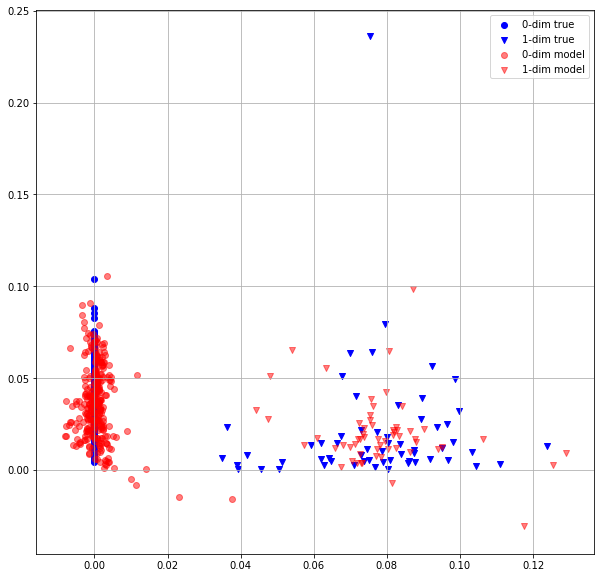

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  21 0.0133126043 0.0127594592


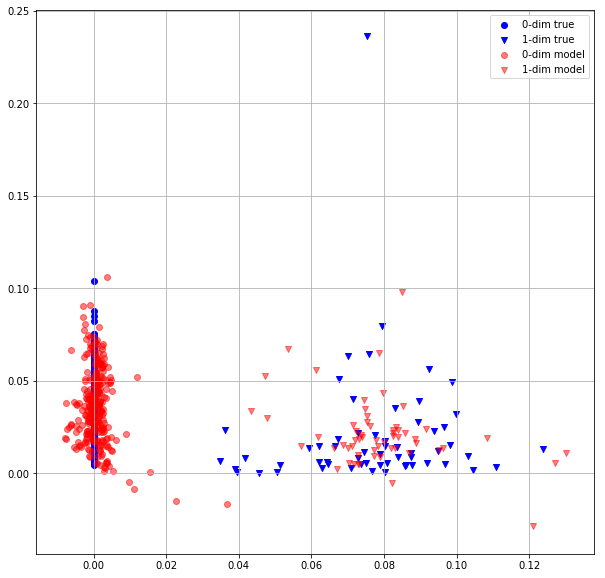

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  22 0.0123746945 0.0118768187


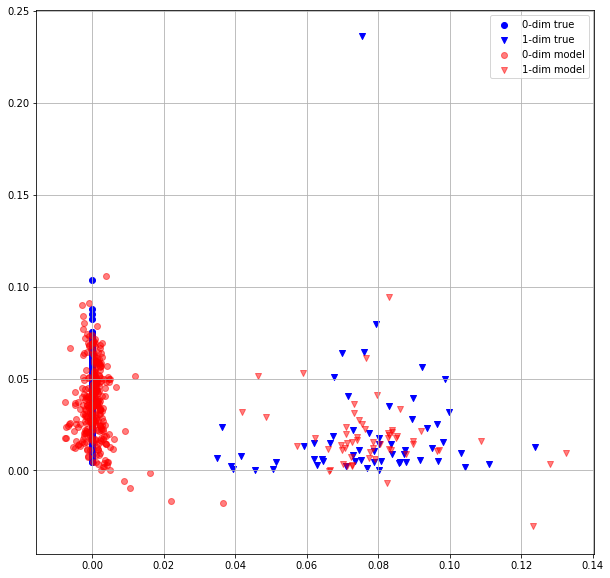

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  23 0.0116520934 0.0111118201


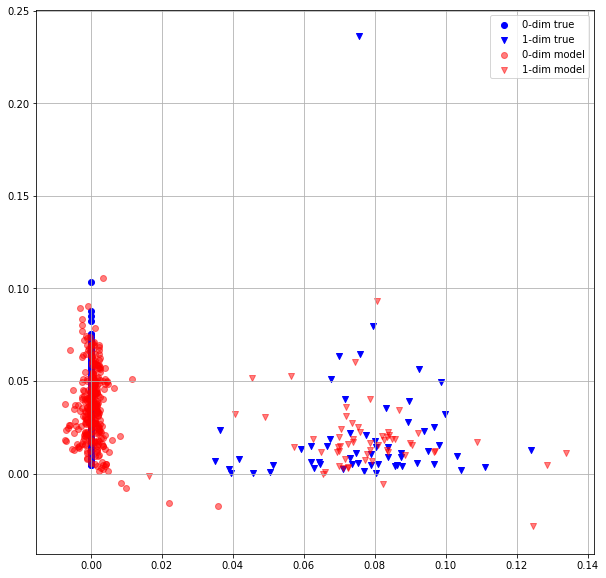

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  24 0.0110350670 0.0107251024


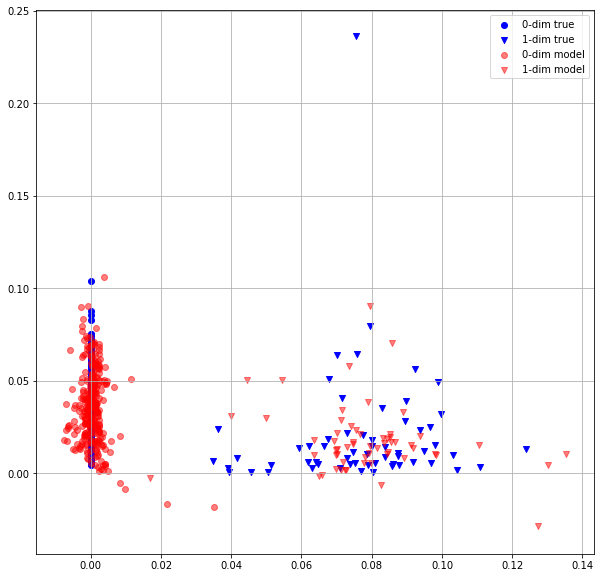

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  25 0.0105542373 0.0103312302


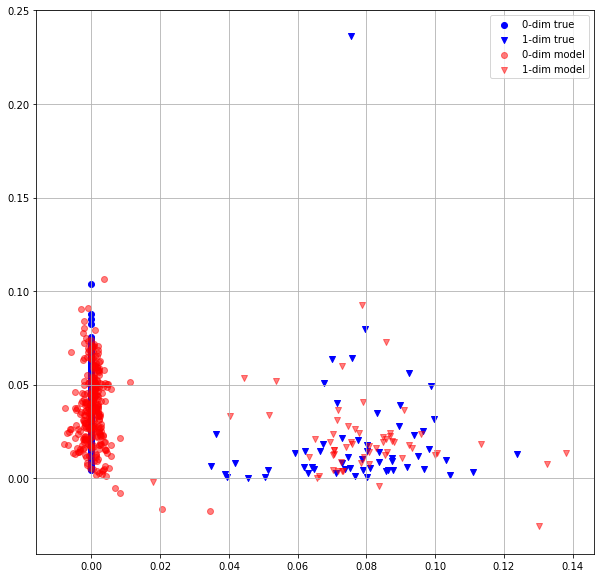

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  26 0.0102574648 0.0097856335


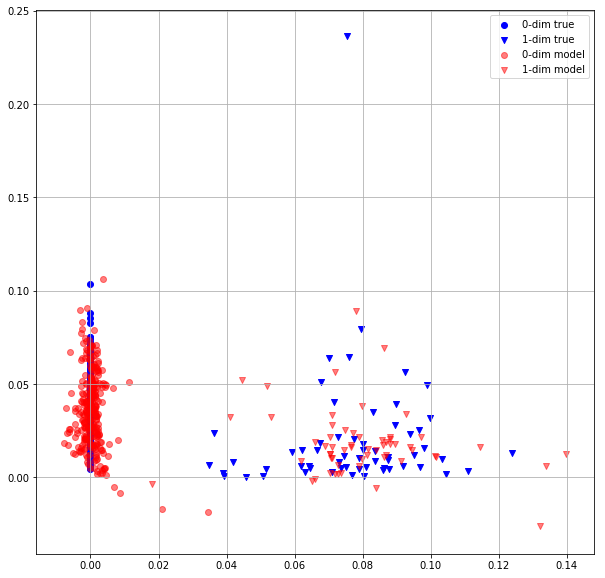

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  27 0.0098369261 0.0098909521


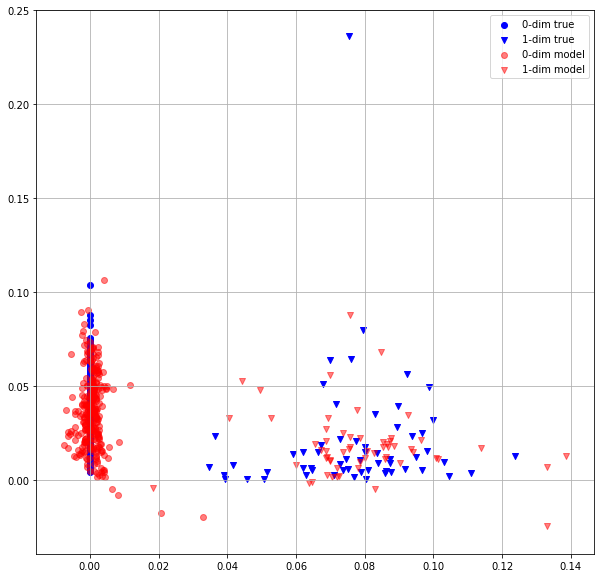

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  28 0.0099126045 0.0092772553


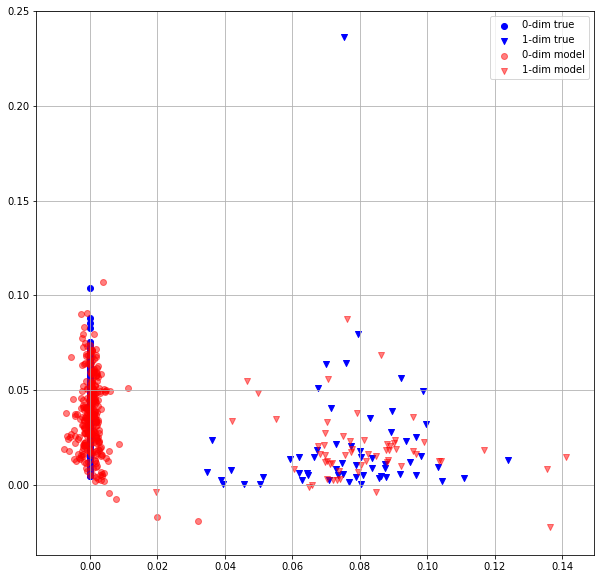

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:  29 0.0097049130 0.0091965571


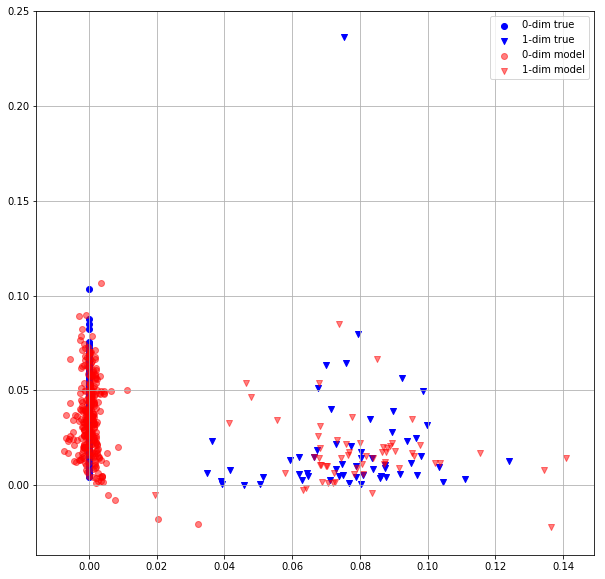

In [5]:
#60 epochs DeepSets + MLPGen w/ Top-N on default hungarian
for epoch_idx in range(n_epochs):
        
    # train
    model.train()
        
    loss = 0
    for batch in tqdm(dataloader_train):
        src = batch[0].to(device)
        mask = batch[1].to(device)
        tgt = model(src, mask)
        loss_batch = criterion_hungarian(src.to(torch.float), tgt)
        loss_batch.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss += loss_batch.detach().cpu()
        
    loss_train = loss / len(dataloader_train.dataset)
        
    # test
    model.eval()
    loss = 0
    for batch in tqdm(dataloader_test):
        src = batch[0].to(device)
        mask = batch[1].to(device)
        
        with torch.no_grad():
            tgt = model(src, mask)
            loss_batch = criterion_hungarian(src.to(torch.float), tgt)
            loss += loss_batch
            
            
    loss_test = loss / len(dataloader_test.dataset)
        
    print("Epoch: {:3} {:.10f} {:.10f}".format(epoch_idx, loss_train, loss_test))
    item = dataset_test[0].reshape(1, -1, 3)
    mask = np.ones((1, item.shape[1]))

    d_mask0 = (item[0, :, 2] == 0)
    d_mask1 = (item[0, :, 2] == 1)

    pred = model(torch.tensor(item, dtype=torch.float).to(device), torch.tensor(mask).long().to(device)).detach().cpu().numpy()
    
    m = (pred[0, :, 2] > 0.5)
    mask0 = (m == 0)
    mask1 = (m == 1)
    #m = np.argmax(pred[0, :, 2:], axis = 1)
    #mask0 = (m == 0)
    #mask1 = (m == 1)

    plt.figure(figsize=(10, 10))

    plt.scatter(item[0, d_mask0, 0], item[0, d_mask0, 1], label = '0-dim true', marker = "o", c = "b")
    plt.scatter(item[0, d_mask1, 0], item[0, d_mask1, 1], label = '1-dim true', marker = "v", c = "b")


    plt.scatter(pred[0, mask0, 0], pred[0, mask0, 1], label = '0-dim model', alpha = 0.5, marker = "o", c = "r")
    plt.scatter(pred[0, mask1, 0], pred[0, mask1, 1], label = '1-dim model', alpha = 0.5, marker = "v", c = "r")
    plt.grid()
    plt.legend()
    plt.show()